# Imports

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest,mutual_info_classif,f_classif

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc, confusion_matrix, RocCurveDisplay

from sklearn.model_selection import RandomizedSearchCV

# Loading and printing the data

In [2]:
df=pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")

In [3]:
df

MachineID   ProductName EngineVersion  \
0      f541bae429089117c4aac39c90dd3416  win8defender   1.1.15200.1   
1      dc2b14d9ce3a0ce4050bb640190f2ca5  win8defender   1.1.15100.1   
2      fd20c5f010e9c5f91ad1c6b3e0da68a0  win8defender   1.1.15200.1   
3      38711eae85eb77a72ec5dfdf27eb2a76  win8defender   1.1.15200.1   
4      32607c9a543a9214e2c7e45800ed4849  win8defender   1.1.15200.1   
...                                 ...           ...           ...   
99995  a378b2196a7a1d8ee0d4f989ee46730e  win8defender   1.1.15200.1   
99996  7f4433ca05d24b9bbdd3932f8b05e61f  win8defender   1.1.15100.1   
99997  d6852dfff534e03d5ddfd3c7875ab072  win8defender   1.1.15200.1   
99998  70a8dc682128c9ff78a3de5aea9dac74  win8defender   1.1.14901.4   
99999  ad9c385b53f2ca788933a39603b84eda  win8defender   1.1.15000.2   

             AppVersion SignatureVersion  IsBetaUser  RealTimeProtectionState  \
0       4.18.1807.18075     1.275.1003.0           0                      7.0   
1       4.18.1807.18075     1.273.1465.0           0                      7.0   
2       4.18.1807.18075     1.275.1546.0           0                      7.0   
3      4.12.17007.18011     1.275.1141.0           0                      7.0   
4        4.13.17134.228     1.275.1283.0           0                      7.0   
...                 ...              ...         ...                      ...   
99995   4.18.1807.18075     1.275.1582.0           0                      7.0   
99996   4.18.1806.18062     1.273.1156.0           0                      7.0   
99997   4.18.1807.18075      1.275.209.0           0                      7.0   
99998  4.16.17656.18052      1.269.641.0           0                      7.0   
99999   4.18.1806.18062     1.271.1003.0           0                      7.0   

       IsPassiveModeEnabled  AntivirusConfigID  NumAntivirusProductsInstalled  \
0                         0            53447.0                            1.0   
1                         0            53447.0                            1.0   
2                         0            53447.0                            1.0   
3                         0            46413.0                            2.0   
4                         0            40466.0                            2.0   
...                     ...                ...                            ...   
99995                     0            68585.0                            2.0   
99996                     0            11280.0                            2.0   
99997                     0            53447.0                            1.0   
99998                     0            53447.0                            1.0   
99999                     0             7945.0                            2.0   

       ...  IsSecureBootEnabled  IsVirtualDevice  IsTouchEnabled  \
0      ...                    0              0.0               1   
1      ...                    1              0.0               0   
2      ...                    0              0.0               0   
3      ...                    1              0.0               0   
4      ...                    0              0.0               0   
...    ...                  ...              ...             ...   
99995  ...                    0              0.0               0   
99996  ...                    0              0.0               0   
99997  ...                    1              0.0               0   
99998  ...                    1              0.0               1   
99999  ...                    1              0.0               0   

       IsPenCapable  IsAlwaysOnAlwaysConnectedCapable  IsGamer  \
0                 0                               1.0      0.0   
1                 0                               0.0      0.0   
2                 0                               0.0      1.0   
3                 0                               0.0      0.0   
4                 0                               0.0      1.0   
...             ..

# Basic data understanding

In [4]:
df.shape

(100000, 76)

In [5]:
df.columns

Index(['MachineID', 'ProductName', 'EngineVersion', 'AppVersion',
       'SignatureVersion', 'IsBetaUser', 'RealTimeProtectionState',
       'IsPassiveModeEnabled', 'AntivirusConfigID',
       'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled',
       'HasTpm', 'CountryID', 'CityID', 'GeoRegionID', 'LocaleEnglishNameID',
       'PlatformType', 'Processor', 'OSVersion', 'OSBuildNumber',
       'OSProductSuite', 'OsPlatformSubRelease', 'OSBuildLab',
       'SKUEditionName', 'IsSystemProtected', 'AutoSampleSubmissionEnabled',
       'SMode', 'IEVersionID', 'FirewallEnabled', 'EnableLUA',
       'MDC2FormFactor', 'DeviceFamily', 'OEMNameID', 'OEMModelID',
       'ProcessorCoreCount', 'ProcessorManufacturerID', 'ProcessorModelID',
       'PrimaryDiskCapacityMB', 'PrimaryDiskType', 'SystemVolumeCapacityMB',
       'HasOpticalDiskDrive', 'TotalPhysicalRAMMB', 'ChassisType',
       'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal',
       'PrimaryDisplayResolutio

In [6]:
df.head

<bound method NDFrame.head of                               MachineID   ProductName EngineVersion  \
0      f541bae429089117c4aac39c90dd3416  win8defender   1.1.15200.1   
1      dc2b14d9ce3a0ce4050bb640190f2ca5  win8defender   1.1.15100.1   
2      fd20c5f010e9c5f91ad1c6b3e0da68a0  win8defender   1.1.15200.1   
3      38711eae85eb77a72ec5dfdf27eb2a76  win8defender   1.1.15200.1   
4      32607c9a543a9214e2c7e45800ed4849  win8defender   1.1.15200.1   
...                                 ...           ...           ...   
99995  a378b2196a7a1d8ee0d4f989ee46730e  win8defender   1.1.15200.1   
99996  7f4433ca05d24b9bbdd3932f8b05e61f  win8defender   1.1.15100.1   
99997  d6852dfff534e03d5ddfd3c7875ab072  win8defender   1.1.15200.1   
99998  70a8dc682128c9ff78a3de5aea9dac74  win8defender   1.1.14901.4   
99999  ad9c385b53f2ca788933a39603b84eda  win8defender   1.1.15000.2   

             AppVersion SignatureVersion  IsBetaUser  RealTimeProtectionState  \
0       4.18.1807.18075     1.275.10

In [7]:
df.tail

<bound method NDFrame.tail of                               MachineID   ProductName EngineVersion  \
0      f541bae429089117c4aac39c90dd3416  win8defender   1.1.15200.1   
1      dc2b14d9ce3a0ce4050bb640190f2ca5  win8defender   1.1.15100.1   
2      fd20c5f010e9c5f91ad1c6b3e0da68a0  win8defender   1.1.15200.1   
3      38711eae85eb77a72ec5dfdf27eb2a76  win8defender   1.1.15200.1   
4      32607c9a543a9214e2c7e45800ed4849  win8defender   1.1.15200.1   
...                                 ...           ...           ...   
99995  a378b2196a7a1d8ee0d4f989ee46730e  win8defender   1.1.15200.1   
99996  7f4433ca05d24b9bbdd3932f8b05e61f  win8defender   1.1.15100.1   
99997  d6852dfff534e03d5ddfd3c7875ab072  win8defender   1.1.15200.1   
99998  70a8dc682128c9ff78a3de5aea9dac74  win8defender   1.1.14901.4   
99999  ad9c385b53f2ca788933a39603b84eda  win8defender   1.1.15000.2   

             AppVersion SignatureVersion  IsBetaUser  RealTimeProtectionState  \
0       4.18.1807.18075     1.275.10

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

In [9]:
df.describe()

IsBetaUser  RealTimeProtectionState  IsPassiveModeEnabled  \
count    100000.0             99934.000000         100000.000000   
mean          0.0                 6.848430              0.017620   
std           0.0                 1.015166              0.131566   
min           0.0                 0.000000              0.000000   
25%           0.0                 7.000000              0.000000   
50%           0.0                 7.000000              0.000000   
75%           0.0                 7.000000              0.000000   
max           0.0                 8.000000              1.000000   

       AntivirusConfigID  NumAntivirusProductsInstalled  \
count       99924.000000                   99924.000000   
mean        47975.710440                       1.326528   
std         13803.321533                       0.520681   
min            39.000000                       1.000000   
25%         49480.000000                       1.000000   
50%         53447.000000                       1.000000   
75%         53447.000000                       2.000000   
max         70490.000000                       5.000000   

       NumAntivirusProductsEnabled         HasTpm      CountryID  \
count                 99924.000000  100000.000000  100000.000000   
mean                      1.018264       0.996780     108.078790   
std                       0.155291       0.056654      63.062151   
min                       0.000000       0.000000       1.000000   
25%                       1.000000       1.000000      51.000000   
50%                       1.000000       1.000000      97.000000   
75%                       1.000000       1.000000     162.000000   
max                       4.000000       1.000000     222.000000   

              CityID    GeoRegionID  ...  FirmwareManufacturerID  \
count   99377.000000  100000.000000  ...            99624.000000   
mean    81029.938587     169.741630  ...              401.987613   
std     48944.027074      89.188929  ...              221.318891   
min         7.000000       1.000000  ...                2.000000   
25%     36694.000000      89.000000  ...              142.000000   
50%     82373.000000     181.000000  ...              500.000000   
75%    122835.000000     267.000000  ...              556.000000   
max    167957.000000     296.000000  ...             1083.000000   

       FirmwareVersionID  IsSecureBootEnabled  IsVirtualDevice  \
count       99666.000000        100000.000000     99980.000000   
mean        32942.648044             0.495690         0.003841   
std         21151.970827             0.499984         0.061855   
min           121.000000             0.000000         0.000000   
25%         13020.000000             0.000000         0.000000   
50%         33066.000000             0.000000         0.000000   
75%         52357.000000             1.000000         0.000000   
max         72091.000000             1.000000         1.000000   

       IsTouchEnabled   IsPenCapable  IsAlwaysOnAlwaysConnectedCapable  \
count   100000.000000  100000.000000                      99866.000000   
mean         0.128470       0.040580                          0.058398   
std          0.334614       0.197316                          0.234496   
min          0.000000       0.000000                          0.000000   
25%          0.000000       0.000000                          0.000000   
50%          0.000000       0.000000                          0.000000   
75%          0.000000       0.000000                          0.000000   
max          1.000000       1.000000                          1.000000   

            IsGamer  RegionIdentifier         target  
count  99441.000000      99441.000000  100000.000000  
mean       0.296668          7.875866       0.505250  
std        0.456791          4.562533       0.499975  
min        0.000000          1.000000       0.000000  
25%        0.000000          3.000000       0.000000  
50%        0.000000         10.000000       

## Key Insights from the Dataset based on the descriptive statistical analysis

Around half of the dataset consists of users whose systems have been affected by malware, with a distribution of approximately `~50%`.

### 1. **Antivirus and Security**  
- Most systems have antivirus products installed, with an average of `~1.33` products per device.  
- High rates of real-time protection (`~6.85`) and firewall-enabled status (`~98%`).  

### 2. **Hardware Specifications**  
- **Primary Disk Capacity**: Average of `~515,861 MB` (~500 GB).  
- **Physical RAM**: Mean of `~6,132 MB` (~6 GB), optimized for moderate multitasking.  
- Common configurations include `4` processor cores and display resolutions primarily around `1366x768`.  

### 3. **System Features**  
- **TPM (Trusted Platform Module)**: Present on `~99.7%` of devices.  
- **Secure Boot**: Enabled on `~49.6%` of systems.  
- **Virtualization**: Supported by `~50.5%` of systems.  

### 4. **User Interaction**  
- **LUA (Limited User Account)** is enabled on `~99.6%` of systems.  
- **Touchscreen** adoption is low at `5.8%`, and **pen-capable devices** make up `~12.8%` of the dataset.  

### 5. **Operating System Insights**  
- `~85.6%` of systems operate on **64-bit architecture**, with most running build versions around `~1,716`.  
- **OS Adoption**: Most systems are running relatively recent OS versions, reflecting a trend toward secure, updated devices.  

### 6. **Antivirus Usage**  
- **AVProductsInstalled**: On average, users rely on `1-2` antivirus solutions (`~1.7` products).  
- Frequent updates are suggested by the **AVProductStatesIdentifier** average of `~3.45`.  

### 7. **Connectivity Features**  
- **Bluetooth** and **Wi-Fi** are enabled on a significant portion of the devices, with a focus on connectivity.  

### 8. **Device Age and Configuration**  
- Many systems have older hardware configurations (e.g., `4 cores`, `~6GB` RAM), indicating a mix of legacy and modern devices.  

### 9. **Geographic Distribution**  
- **LocaleEnglishNameIdentifier** shows strong representation from specific regions, indicating localized trends in system configurations and threat landscapes.  

### 10. **Boot and Encryption**  
- **Secure Boot** is enabled on `~49.6%` of systems, highlighting a focus on security during system startup.  
- **TPM presence**: `~99.7%` of devices are equipped with this security feature.  

### 11. **Gaming Devices**  
- **Wdft_IsGamer**: A notable percentage of devices (`true`) are optimized for gaming, possibly indicating higher hardware demands and distinct security challenges.  

### 12. **Storage Capacity**  
- The median **Census_SystemVolumeTotalCapacity** aligns with modern storage needs, sufficient for both personal and professional use.  

In [10]:
unique = {}
for col in df.columns:
    unique[col] = df[col].nunique()
unique_df = pd.DataFrame.from_dict( unique, orient = 'index', columns = ['UniqueValues'])
unique_df

UniqueValues
MachineID                99835
ProductName                  2
EngineVersion               37
AppVersion                  69
SignatureVersion          2735
...                        ...
IsGamer                      2
RegionIdentifier            15
DateAS                    2695
DateOS                     112
target                       2

[76 rows x 1 columns]

In [11]:
unique_df[unique_df['UniqueValues'] == 2] #these are of binary categories (16 of them)

UniqueValues
ProductName                                  2
IsPassiveModeEnabled                         2
HasTpm                                       2
IsSystemProtected                            2
SMode                                        2
FirewallEnabled                              2
DeviceFamily                                 2
HasOpticalDiskDrive                          2
IsPortableOS                                 2
IsSecureBootEnabled                          2
IsVirtualDevice                              2
IsTouchEnabled                               2
IsPenCapable                                 2
IsAlwaysOnAlwaysConnectedCapable             2
IsGamer                                      2
target                                       2

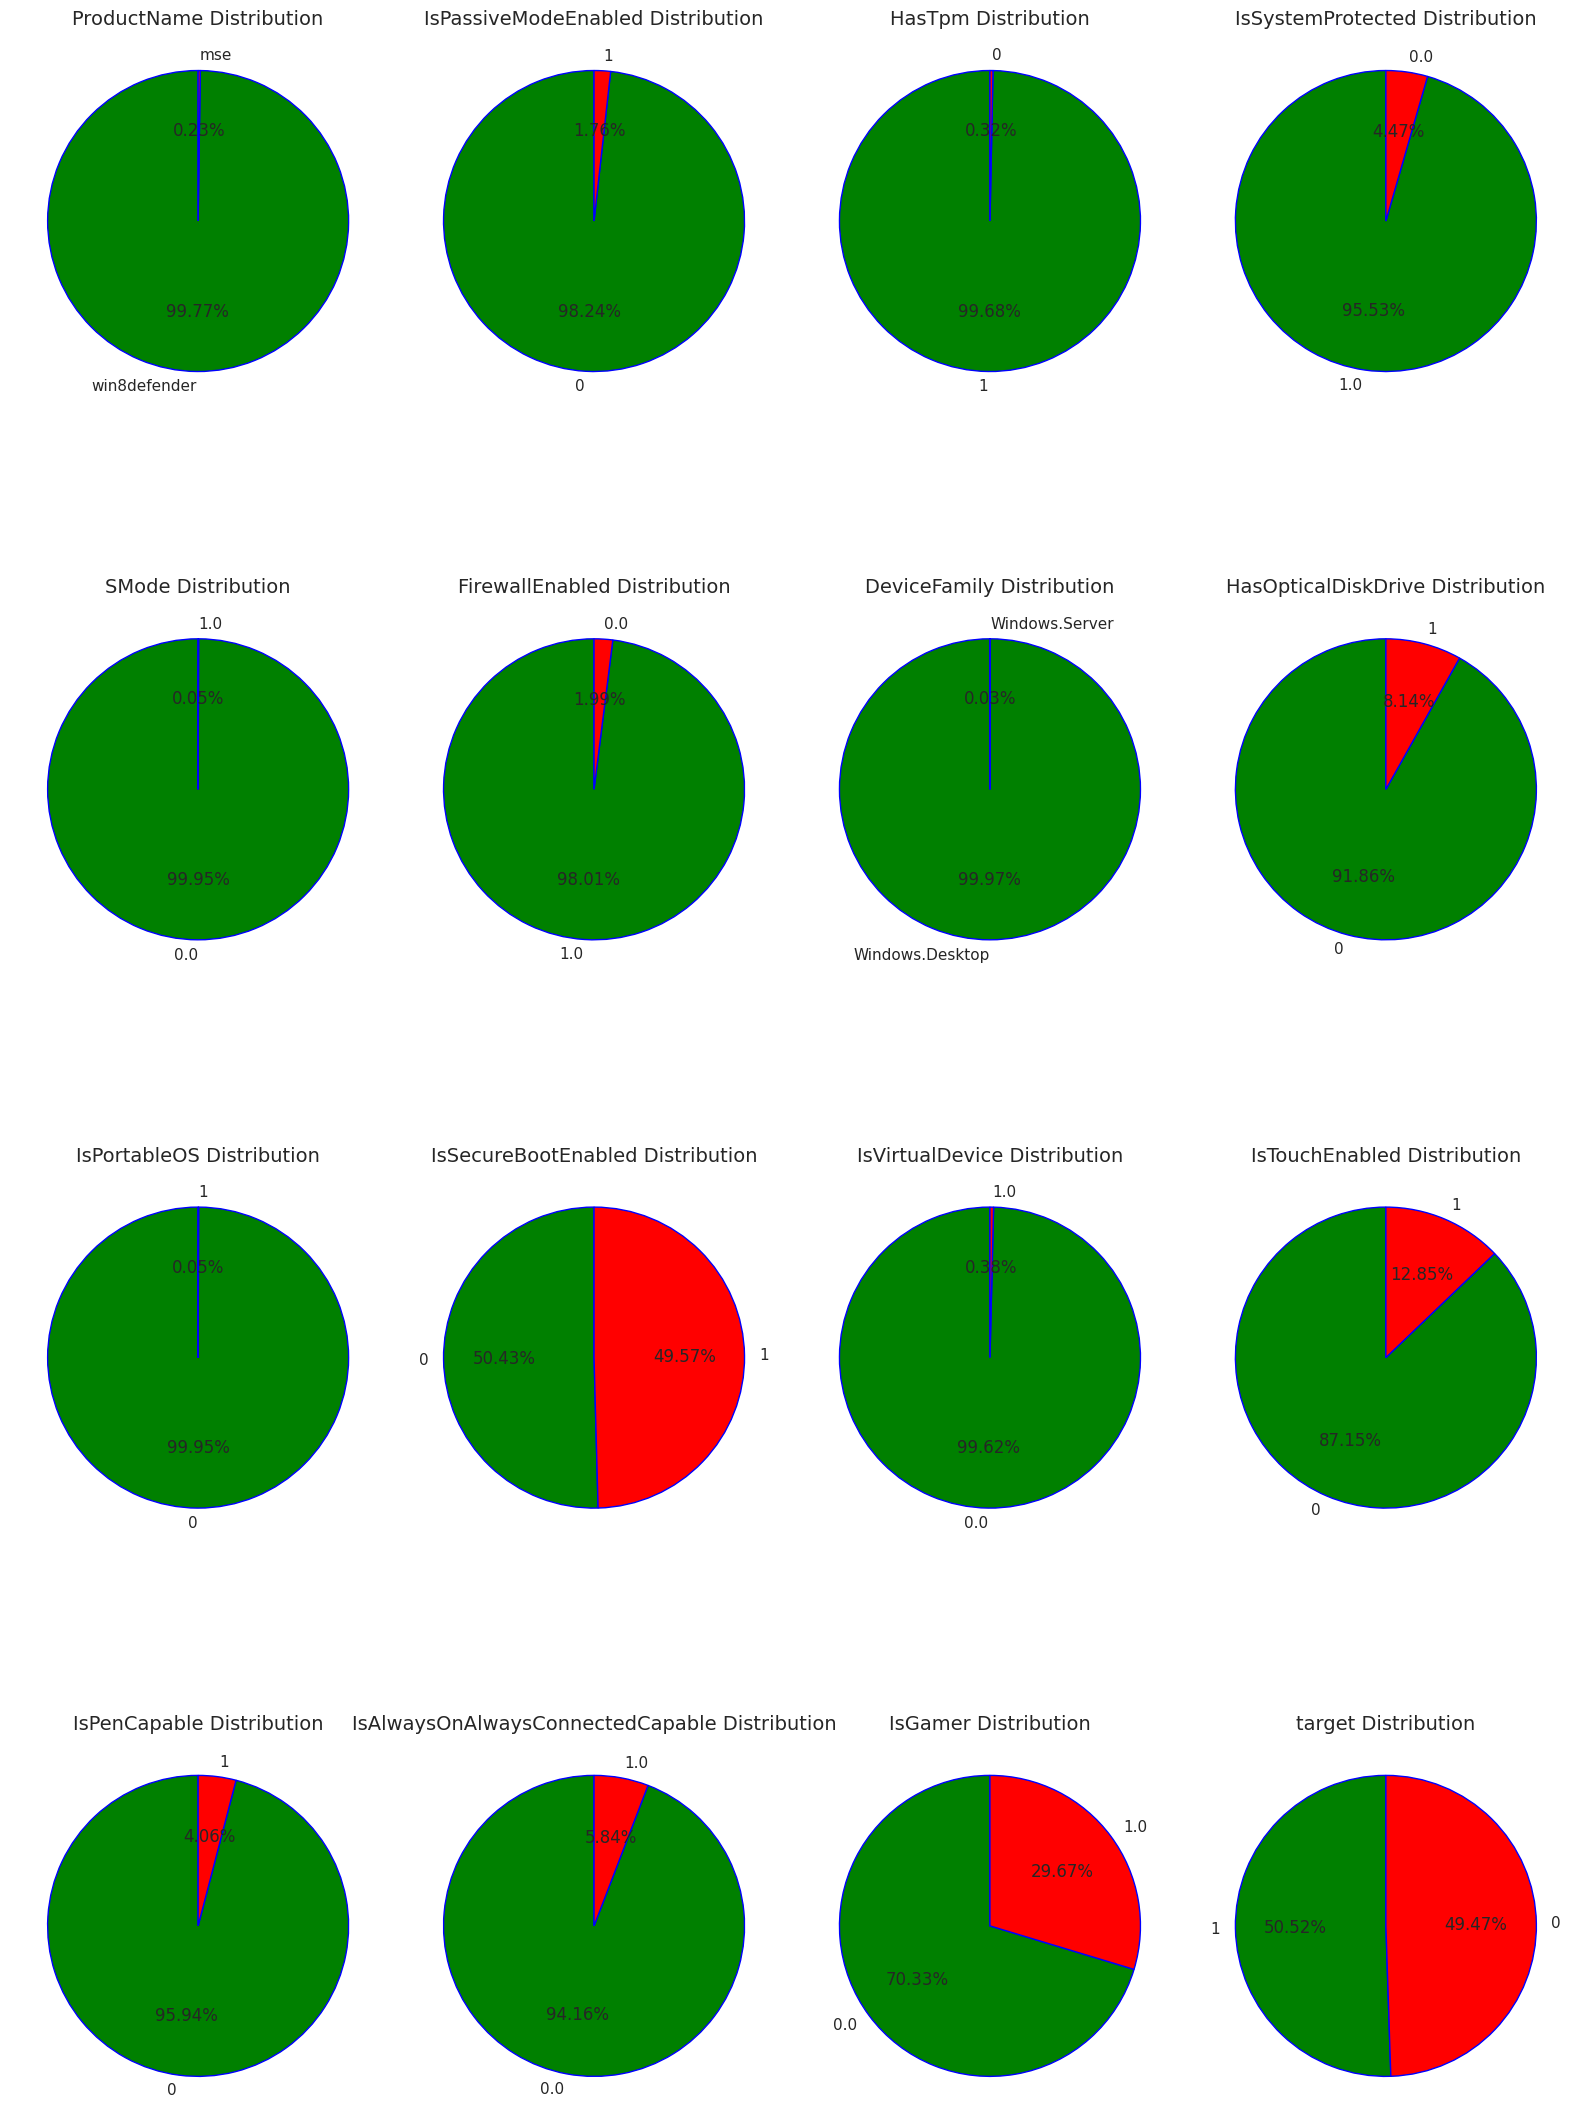

In [12]:
# pie-chart representation of all the binary features (and target)

binary_columns = unique_df[unique_df['UniqueValues'] == 2].index

sns.set(style="whitegrid")

num_cols = 4  
num_rows = (len(binary_columns) // num_cols) + (len(binary_columns) % num_cols > 0) 

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 6))

axes = axes.flatten()

for i, column in enumerate(binary_columns):
    value_counts = df[column].value_counts()

    axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.2f%%', 
                colors=['green', 'red'], startangle=90, wedgeprops={'edgecolor': 'blue'})
    axes[i].set_title(f'{column} Distribution', fontsize=14)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [13]:
missing_df = (df.isna().sum() / df.shape[0] * 100).reset_index()
missing_df.columns = ['Column', 'Missing Percentage']
missing_df

Column  Missing Percentage
0          MachineID               0.000
1        ProductName               0.000
2      EngineVersion               0.000
3         AppVersion               0.000
4   SignatureVersion               0.000
..               ...                 ...
71           IsGamer               0.559
72  RegionIdentifier               0.559
73            DateAS               0.000
74            DateOS               0.024
75            target               0.000

[76 rows x 2 columns]

In [14]:
missing_df['Missing Percentage'].describe() 

count    76.000000
mean      0.085961
std       0.175823
min       0.000000
25%       0.000000
50%       0.000000
75%       0.085000
max       0.981000
Name: Missing Percentage, dtype: float64

We see the maximum amount of missing values in a column is less than 1%

# Exploratory Data Analysis (EDA)

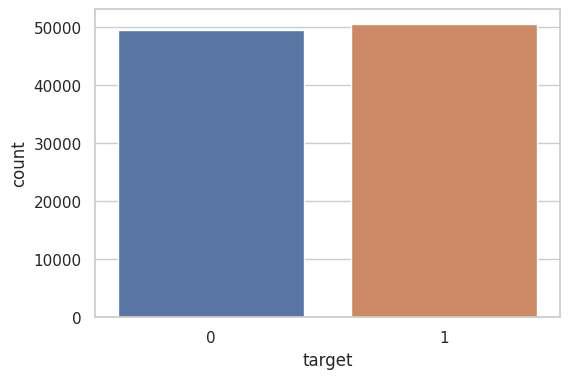

In [15]:
plt.figure(figsize=(6,4))
rating_value = df['target'].value_counts()
sns.countplot(x='target', data=df)
plt.show()

In [16]:
df['target'].value_counts()

target
1    50525
0    49475
Name: count, dtype: int64

Target data is well balanced

## Columns to be dropped

In [17]:
df['MachineID']

0        f541bae429089117c4aac39c90dd3416
1        dc2b14d9ce3a0ce4050bb640190f2ca5
2        fd20c5f010e9c5f91ad1c6b3e0da68a0
3        38711eae85eb77a72ec5dfdf27eb2a76
4        32607c9a543a9214e2c7e45800ed4849
                       ...               
99995    a378b2196a7a1d8ee0d4f989ee46730e
99996    7f4433ca05d24b9bbdd3932f8b05e61f
99997    d6852dfff534e03d5ddfd3c7875ab072
99998    70a8dc682128c9ff78a3de5aea9dac74
99999    ad9c385b53f2ca788933a39603b84eda
Name: MachineID, Length: 100000, dtype: object

In [18]:
df['MachineID'].nunique()/df.shape[0]*100  # percentage of unique values

99.835

We see that `MachineID` has more than `99%` unique values which is a random string with letters and numbers. As, it doesn't contribute much to determining if the system will have malicious attack, so, we decide to drop this column.

In [19]:
constant_cols = [col for col in df.columns if df[col].nunique() == 1]

print("Columns with only one unique value:", constant_cols)

Columns with only one unique value: ['IsBetaUser', 'AutoSampleSubmissionEnabled', 'IsFlightsDisabled']


We drop these columns as they don't add any information to predict the target

In [20]:
print("Number of unique values in the CityID column is :",df['CityID'].nunique())
print("Percentage of unique values in the CityID column is :",df['CityID'].nunique()/df.shape[0]*100)

Number of unique values in the CityID column is : 16047
Percentage of unique values in the CityID column is : 16.047


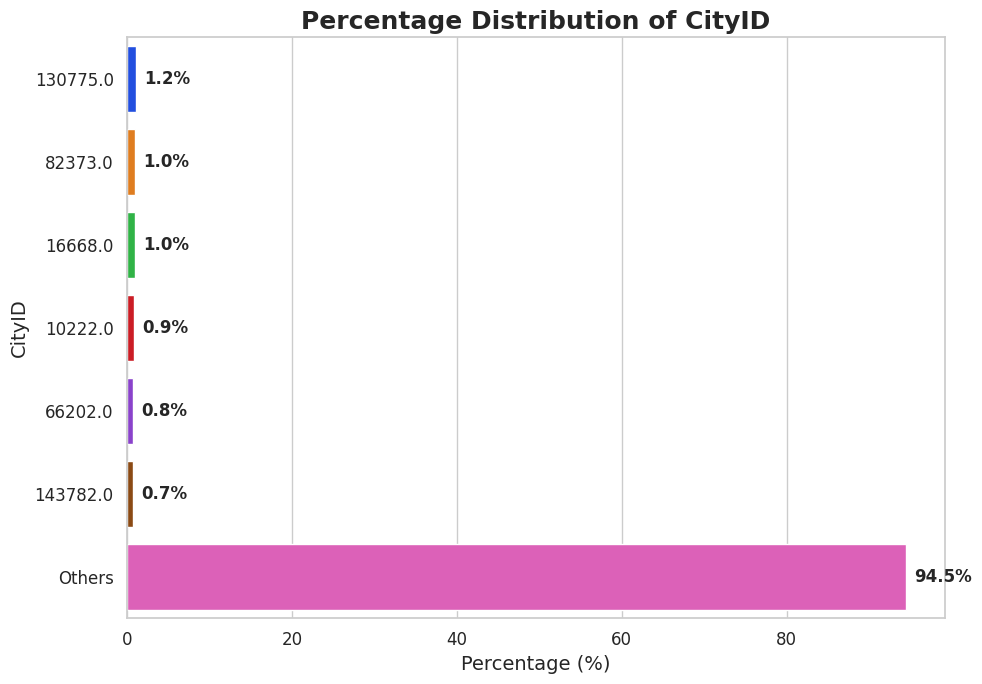

In [21]:
city_id = df['CityID'].value_counts(normalize=True) * 100

top_6 = city_id.head(6)
others = city_id.iloc[6:].sum()

city_id = pd.concat([top_6, pd.Series({'Others': others})])

palette = sns.color_palette("bright", len(city_id))

plt.figure(figsize=(10, 7))
sns.barplot(x=city_id.values, y=city_id.index, palette=palette, orient='h')

plt.title('Percentage Distribution of CityID', fontsize=18, fontweight='bold')
plt.xlabel('Percentage (%)', fontsize=14)
plt.ylabel('CityID', fontsize=14)

for index, value in enumerate(city_id.values):
    plt.text(value + 1, index, f'{value:.1f}%', va='center', fontsize=12, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

plt.show()

In [22]:
print("Number of unique values in the OEM Model ID column is :",df['OEMModelID'].nunique())
print("Percentage of unique values in the OEM Model ID column is :",df['OEMModelID'].nunique()/df.shape[0]*100)

Number of unique values in the OEM Model ID column is : 15952
Percentage of unique values in the OEM Model ID column is : 15.952


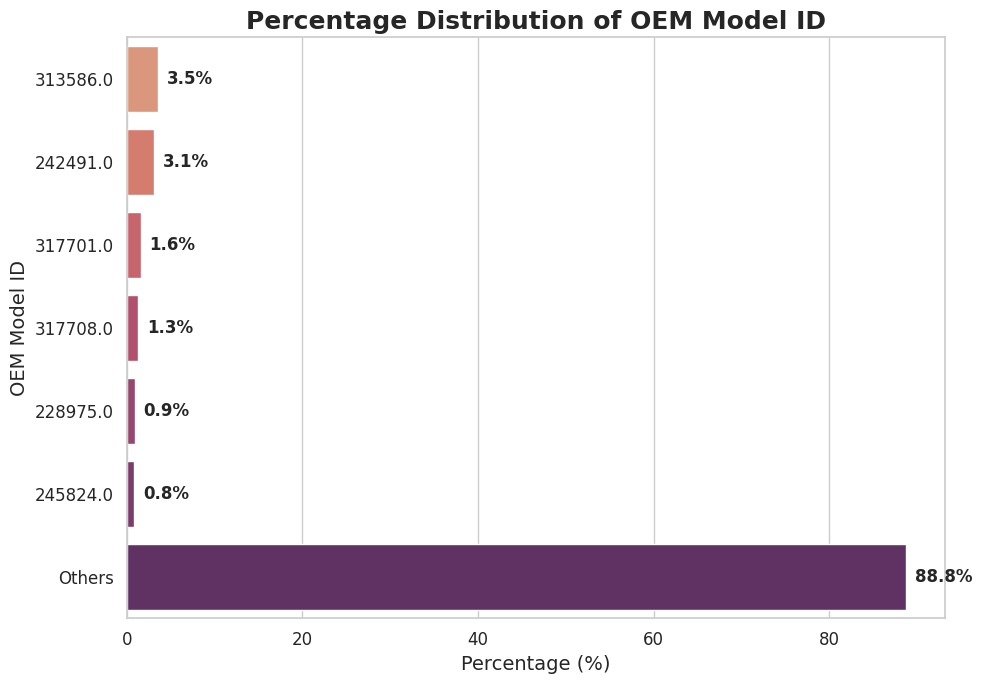

In [23]:
OEMModel_ID = df['OEMModelID'].value_counts(normalize=True) * 100

top_6 = OEMModel_ID.head(6)
others = OEMModel_ID.iloc[6:].sum()

OEMModel_ID = pd.concat([top_6, pd.Series({'Others': others})])

palette = sns.color_palette("flare", len(OEMModel_ID))

plt.figure(figsize=(10, 7))
sns.barplot(x=OEMModel_ID.values, y=OEMModel_ID.index, palette=palette, orient='h')

plt.title('Percentage Distribution of OEM Model ID', fontsize=18, fontweight='bold')
plt.xlabel('Percentage (%)', fontsize=14)
plt.ylabel('OEM Model ID', fontsize=14)

for index, value in enumerate(OEMModel_ID.values):
    plt.text(value + 1, index, f'{value:.1f}%', va='center', fontsize=12, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

plt.show()

In [24]:
print("Number of unique values in the Processor Model ID column is :",df['ProcessorModelID'].nunique())
print("Percentage of unique values in the Processor Model ID column is :",df['ProcessorModelID'].nunique()/df.shape[0]*100)

Number of unique values in the Processor Model ID column is : 1659
Percentage of unique values in the Processor Model ID column is : 1.659


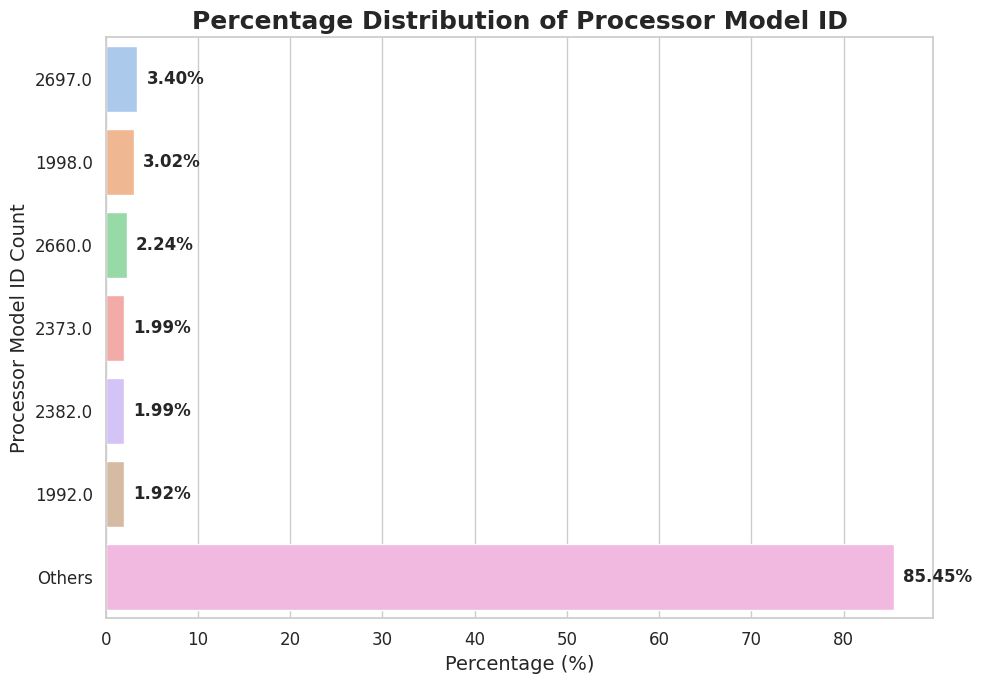

In [25]:
ProcessorModel_ID = df['ProcessorModelID'].value_counts(normalize=True) * 100

top_6 = ProcessorModel_ID.head(6)
others = ProcessorModel_ID.iloc[6:].sum()

ProcessorModel_ID = pd.concat([top_6, pd.Series({'Others': others})])

palette = sns.color_palette("pastel", len(ProcessorModel_ID))

plt.figure(figsize=(10, 7))
sns.barplot(x=ProcessorModel_ID.values, y=ProcessorModel_ID.index, palette=palette, orient='h')

plt.title('Percentage Distribution of Processor Model ID', fontsize=18, fontweight='bold')
plt.xlabel('Percentage (%)', fontsize=14)
plt.ylabel('Processor Model ID Count', fontsize=14)

for index, value in enumerate(ProcessorModel_ID.values):
    plt.text(value + 1, index, f'{value:.2f}%', va='center', fontsize=12, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

plt.show()

In [26]:
print("Number of unique values in the Internal Battery Number Of Charges column is :",df['InternalBatteryNumberOfCharges'].nunique())
print("Percentage of unique values in the Internal Battery Number Of Charges column is :",df['InternalBatteryNumberOfCharges'].nunique()/df.shape[0]*100)

Number of unique values in the Internal Battery Number Of Charges column is : 1760
Percentage of unique values in the Internal Battery Number Of Charges column is : 1.76


In [27]:
print("Number of unique values in the Numeric OS Version column is :",df['NumericOSVersion'].nunique())
print("Percentage of unique values in the Numeric OS Version column is :",df['NumericOSVersion'].nunique()/df.shape[0]*100)

Number of unique values in the Numeric OS Version column is : 221
Percentage of unique values in the Numeric OS Version column is : 0.22100000000000003


In [28]:
print("Number of unique values in the OS Build Revision Only column is :",df['OSBuildRevisionOnly'].nunique())
print("Percentage of unique values in the OS Build Revision Only column is :",df['OSBuildRevisionOnly'].nunique()/df.shape[0]*100)

Number of unique values in the OS Build Revision Only column is : 199
Percentage of unique values in the OS Build Revision Only column is : 0.199


In [29]:
print("Number of unique values in the OS Build Revision Only column is :",df['FirmwareVersionID'].nunique())
print("Percentage of unique values in the OS Build Revision Only column is :",df['FirmwareVersionID'].nunique()/df.shape[0]*100)

Number of unique values in the OS Build Revision Only column is : 12299
Percentage of unique values in the OS Build Revision Only column is : 12.299


Columns with excessively many categories are dropped to reduce dimensionality, prevent overfitting, and improve model interpretability and efficiency.

## Categorical Columns

In [30]:
print("Number of unique values in the Engine Version column is :",df['EngineVersion'].nunique())
print("Number of unique values in the App Version column is :",df['AppVersion'].nunique())

Number of unique values in the Engine Version column is : 37
Number of unique values in the App Version column is : 69


In [31]:
pd.DataFrame(df['EngineVersion'].value_counts()/df.shape[0]*100)

count
EngineVersion        
1.1.15200.1    45.219
1.1.15100.1    44.017
1.1.15000.2     3.169
1.1.14901.4     2.597
1.1.14800.3     1.719
1.1.15300.6     0.650
1.1.14700.5     0.593
1.1.14600.4     0.569
1.1.14104.0     0.328
1.1.15300.5     0.255
1.1.13504.0     0.212
1.1.14500.5     0.124
1.1.14405.2     0.082
1.1.14306.0     0.056
1.1.14202.0     0.050
1.1.14003.0     0.034
1.1.13804.0     0.033
1.1.13903.0     0.028
1.1.13303.0     0.027
1.1.13601.0     0.026
1.1.13407.0     0.023
1.1.15000.1     0.022
1.1.14901.3     0.022
1.1.13103.0     0.020
1.1.14305.0     0.017
1.1.14700.4     0.016
1.1.12902.0     0.015
1.1.13704.0     0.015
1.1.13701.0     0.015
1.1.13202.0     0.014
1.1.13000.0     0.010
1.1.14700.3     0.009
1.1.14800.1     0.007
1.1.14500.2     0.003
1.1.12805.0     0.002
1.1.13802.0     0.001
1.1.13803.0     0.001

In [32]:
pd.DataFrame(df['AppVersion'].value_counts()/df.shape[0]*100)

count
AppVersion              
4.18.1807.18075   62.119
4.18.1806.18062   10.473
4.12.16299.15      3.234
4.16.17656.18052   2.943
4.14.17639.18041   2.490
...                  ...
4.5.216.0          0.001
4.18.1807.18072    0.001
4.10.205.0         0.001
4.17.17685.20082   0.001
4.6.305.0          0.001

[69 rows x 1 columns]

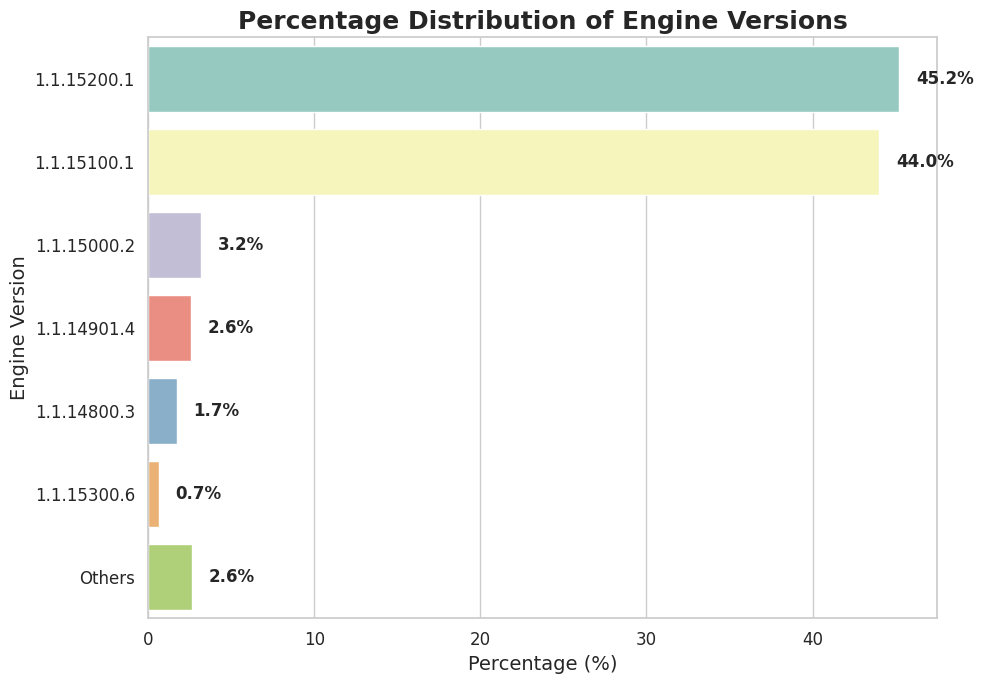

In [33]:
engine_version_counts = df['EngineVersion'].value_counts(normalize=True) * 100

top_6 = engine_version_counts.head(6)
others = engine_version_counts.iloc[6:].sum()

engine_version_counts = pd.concat([top_6, pd.Series({'Others': others})])

palette = sns.color_palette("Set3", len(engine_version_counts))

plt.figure(figsize=(10, 7))
sns.barplot(x=engine_version_counts.values, y=engine_version_counts.index, palette=palette, orient='h')

plt.title('Percentage Distribution of Engine Versions', fontsize=18, fontweight='bold')
plt.xlabel('Percentage (%)', fontsize=14)
plt.ylabel('Engine Version', fontsize=14)

for index, value in enumerate(engine_version_counts.values):
    plt.text(value + 1, index, f'{value:.1f}%', va='center', fontsize=12, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

plt.show()

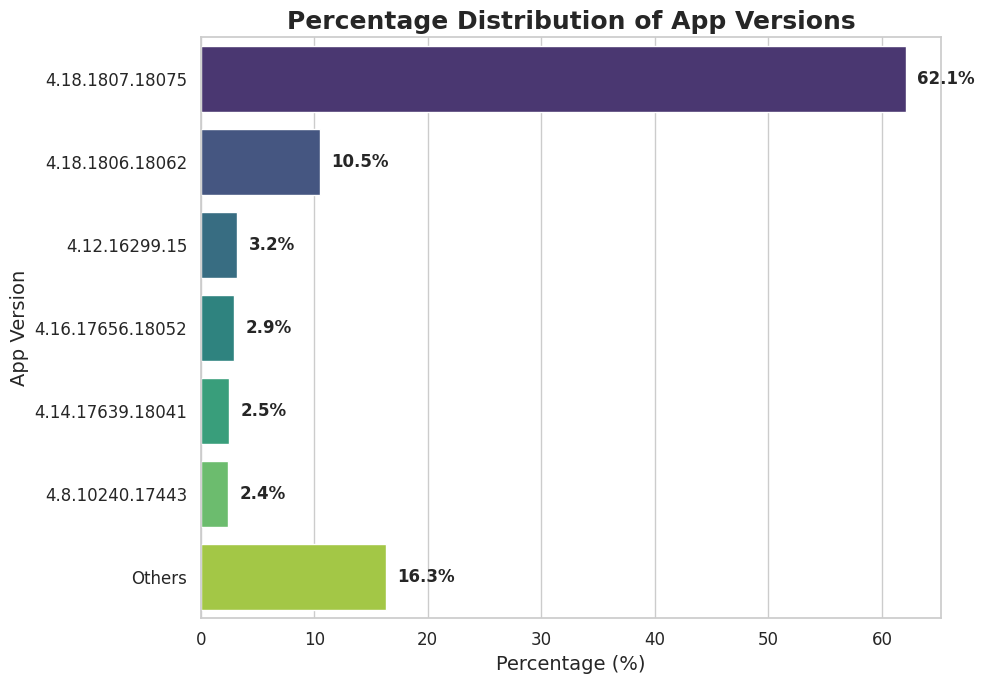

In [34]:
app_version_counts = df['AppVersion'].value_counts(normalize=True) * 100

top_6 = app_version_counts.head(6)
others = app_version_counts.iloc[6:].sum()

app_version_counts = pd.concat([top_6, pd.Series({'Others': others})])

palette = sns.color_palette("viridis", len(app_version_counts))

plt.figure(figsize=(10, 7))
sns.barplot(x=app_version_counts.values, y=app_version_counts.index, palette=palette, orient='h')

plt.title('Percentage Distribution of App Versions', fontsize=18, fontweight='bold')
plt.xlabel('Percentage (%)', fontsize=14)
plt.ylabel('App Version', fontsize=14)

for index, value in enumerate(app_version_counts.values):
    plt.text(value + 1, index, f'{value:.1f}%', va='center', fontsize=12, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

plt.show()

In [35]:
print("Number of unique values in the AntiVirusConfigID column is :",df['AntivirusConfigID'].nunique())
print("Percentage of unique values in the AntiVirusConfigID column is :",df['AntivirusConfigID'].nunique()/df.shape[0]*100)

Number of unique values in the AntiVirusConfigID column is : 1976
Percentage of unique values in the AntiVirusConfigID column is : 1.976


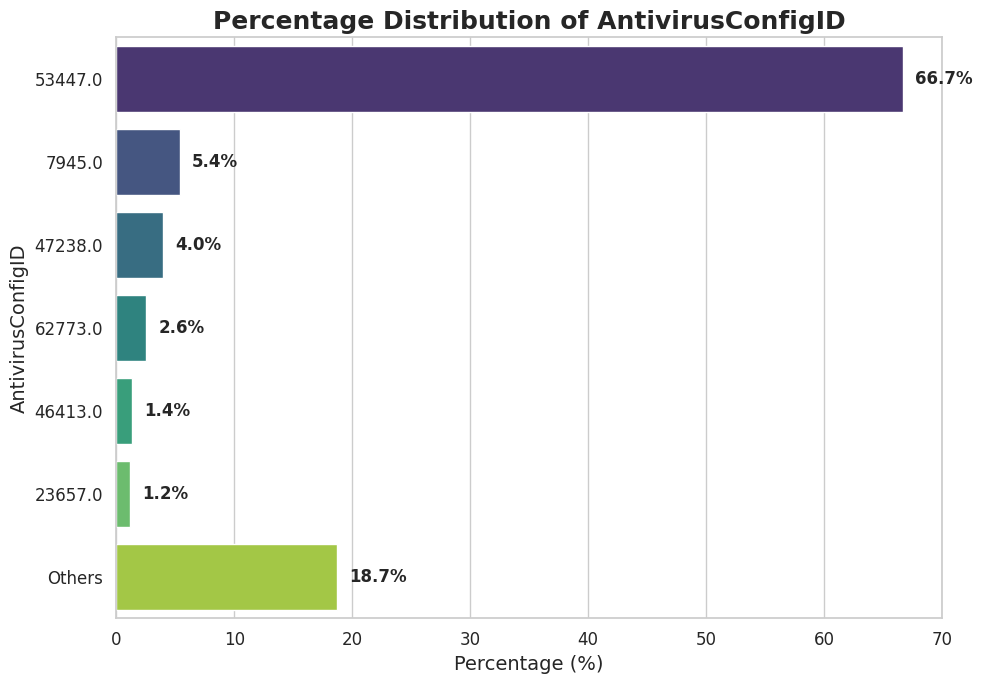

In [36]:
anti_virus_id = df['AntivirusConfigID'].value_counts(normalize=True) * 100

top_6 = anti_virus_id.head(6)
others = anti_virus_id.iloc[6:].sum()

anti_virus_id = pd.concat([top_6, pd.Series({'Others': others})])

palette = sns.color_palette("viridis", len(anti_virus_id))

plt.figure(figsize=(10, 7))
sns.barplot(x=anti_virus_id.values, y=anti_virus_id.index, palette=palette, orient='h')

plt.title('Percentage Distribution of AntivirusConfigID', fontsize=18, fontweight='bold')
plt.xlabel('Percentage (%)', fontsize=14)
plt.ylabel('AntivirusConfigID', fontsize=14)

for index, value in enumerate(anti_virus_id.values):
    plt.text(value + 1, index, f'{value:.1f}%', va='center', fontsize=12, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

plt.show()

In [37]:
print("Number of unique values in the NumAntivirusProductsInstalled column is :",df['NumAntivirusProductsInstalled'].nunique())

Number of unique values in the NumAntivirusProductsInstalled column is : 5


In [38]:
category_percentages = pd.DataFrame(df['NumAntivirusProductsInstalled'].value_counts()/df.shape[0]*100)
category_percentages = category_percentages.reset_index()
category_percentages

NumAntivirusProductsInstalled   count
0                            1.0  69.748
1                            2.0  27.825
2                            3.0   2.255
3                            4.0   0.091
4                            5.0   0.005

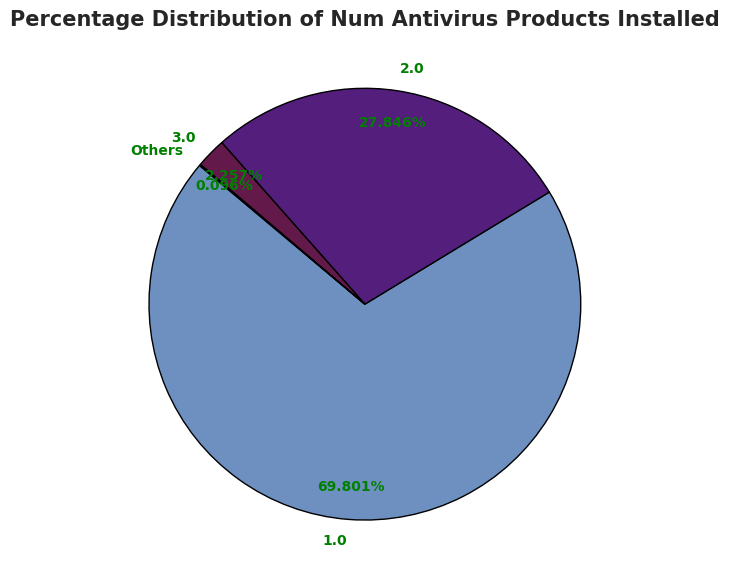

In [39]:
antivirus_products = df['NumAntivirusProductsInstalled'].value_counts(normalize=True) * 100

top_3 = antivirus_products.head(3)
others = antivirus_products.iloc[3:].sum()
antivirus_products = pd.concat([top_3, pd.Series({'Others': others})])

palette = sns.color_palette("twilight", len(antivirus_products))

plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    antivirus_products.values, 
    labels=antivirus_products.index, 
    autopct=lambda p: f'{p:.3f}%' if p > 0 else '', 
    colors=palette, 
    startangle=140, 
    wedgeprops={'edgecolor': 'black'},  
    pctdistance=0.85,  
    textprops={'fontsize': 10, 'fontweight': 'bold', 'color': 'green'}
)

plt.title('Percentage Distribution of Num Antivirus Products Installed', fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()

In [40]:
print("Number of unique values in the GeoRegionID column is :",df['GeoRegionID'].nunique())

Number of unique values in the GeoRegionID column is : 239


In [41]:
category_percentages = pd.DataFrame(df['GeoRegionID'].value_counts()/df.shape[0]*100)
category_percentages = category_percentages.reset_index()
category_percentages

GeoRegionID   count
0          277.0  16.975
1          211.0   4.637
2           53.0   4.357
3           89.0   4.044
4          240.0   3.987
..           ...     ...
234          4.0   0.001
235        263.0   0.001
236         84.0   0.001
237         31.0   0.001
238        161.0   0.001

[239 rows x 2 columns]

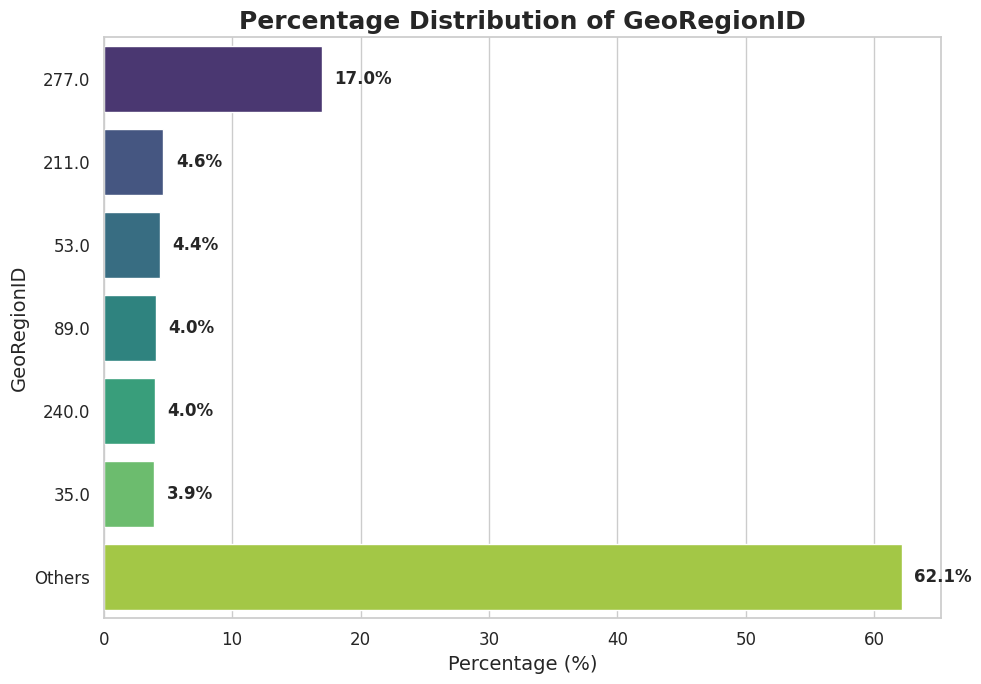

In [42]:
region_id = df['GeoRegionID'].value_counts(normalize=True) * 100

top_6 = region_id.head(6)
others = region_id.iloc[6:].sum()

region_id = pd.concat([top_6, pd.Series({'Others': others})])

palette = sns.color_palette("viridis", len(region_id))

plt.figure(figsize=(10, 7))
sns.barplot(x=region_id.values, y=region_id.index, palette=palette, orient='h')

plt.title('Percentage Distribution of GeoRegionID', fontsize=18, fontweight='bold')
plt.xlabel('Percentage (%)', fontsize=14)
plt.ylabel('GeoRegionID', fontsize=14)

for index, value in enumerate(region_id.values):
    plt.text(value + 1, index, f'{value:.1f}%', va='center', fontsize=12, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

plt.show()

In [43]:
print("Number of unique values in the LocaleEnglishNameID column is :",df['LocaleEnglishNameID'].nunique())

Number of unique values in the LocaleEnglishNameID column is : 185


In [44]:
category_percentages = pd.DataFrame(df['LocaleEnglishNameID'].value_counts()/df.shape[0]*100)
category_percentages = category_percentages.reset_index()
category_percentages

LocaleEnglishNameID   count
0                     75  23.411
1                    182   4.997
2                     74   4.625
3                     42   4.365
4                     88   4.224
..                   ...     ...
180                  138   0.001
181                  108   0.001
182                  110   0.001
183                  161   0.001
184                  127   0.001

[185 rows x 2 columns]

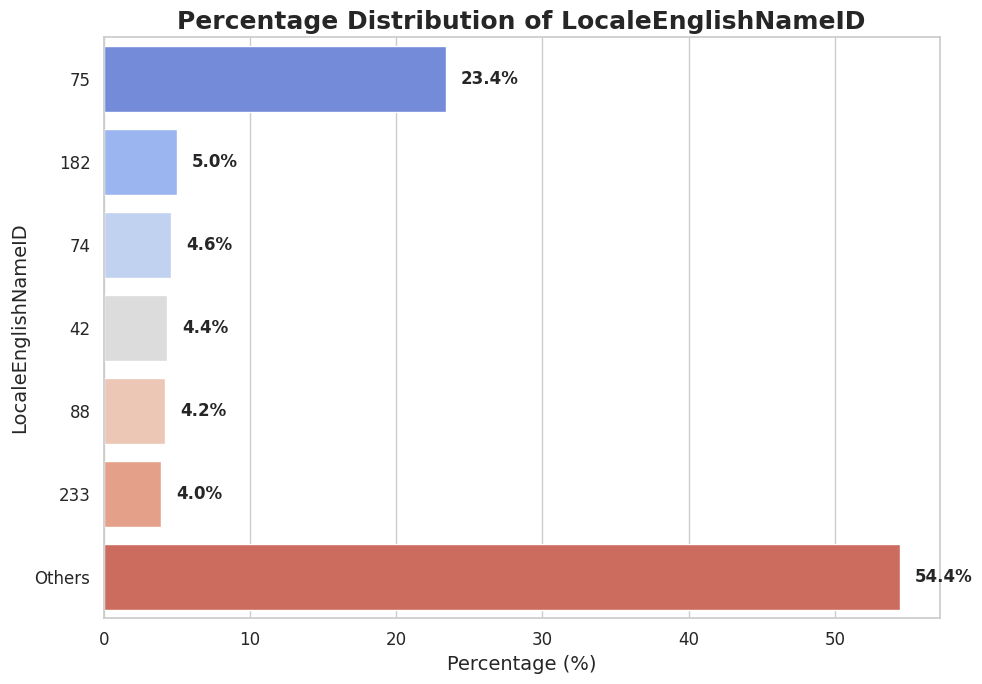

In [45]:
english_id = df['LocaleEnglishNameID'].value_counts(normalize=True) * 100

top_6 = english_id.head(6)
others = english_id.iloc[6:].sum()

english_id = pd.concat([top_6, pd.Series({'Others': others})])

palette = sns.color_palette("coolwarm", len(english_id))

plt.figure(figsize=(10, 7))
sns.barplot(x=english_id.values, y=english_id.index, palette=palette, orient='h')

plt.title('Percentage Distribution of LocaleEnglishNameID', fontsize=18, fontweight='bold')
plt.xlabel('Percentage (%)', fontsize=14)
plt.ylabel('LocaleEnglishNameID', fontsize=14)

for index, value in enumerate(english_id.values):
    plt.text(value + 1, index, f'{value:.1f}%', va='center', fontsize=12, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

plt.show()

In [46]:
print("Number of unique values in the Processor column is :",df['Processor'].nunique())

Number of unique values in the Processor column is : 3


In [47]:
category_percentages = pd.DataFrame(df['Processor'].value_counts()/df.shape[0]*100)
category_percentages = category_percentages.reset_index()
category_percentages

Processor   count
0       x64  91.262
1       x86   8.733
2     arm64   0.005

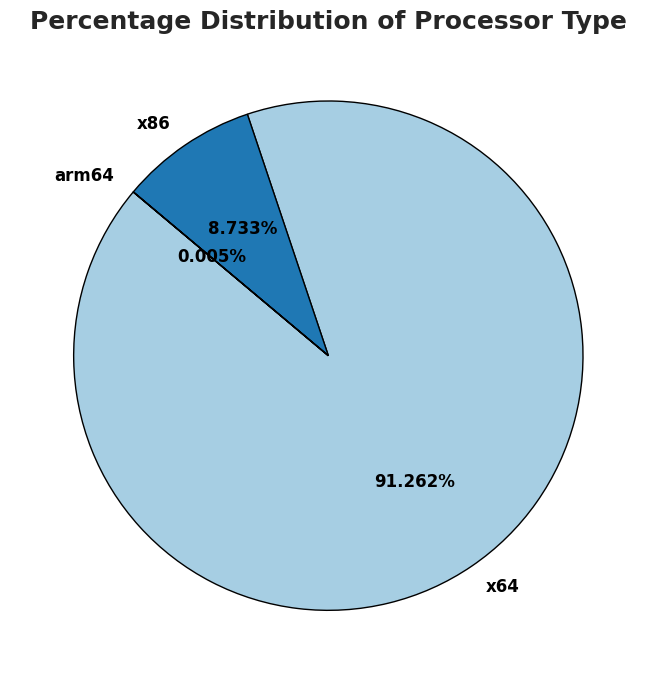

In [48]:
processor = df['Processor'].value_counts(normalize=True) * 100

palette = sns.color_palette("Paired", len(processor))

plt.figure(figsize=(10, 7))
wedges, texts, autotexts = plt.pie(
    processor.values, 
    labels=processor.index, 
    autopct=lambda p: f'{p:.3f}%' if p > 0 else '',  
    colors=palette, 
    startangle=140, 
    wedgeprops={'edgecolor': 'black'},  
    textprops={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'}
)

plt.title('Percentage Distribution of Processor Type', fontsize=18, fontweight='bold')

plt.tight_layout()
plt.show()

In [49]:
print("Number of unique values in the OSBuildNumber column is :",df['OSBuildNumber'].nunique())

Number of unique values in the OSBuildNumber column is : 24


In [50]:
category_percentages = pd.DataFrame(df['OSBuildNumber'].value_counts()/df.shape[0]*100)
category_percentages = category_percentages.reset_index()
category_percentages

OSBuildNumber   count
0           17134  45.837
1           16299  29.632
2           15063   8.376
3           14393   7.378
4           10586   3.869
5           10240   3.108
6            9600   1.401
7            7601   0.226
8           17744   0.026
9           17692   0.026
10          17738   0.020
11          17758   0.014
12          17735   0.014
13          17741   0.014
14          17746   0.014
15          17713   0.011
16          17755   0.007
17          17763   0.006
18          17751   0.006
19          17760   0.005
20          17672   0.004
21          17754   0.003
22          17730   0.002
23          17686   0.001

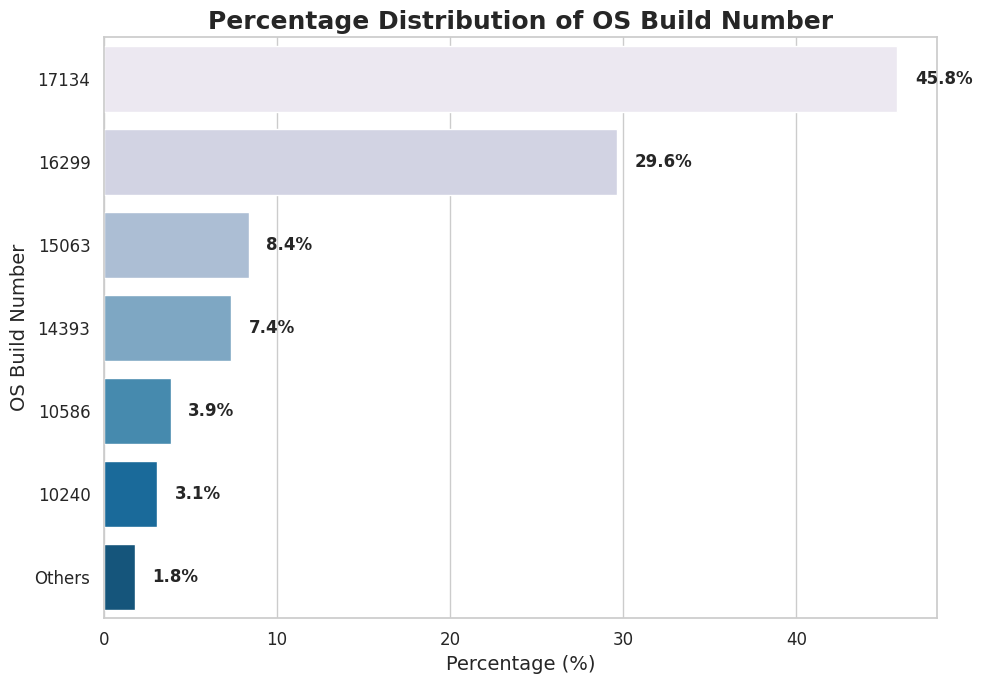

In [51]:
os_num = df['OSBuildNumber'].value_counts(normalize=True) * 100

top_6 = os_num.head(6)
others = os_num.iloc[6:].sum()

os_num = pd.concat([top_6, pd.Series({'Others': others})])

palette = sns.color_palette("PuBu", len(os_num))

plt.figure(figsize=(10, 7))
sns.barplot(x=os_num.values, y=os_num.index, palette=palette, orient='h')

plt.title('Percentage Distribution of OS Build Number', fontsize=18, fontweight='bold')
plt.xlabel('Percentage (%)', fontsize=14)
plt.ylabel('OS Build Number', fontsize=14)

for index, value in enumerate(os_num.values):
    plt.text(value + 1, index, f'{value:.1f}%', va='center', fontsize=12, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

plt.show()

In [52]:
print("Number of unique values in the OSProductSuite column is :",df['OSProductSuite'].nunique())

Number of unique values in the OSProductSuite column is : 7


In [53]:
category_percentages = pd.DataFrame(df['OSProductSuite'].value_counts()/df.shape[0]*100)
category_percentages = category_percentages.reset_index()
category_percentages

OSProductSuite   count
0             768  62.966
1             256  37.001
2             272   0.025
3             784   0.003
4              16   0.002
5             305   0.002
6             400   0.001

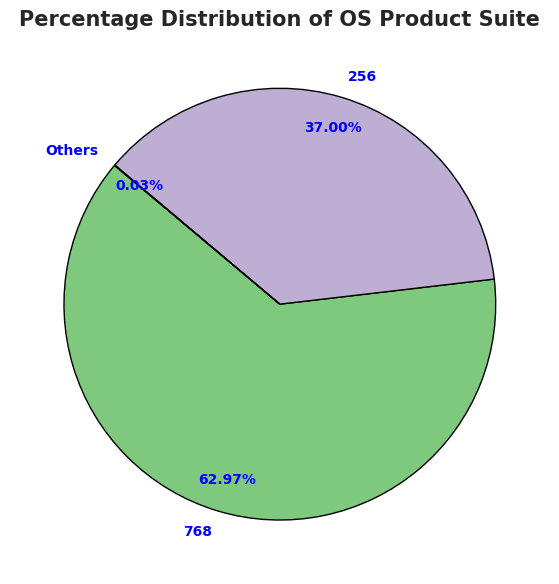

In [54]:
os_version = df['OSProductSuite'].value_counts(normalize=True) * 100

top_2 = os_version.head(2)
others = os_version.iloc[2:].sum()
os_version = pd.concat([top_2, pd.Series({'Others': others})])

palette = sns.color_palette("Accent", len(os_version))

plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    os_version.values, 
    labels=os_version.index, 
    autopct=lambda p: f'{p:.2f}%' if p > 0 else '', 
    colors=palette, 
    startangle=140, 
    wedgeprops={'edgecolor': 'black'},  
    pctdistance=0.85,  
    textprops={'fontsize': 10, 'fontweight': 'bold', 'color': 'blue'}
)

plt.title('Percentage Distribution of OS Product Suite', fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()

In [55]:
print("Number of unique values in the OsPlatformSubRelease column is :",df['OsPlatformSubRelease'].nunique())

Number of unique values in the OsPlatformSubRelease column is : 9


In [56]:
category_percentages = pd.DataFrame(df['OsPlatformSubRelease'].value_counts()/df.shape[0]*100)
category_percentages = category_percentages.reset_index()
category_percentages

OsPlatformSubRelease   count
0                  rs4  45.837
1                  rs3  29.632
2                  rs2   8.376
3                  rs1   7.378
4                  th2   3.869
5                  th1   3.108
6           windows8.1   1.401
7             windows7   0.226
8               prers5   0.173

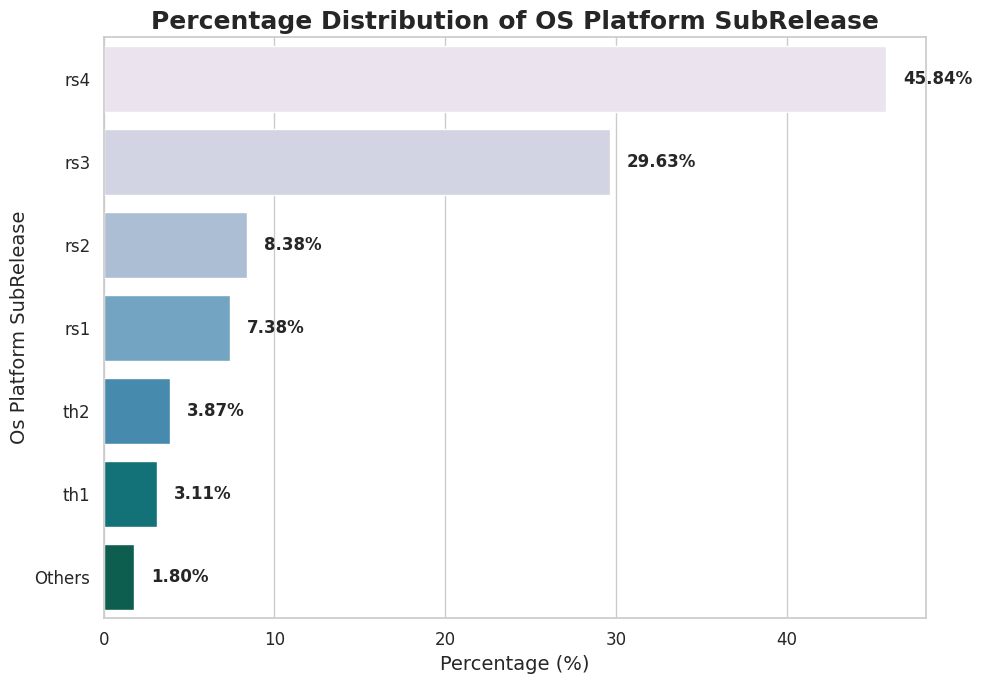

In [57]:
os_plat = df['OsPlatformSubRelease'].value_counts(normalize=True) * 100

top_6 = os_plat.head(6)
others = os_plat.iloc[6:].sum()

os_plat = pd.concat([top_6, pd.Series({'Others': others})])

palette = sns.color_palette("PuBuGn", len(os_plat))

plt.figure(figsize=(10, 7))
sns.barplot(x=os_plat.values, y=os_plat.index, palette=palette, orient='h')

plt.title('Percentage Distribution of OS Platform SubRelease', fontsize=18, fontweight='bold')
plt.xlabel('Percentage (%)', fontsize=14)
plt.ylabel('Os Platform SubRelease', fontsize=14)

for index, value in enumerate(os_plat.values):
    plt.text(value + 1, index, f'{value:.2f}%', va='center', fontsize=12, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

plt.show()

In [58]:
print("Number of unique values in the IE Version ID column is :",df['IEVersionID'].nunique())

Number of unique values in the IE Version ID column is : 102


In [59]:
category_percentages = pd.DataFrame(df['IEVersionID'].value_counts()/df.shape[0]*100)
category_percentages = category_percentages.reset_index()
category_percentages

IEVersionID   count
0          137.0  45.781
1          117.0  21.531
2          108.0   5.465
3          111.0   5.093
4           98.0   3.912
..           ...     ...
97         329.0   0.001
98         284.0   0.001
99         338.0   0.001
100        297.0   0.001
101        321.0   0.001

[102 rows x 2 columns]

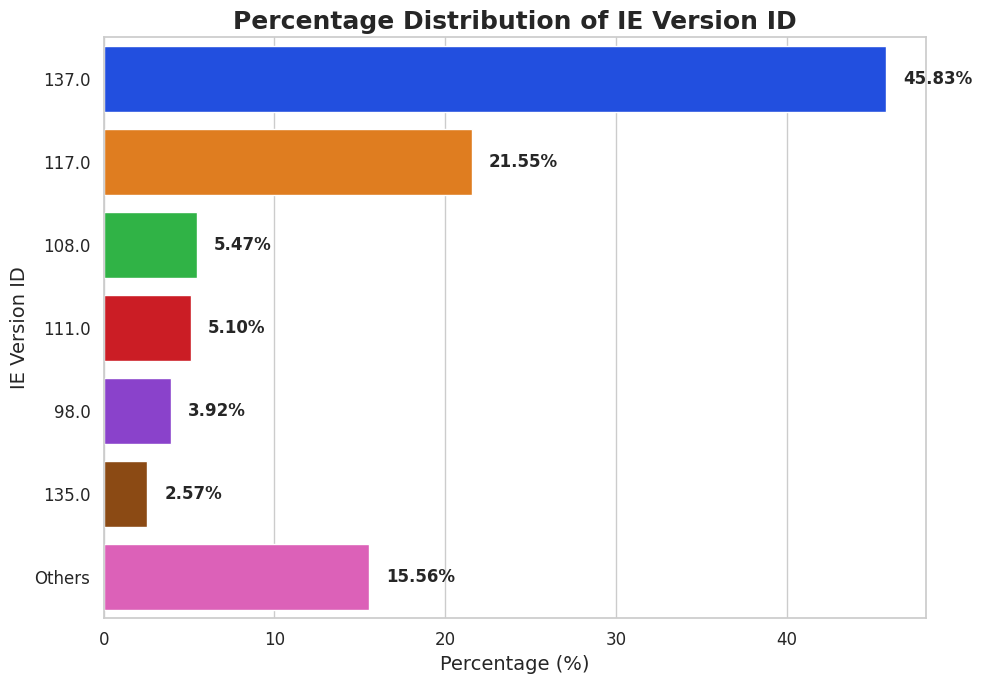

In [60]:
IEVersion_ID = df['IEVersionID'].value_counts(normalize=True) * 100

top_6 = IEVersion_ID.head(6)
others = IEVersion_ID.iloc[6:].sum()

IEVersion_ID = pd.concat([top_6, pd.Series({'Others': others})])

palette = sns.color_palette("bright", len(IEVersion_ID))

plt.figure(figsize=(10, 7))
sns.barplot(x=IEVersion_ID.values, y=IEVersion_ID.index, palette=palette, orient='h')

plt.title('Percentage Distribution of IE Version ID', fontsize=18, fontweight='bold')
plt.xlabel('Percentage (%)', fontsize=14)
plt.ylabel('IE Version ID', fontsize=14)

for index, value in enumerate(IEVersion_ID.values):
    plt.text(value + 1, index, f'{value:.2f}%', va='center', fontsize=12, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

plt.show()

In [61]:
print("Number of unique values in the MDC2 Form Factor column is :",df['MDC2FormFactor'].nunique())

Number of unique values in the MDC2 Form Factor column is : 11


In [62]:
category_percentages = pd.DataFrame(df['MDC2FormFactor'].value_counts()/df.shape[0]*100)
category_percentages = category_percentages.reset_index()
category_percentages

MDC2FormFactor   count
0        Notebook  64.547
1         Desktop  21.612
2     Convertible   4.807
3      Detachable   3.510
4        AllInOne   3.147
5         PCOther   1.274
6     LargeTablet   0.706
7     SmallTablet   0.351
8     SmallServer   0.032
9    MediumServer   0.010
10    LargeServer   0.004

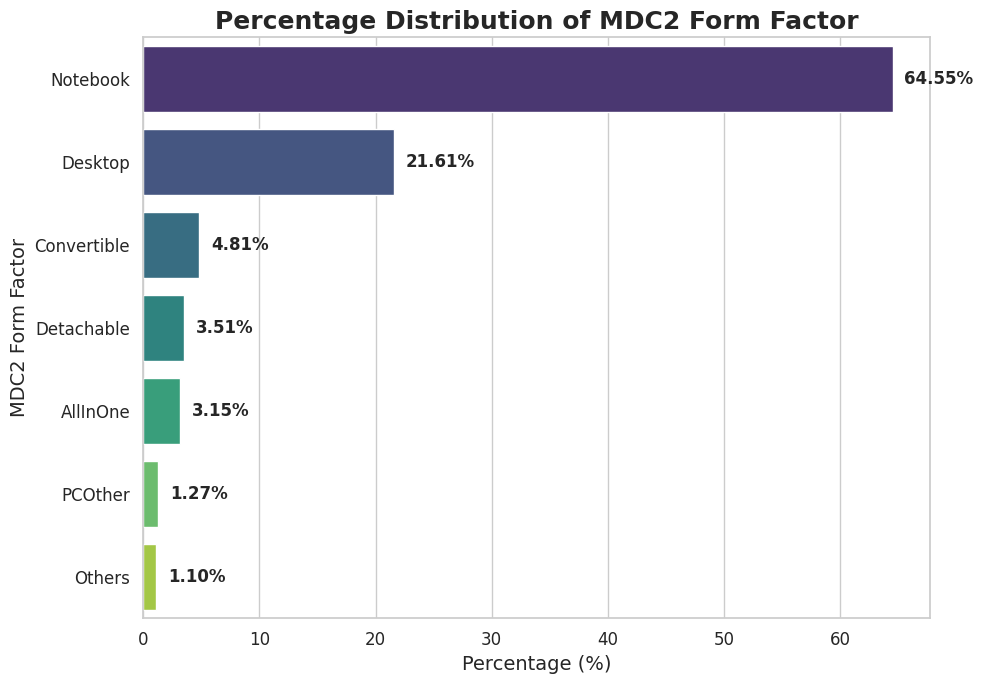

In [63]:
Form_Factor = df['MDC2FormFactor'].value_counts(normalize=True) * 100

top_6 = Form_Factor.head(6)
others = Form_Factor.iloc[6:].sum()

Form_Factor = pd.concat([top_6, pd.Series({'Others': others})])

palette = sns.color_palette("viridis", len(Form_Factor))

plt.figure(figsize=(10, 7))
sns.barplot(x=Form_Factor.values, y=Form_Factor.index, palette=palette, orient='h')

plt.title('Percentage Distribution of MDC2 Form Factor', fontsize=18, fontweight='bold')
plt.xlabel('Percentage (%)', fontsize=14)
plt.ylabel('MDC2 Form Factor', fontsize=14)

for index, value in enumerate(Form_Factor.values):
    plt.text(value + 1, index, f'{value:.2f}%', va='center', fontsize=12, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

plt.show()

In [64]:
print("Number of unique values in the OEM Name ID column is :",df['OEMNameID'].nunique())
print("Percentage of unique values in the OEM Name ID column is :",df['OEMNameID'].nunique()/df.shape[0]*100)

Number of unique values in the OEM Name ID column is : 837
Percentage of unique values in the OEM Name ID column is : 0.8370000000000001


In [65]:
category_percentages = pd.DataFrame(df['OEMNameID'].value_counts()/df.shape[0]*100)
category_percentages = category_percentages.reset_index()
category_percentages

OEMNameID   count
0       2668.0  14.561
1       2102.0  12.153
2       1443.0  10.875
3       2206.0  10.399
4        585.0  10.225
..         ...     ...
832     3393.0   0.001
833     1380.0   0.001
834     1904.0   0.001
835     2477.0   0.001
836     4393.0   0.001

[837 rows x 2 columns]

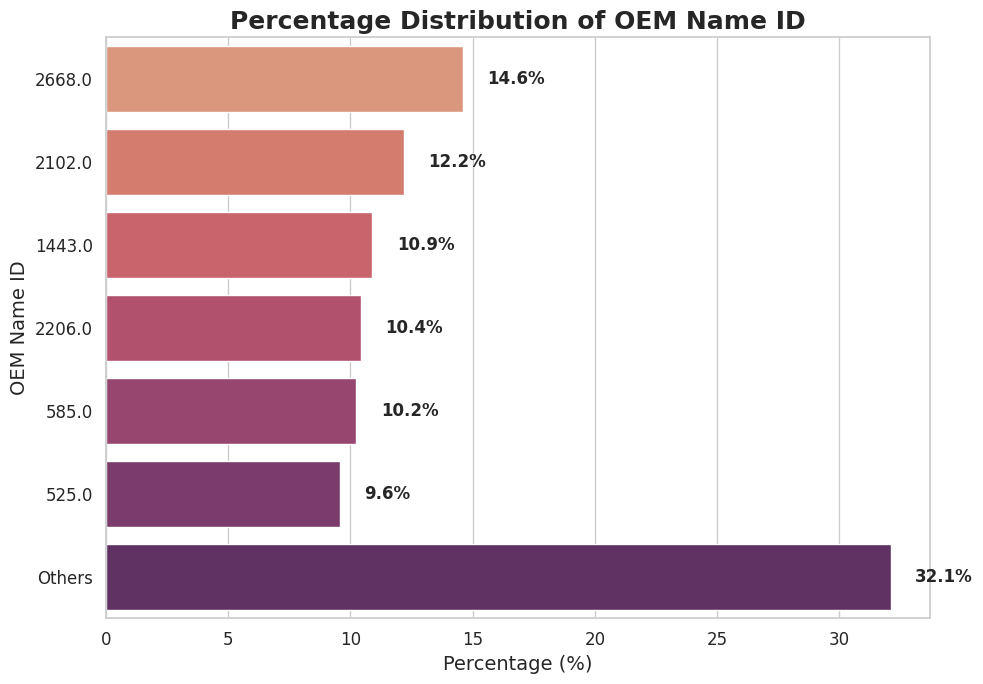

In [66]:
OEMName_ID = df['OEMNameID'].value_counts(normalize=True) * 100

top_6 = OEMName_ID.head(6)
others = OEMName_ID.iloc[6:].sum()

OEMName_ID = pd.concat([top_6, pd.Series({'Others': others})])

palette = sns.color_palette("flare", len(OEMName_ID))

plt.figure(figsize=(10, 7))
sns.barplot(x=OEMName_ID.values, y=OEMName_ID.index, palette=palette, orient='h')

plt.title('Percentage Distribution of OEM Name ID', fontsize=18, fontweight='bold')
plt.xlabel('Percentage (%)', fontsize=14)
plt.ylabel('OEM Name ID', fontsize=14)

for index, value in enumerate(OEMName_ID.values):
    plt.text(value + 1, index, f'{value:.1f}%', va='center', fontsize=12, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

plt.show()

In [67]:
print("Number of unique values in the Chassis Type column is :",df['ChassisType'].nunique())

Number of unique values in the Chassis Type column is : 28


In [68]:
category_percentages = pd.DataFrame(df['ChassisType'].value_counts()/df.shape[0]*100)
category_percentages = category_percentages.reset_index()
category_percentages

ChassisType   count
0              Notebook  59.459
1               Desktop  20.818
2                Laptop   7.811
3              Portable   4.126
4              AllinOne   2.269
5           Convertible   0.966
6             MiniTower   0.952
7            Detachable   0.611
8     LowProfileDesktop   0.559
9                 Other   0.535
10             HandHeld   0.526
11              UNKNOWN   0.454
12          SpaceSaving   0.324
13               Tablet   0.163
14                Tower   0.129
15    MainServerChassis   0.111
16              Unknown   0.059
17             LunchBox   0.039
18               MiniPC   0.034
19     RackMountChassis   0.017
20  BusExpansionChassis   0.013
21          SubNotebook   0.011
22                    0   0.004
23                   30   0.004
24           CompactPCI   0.001
25           SubChassis   0.001
26   MultisystemChassis   0.001
27                   35   0.001

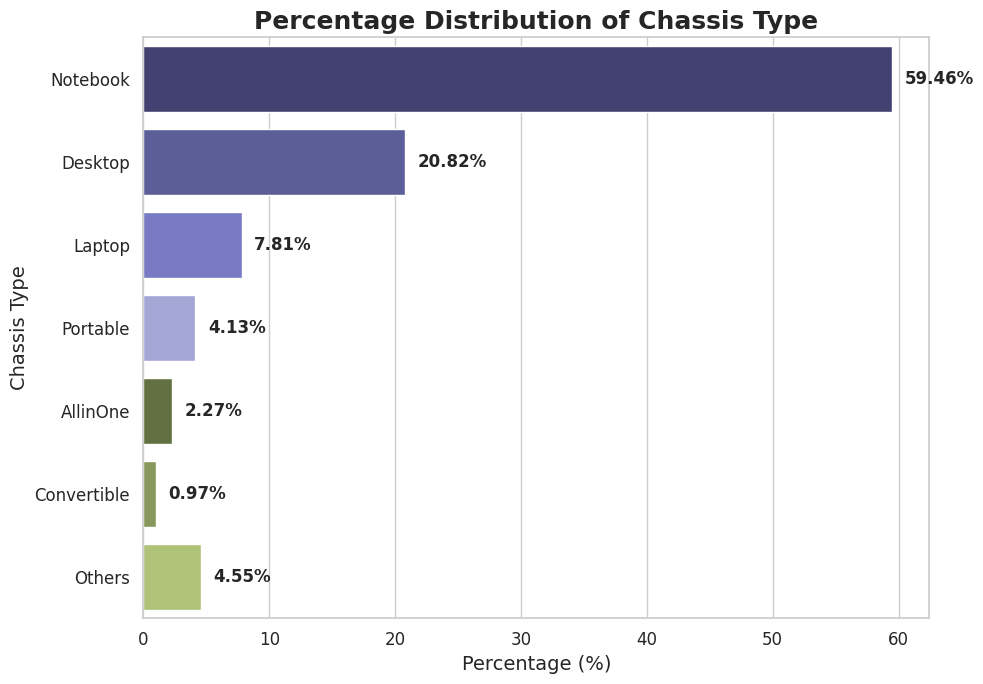

In [69]:
Chassis_Type = df['ChassisType'].value_counts(normalize=True) * 100

top_6 = Chassis_Type.head(6)
others = Chassis_Type.iloc[6:].sum()

Chassis_Type = pd.concat([top_6, pd.Series({'Others': others})])

palette = sns.color_palette("tab20b", len(Chassis_Type))

plt.figure(figsize=(10, 7))
sns.barplot(x=Chassis_Type.values, y=Chassis_Type.index, palette=palette, orient='h')

plt.title('Percentage Distribution of Chassis Type', fontsize=18, fontweight='bold')
plt.xlabel('Percentage (%)', fontsize=14)
plt.ylabel('Chassis Type', fontsize=14)

for index, value in enumerate(Chassis_Type.values):
    plt.text(value + 1, index, f'{value:.2f}%', va='center', fontsize=12, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

plt.show()

In [70]:
print("Number of unique values in the OS Branch column is :",df['OSBranch'].nunique())

Number of unique values in the OS Branch column is : 13


In [71]:
category_percentages = pd.DataFrame(df['OSBranch'].value_counts()/df.shape[0]*100)
category_percentages = category_percentages.reset_index()
category_percentages

OSBranch   count
0                 rs4_release  46.909
1      rs3_release_svc_escrow  14.518
2                 rs3_release  14.343
3                 rs2_release   8.527
4                 rs1_release   7.780
5             th2_release_sec   2.912
6                     th1_st1   2.298
7                 th2_release   1.632
8                         th1   0.827
9                 rs5_release   0.145
10  rs3_release_svc_escrow_im   0.078
11          rs_prerelease_flt   0.026
12              rs_prerelease   0.005

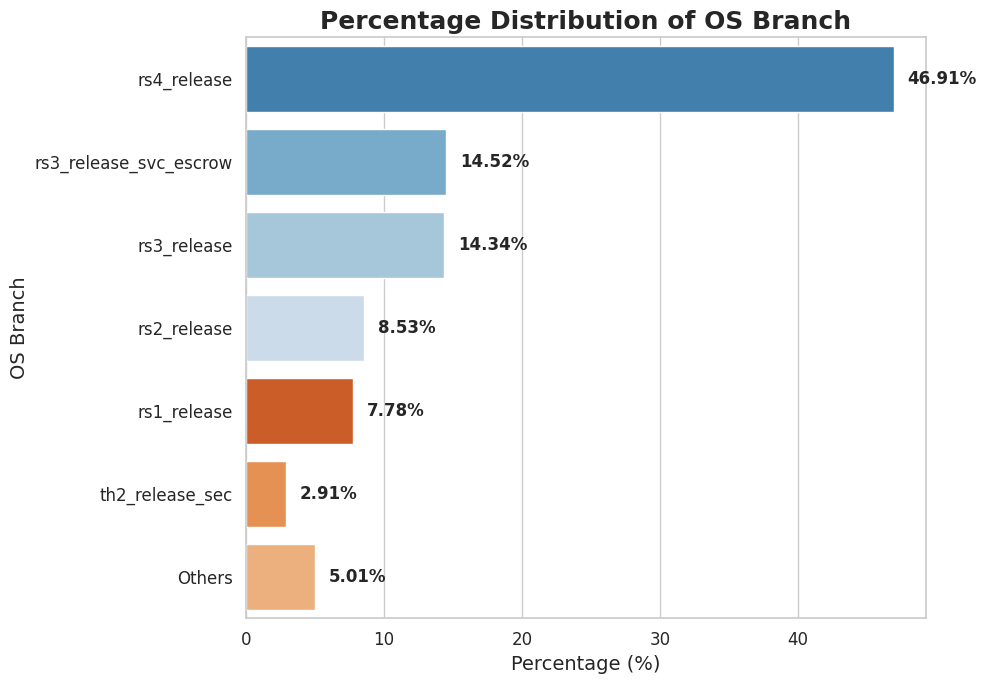

In [72]:
OS_Branch = df['OSBranch'].value_counts(normalize=True) * 100

top_6 = OS_Branch.head(6)
others = OS_Branch.iloc[6:].sum()

OS_Branch = pd.concat([top_6, pd.Series({'Others': others})])

palette = sns.color_palette("tab20c", len(Chassis_Type))

plt.figure(figsize=(10, 7))
sns.barplot(x=OS_Branch.values, y=OS_Branch.index, palette=palette, orient='h')

plt.title('Percentage Distribution of OS Branch', fontsize=18, fontweight='bold')
plt.xlabel('Percentage (%)', fontsize=14)
plt.ylabel('OS Branch', fontsize=14)

for index, value in enumerate(OS_Branch.values):
    plt.text(value + 1, index, f'{value:.2f}%', va='center', fontsize=12, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

plt.show()

In [73]:
print("Number of unique values in the OS Build Number Only column is :",df['OSBuildNumberOnly'].nunique())

Number of unique values in the OS Build Number Only column is : 23


In [74]:
category_percentages = pd.DataFrame(df['OSBuildNumberOnly'].value_counts()/df.shape[0]*100)
category_percentages = category_percentages.reset_index()
category_percentages

OSBuildNumberOnly   count
0               17134  46.908
1               16299  28.939
2               15063   8.526
3               14393   7.780
4               10586   4.544
5               10240   3.125
6               17738   0.027
7               17744   0.027
8               17692   0.026
9               17746   0.017
10              17735   0.014
11              17741   0.013
12              17758   0.013
13              17760   0.008
14              17763   0.007
15              17755   0.007
16              17754   0.006
17              17751   0.005
18              17672   0.004
19              17723   0.001
20              15060   0.001
21              17133   0.001
22              17686   0.001

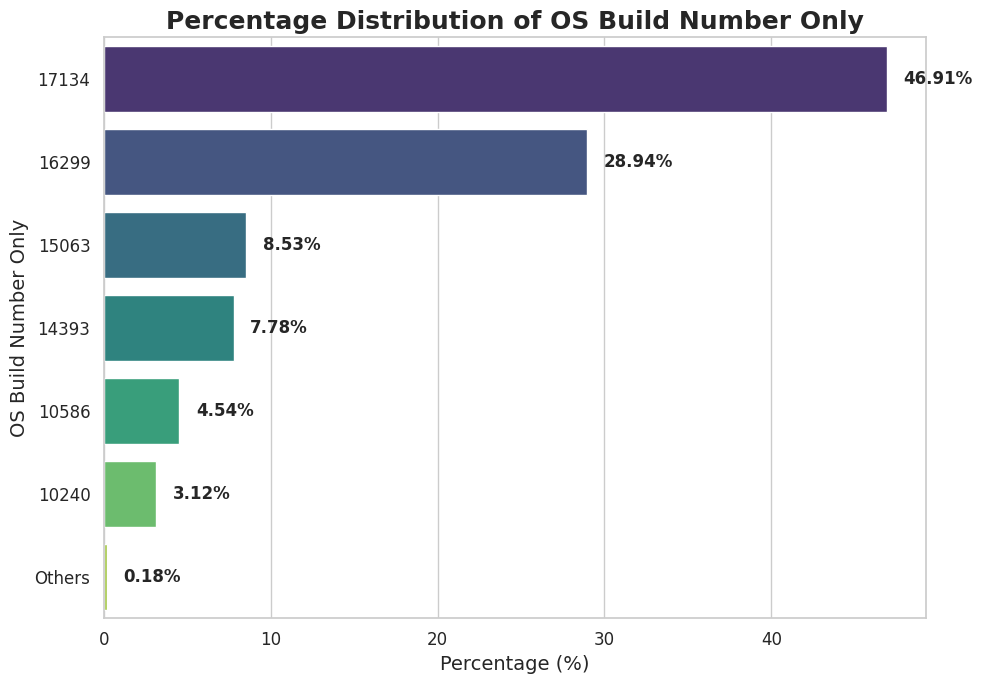

In [75]:
OSBuild_NumberOnly = df['OSBuildNumberOnly'].value_counts(normalize=True) * 100

top_6 = OSBuild_NumberOnly.head(6)
others = OSBuild_NumberOnly.iloc[6:].sum()

OSBuild_NumberOnly = pd.concat([top_6, pd.Series({'Others': others})])

palette = sns.color_palette("viridis", len(OSBuild_NumberOnly))

plt.figure(figsize=(10, 7))
sns.barplot(x=OSBuild_NumberOnly.values, y=OSBuild_NumberOnly.index, palette=palette, orient='h')

plt.title('Percentage Distribution of OS Build Number Only', fontsize=18, fontweight='bold')
plt.xlabel('Percentage (%)', fontsize=14)
plt.ylabel('OS Build Number Only', fontsize=14)

for index, value in enumerate(OSBuild_NumberOnly.values):
    plt.text(value + 1, index, f'{value:.2f}%', va='center', fontsize=12, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

plt.show()

In [76]:
print("Number of unique values in the OS Edition column is :",df['OSEdition'].nunique())

Number of unique values in the OS Edition column is : 20


In [77]:
category_percentages = pd.DataFrame(df['OSEdition'].value_counts()/df.shape[0]*100)
category_percentages = category_percentages.reset_index()
category_percentages

OSEdition   count
0                      Core  39.275
1              Professional  34.602
2        CoreSingleLanguage  22.006
3       CoreCountrySpecific   1.823
4     ProfessionalEducation   0.704
5                 Education   0.495
6                Enterprise   0.391
7             ProfessionalN   0.289
8               EnterpriseS   0.238
9                     Cloud   0.067
10                    CoreN   0.049
11           ServerStandard   0.021
12             EnterpriseSN   0.013
13               EducationN   0.011
14       ServerStandardEval   0.005
15   ProfessionalEducationN   0.003
16              EnterpriseN   0.003
17           ServerSolution   0.002
18  ProfessionalWorkstation   0.002
19     ServerDatacenterEval   0.001

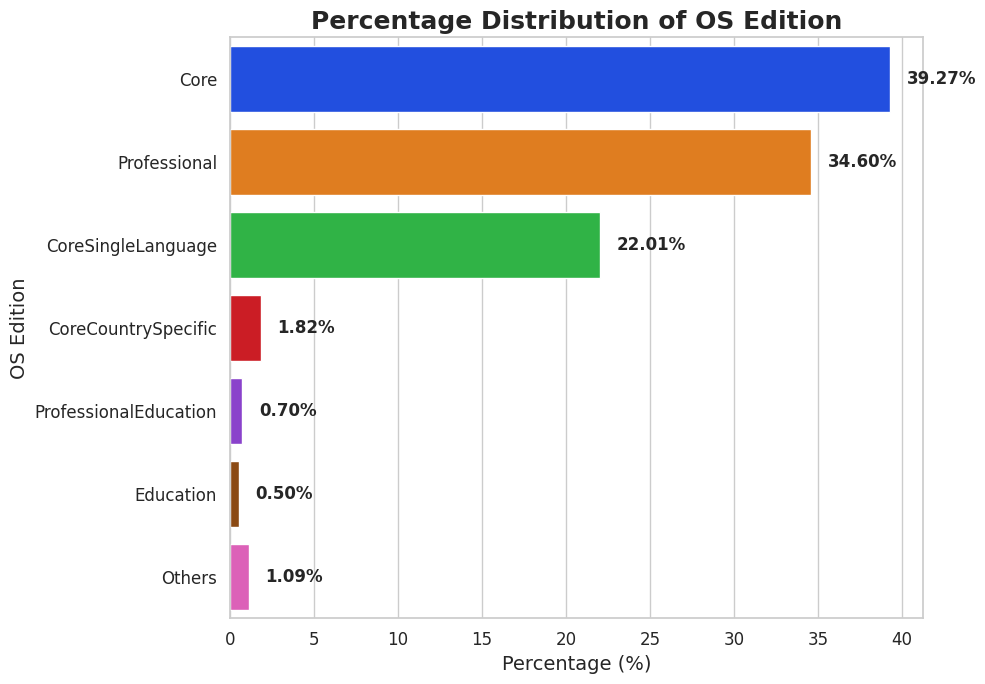

In [78]:
OS_Edition = df['OSEdition'].value_counts(normalize=True) * 100

top_6 = OS_Edition.head(6)
others = OS_Edition.iloc[6:].sum()

OS_Edition = pd.concat([top_6, pd.Series({'Others': others})])

palette = sns.color_palette("bright", len(OS_Edition))

plt.figure(figsize=(10, 7))
sns.barplot(x=OS_Edition.values, y=OS_Edition.index, palette=palette, orient='h')

plt.title('Percentage Distribution of OS Edition', fontsize=18, fontweight='bold')
plt.xlabel('Percentage (%)', fontsize=14)
plt.ylabel('OS Edition', fontsize=14)

for index, value in enumerate(OS_Edition.values):
    plt.text(value + 1, index, f'{value:.2f}%', va='center', fontsize=12, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

plt.show()

In [79]:
df['OSInstallType'].nunique()

9

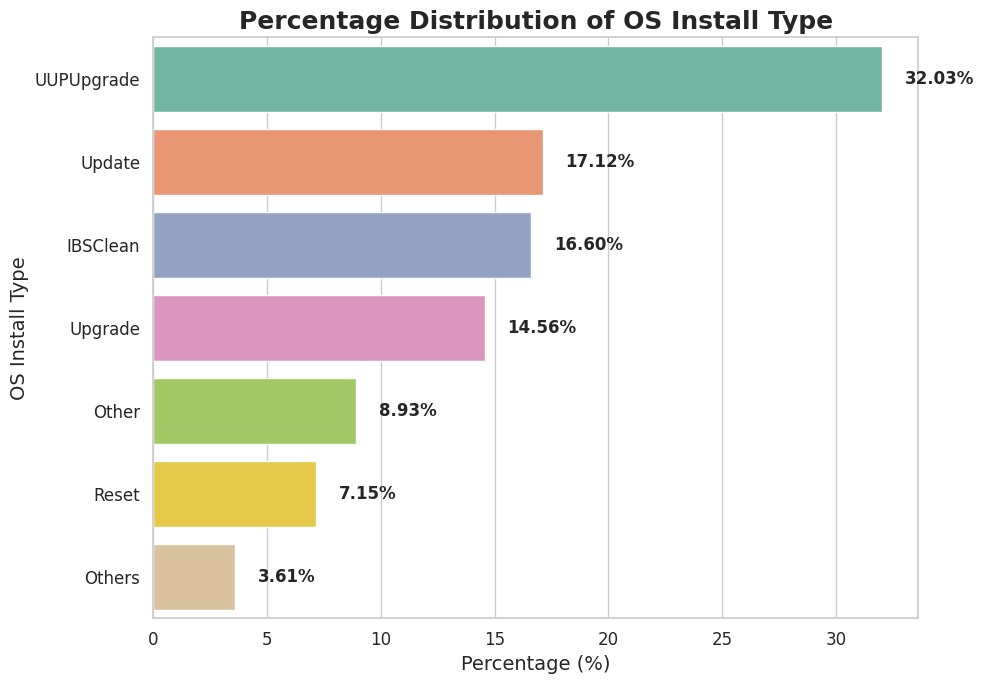

In [80]:
OS_Install = df['OSInstallType'].value_counts(normalize=True) * 100

top_6 = OS_Install.head(6)
others = OS_Install.iloc[6:].sum()

OS_Install = pd.concat([top_6, pd.Series({'Others': others})])

palette = sns.color_palette("Set2", len(OS_Install))

plt.figure(figsize=(10, 7))
sns.barplot(x=OS_Install.values, y=OS_Install.index, palette=palette, orient='h')

plt.title('Percentage Distribution of OS Install Type', fontsize=18, fontweight='bold')
plt.xlabel('Percentage (%)', fontsize=14)
plt.ylabel('OS Install Type', fontsize=14)

for index, value in enumerate(OS_Install.values):
    plt.text(value + 1, index, f'{value:.2f}%', va='center', fontsize=12, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

plt.show()

In [81]:
df['OSUILocaleID'].nunique()

64

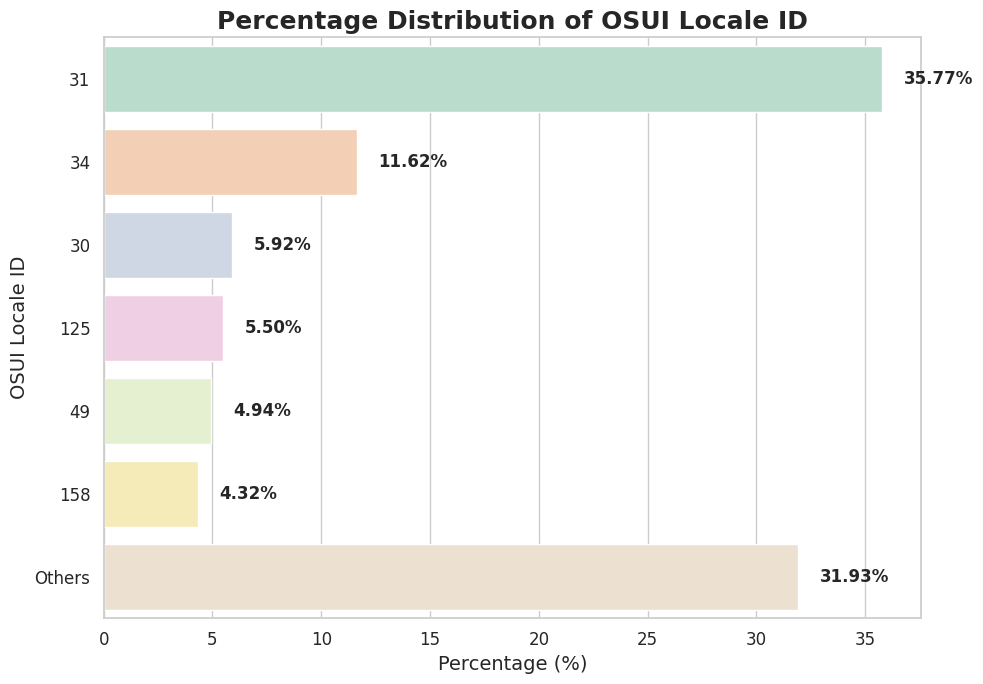

In [82]:
OSUI_Locale = df['OSUILocaleID'].value_counts(normalize=True) * 100

top_6 = OSUI_Locale.head(6)
others = OSUI_Locale.iloc[6:].sum()

OSUI_Locale = pd.concat([top_6, pd.Series({'Others': others})])

palette = sns.color_palette("Pastel2", len(OSUI_Locale))

plt.figure(figsize=(10, 7))
sns.barplot(x=OSUI_Locale.values, y=OSUI_Locale.index, palette=palette, orient='h')

plt.title('Percentage Distribution of OSUI Locale ID', fontsize=18, fontweight='bold')
plt.xlabel('Percentage (%)', fontsize=14)
plt.ylabel('OSUI Locale ID', fontsize=14)

for index, value in enumerate(OSUI_Locale.values):
    plt.text(value + 1, index, f'{value:.2f}%', va='center', fontsize=12, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

plt.show()

In [83]:
df['OSGenuineState'].nunique()

4

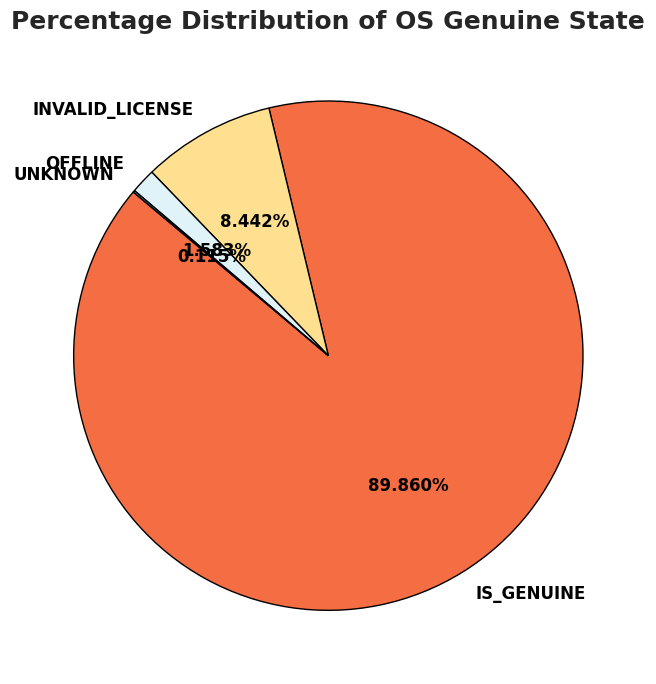

In [84]:
OS_Genuine = df['OSGenuineState'].value_counts(normalize=True) * 100

palette = sns.color_palette("RdYlBu", len(OS_Genuine))

plt.figure(figsize=(10, 7))
wedges, texts, autotexts = plt.pie(
    OS_Genuine.values, 
    labels=OS_Genuine.index, 
    autopct=lambda p: f'{p:.3f}%' if p > 0 else '',  
    colors=palette, 
    startangle=140, 
    wedgeprops={'edgecolor': 'black'},  
    textprops={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'}
)

plt.title('Percentage Distribution of OS Genuine State', fontsize=18, fontweight='bold')

plt.tight_layout()
plt.show()

In [85]:
df['FirmwareManufacturerID'].nunique()

169

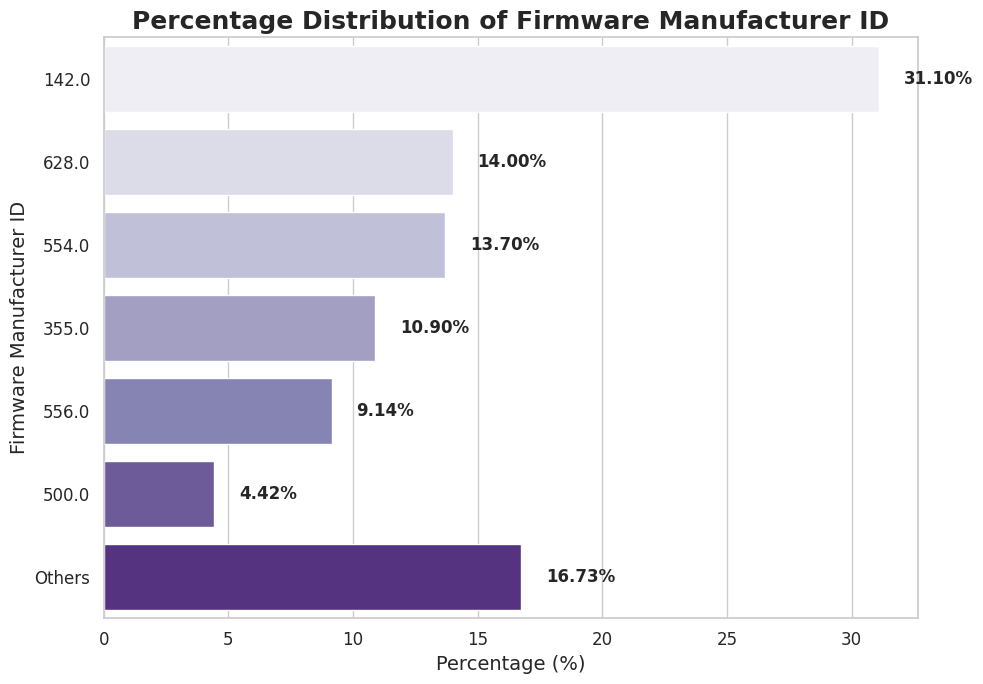

In [86]:
Firmware_Manufacturer = df['FirmwareManufacturerID'].value_counts(normalize=True) * 100

top_6 = Firmware_Manufacturer.head(6)
others = Firmware_Manufacturer.iloc[6:].sum()

Firmware_Manufacturer = pd.concat([top_6, pd.Series({'Others': others})])

palette = sns.color_palette("Purples", len(Firmware_Manufacturer))

plt.figure(figsize=(10, 7))
sns.barplot(x=Firmware_Manufacturer.values, y=Firmware_Manufacturer.index, palette=palette, orient='h')

plt.title('Percentage Distribution of Firmware Manufacturer ID', fontsize=18, fontweight='bold')
plt.xlabel('Percentage (%)', fontsize=14)
plt.ylabel('Firmware Manufacturer ID', fontsize=14)

for index, value in enumerate(Firmware_Manufacturer.values):
    plt.text(value + 1, index, f'{value:.2f}%', va='center', fontsize=12, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

plt.show()

## Numerical Columns

In [87]:
numerical_data = [
    'PrimaryDiskCapacityMB', 'SystemVolumeCapacityMB', 'TotalPhysicalRAMMB',
    'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal',
    'PrimaryDisplayResolutionVertical'
]
numerical_features = df[numerical_data]

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

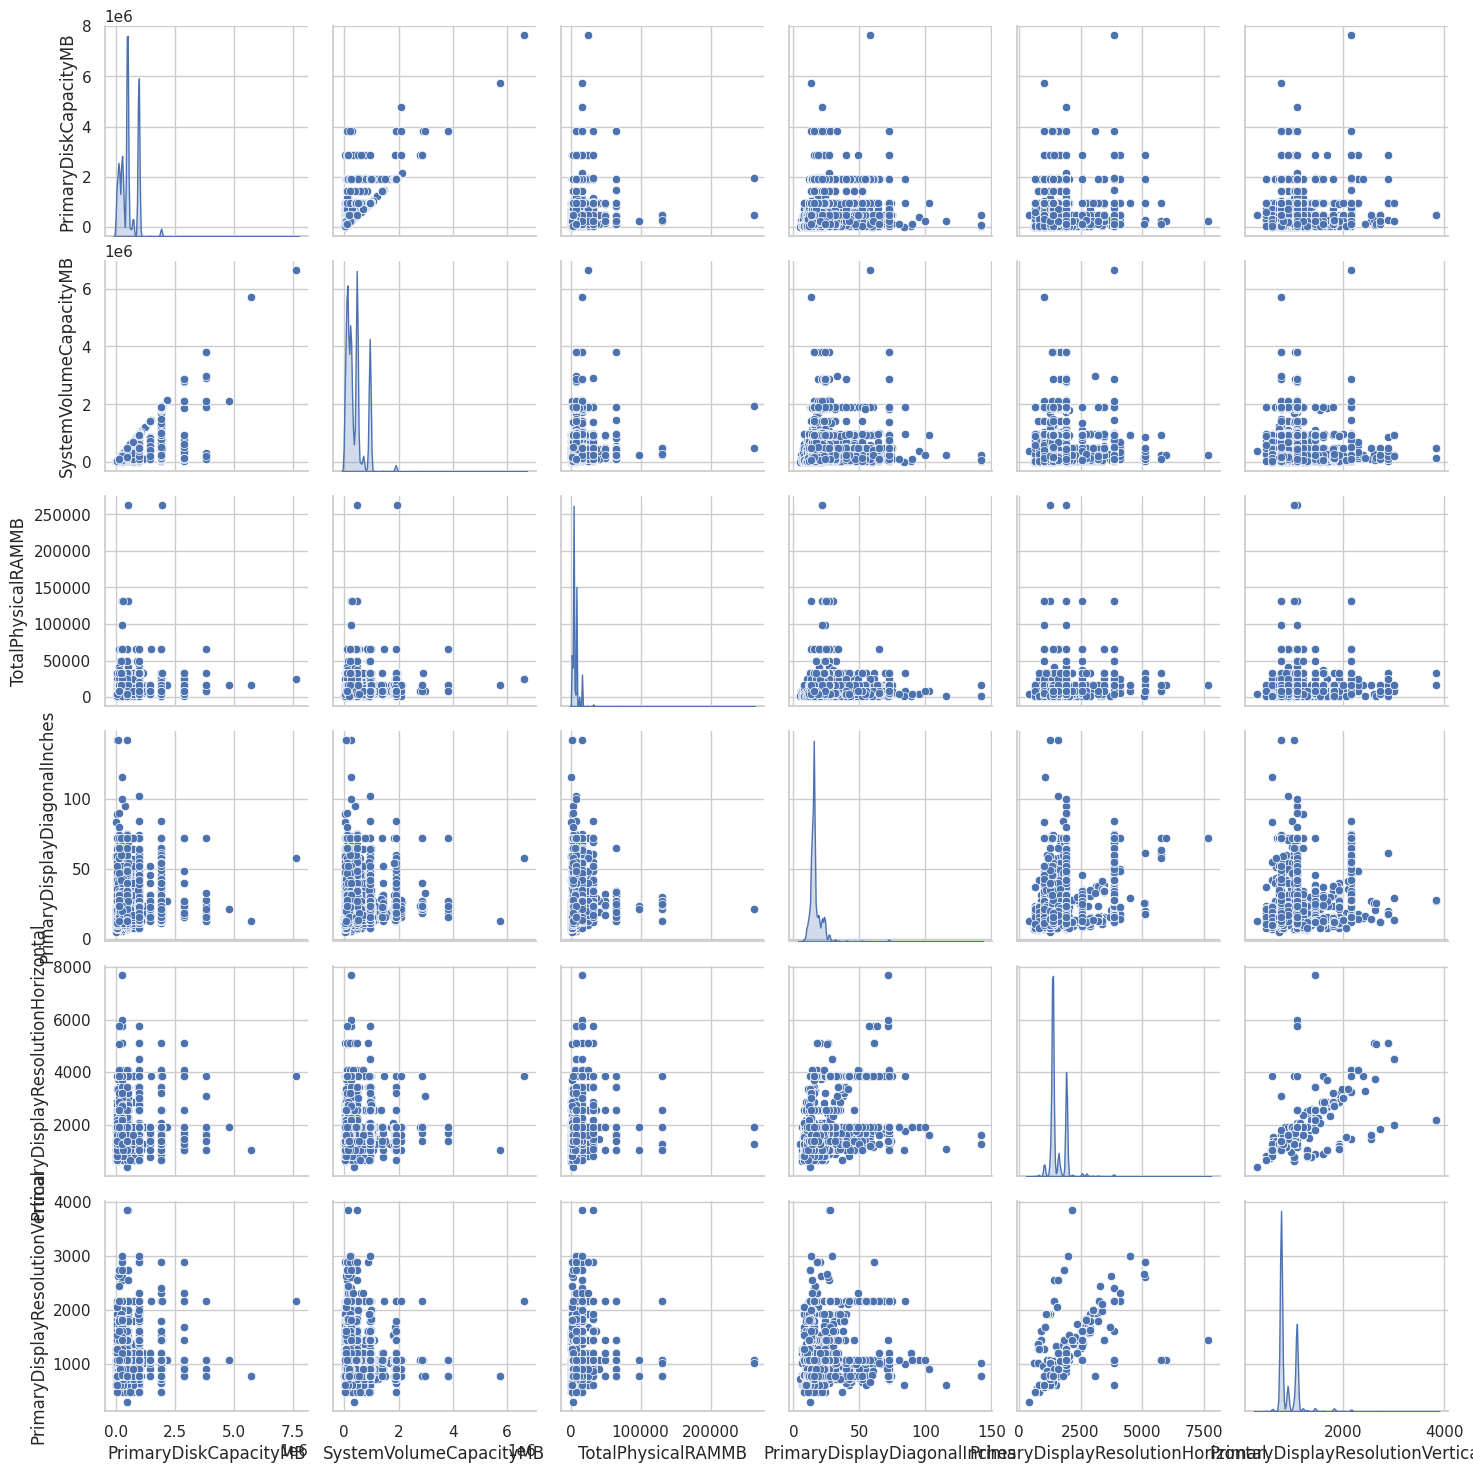

In [88]:
sns.pairplot(numerical_features, diag_kind = 'kde')
plt.show()

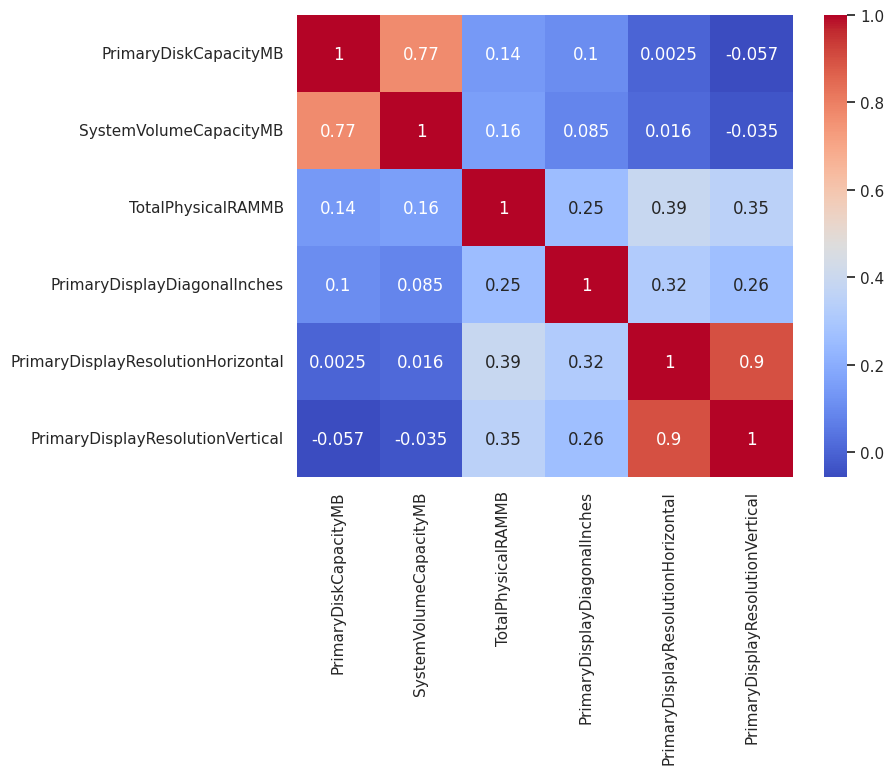

In [89]:
plt.figure(figsize = (8,6))
sns.heatmap(numerical_features.corr(), annot =  True, cmap = 'coolwarm')
plt.show()

In [90]:
df['PrimaryDiskCapacityMB'].describe()

count    9.989000e+04
mean     5.158619e+05
std      3.525624e+05
min      1.228800e+04
25%      2.441980e+05
50%      4.769400e+05
75%      9.538690e+05
max      7.630885e+06
Name: PrimaryDiskCapacityMB, dtype: float64

In [91]:
def apply_log(x):
    return np.log(x)
log = pd.DataFrame(df['PrimaryDiskCapacityMB'].apply(apply_log))
log

PrimaryDiskCapacityMB
0                   9.617670
1                  13.768282
2                  12.341198
3                  14.461424
4                  12.628870
...                      ...
99995              11.712628
99996              13.075146
99997              13.768282
99998              13.791998
99999              13.768282

[100000 rows x 1 columns]

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


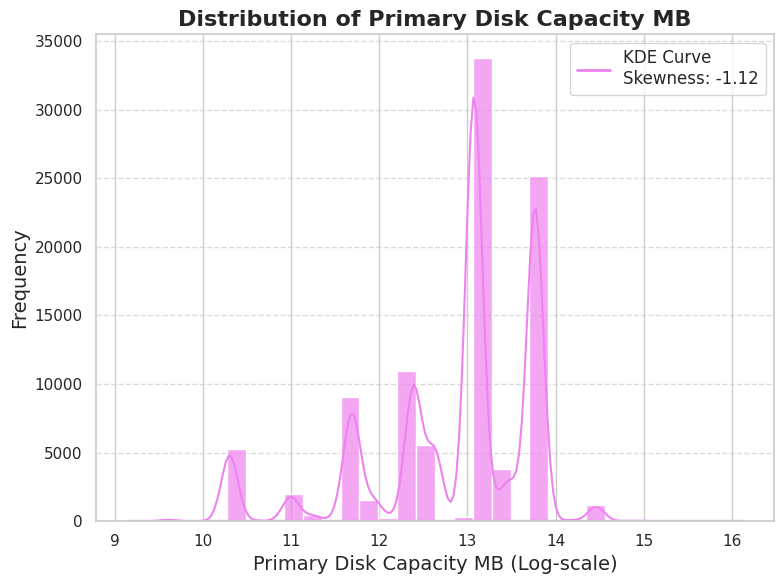

In [92]:
skew_value = skew(log['PrimaryDiskCapacityMB'].dropna())

plt.figure(figsize=(8, 6))
sns.histplot(
    log['PrimaryDiskCapacityMB'],
    kde=True,
    color='violet',  
    bins=30,  
    alpha=0.7  
)

kde_line = sns.kdeplot(
    log['PrimaryDiskCapacityMB'],
    color='violet',
    linewidth=2,
    label=f'KDE Curve\nSkewness: {skew_value:.2f}'
)

plt.title("Distribution of Primary Disk Capacity MB", fontsize=16, fontweight='bold')
plt.xlabel("Primary Disk Capacity MB (Log-scale)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12, loc='upper right')
plt.tight_layout()

plt.show()

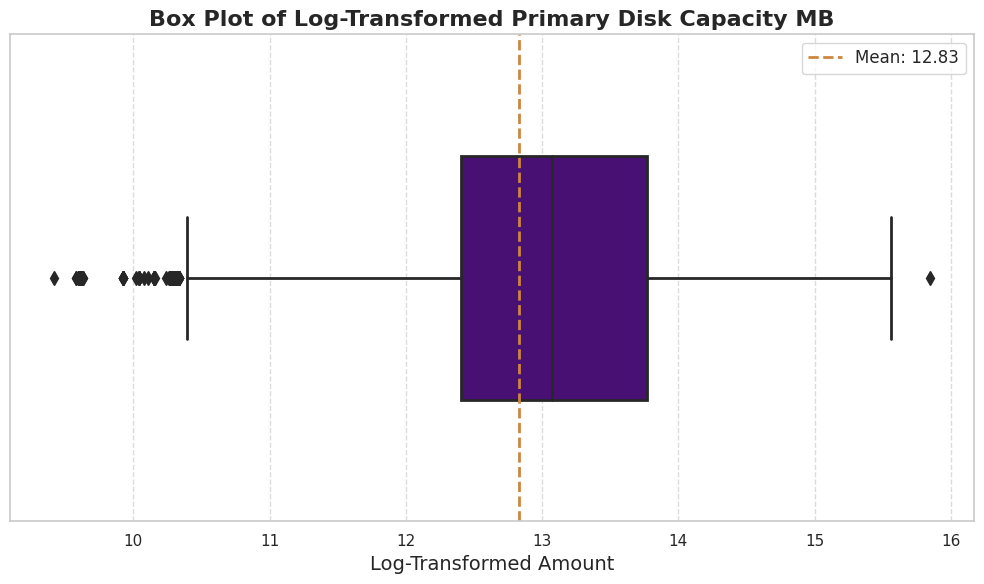

In [93]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x=log['PrimaryDiskCapacityMB'],
    color='indigo',
    width=0.5,  
    linewidth=2,  
    fliersize=7 
)

mean_value = np.mean(log['PrimaryDiskCapacityMB'])
plt.axvline(mean_value, color='peru', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')

plt.title("Box Plot of Log-Transformed Primary Disk Capacity MB", fontsize=16, fontweight='bold')
plt.xlabel("Log-Transformed Amount", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(fontsize=12, loc='upper right')
plt.tight_layout()

In [94]:
df['SystemVolumeCapacityMB'].describe()

count    9.989000e+04
mean     3.819905e+05
std      3.246240e+05
min      1.088000e+04
25%      1.208410e+05
50%      2.567655e+05
75%      4.761020e+05
max      6.630319e+06
Name: SystemVolumeCapacityMB, dtype: float64

In [95]:
def apply_log(x):
    return np.log(x)
log = pd.DataFrame(df['SystemVolumeCapacityMB'].apply(apply_log))
log

SystemVolumeCapacityMB
0                    9.571366
1                   13.766942
2                   12.338508
3                   14.452498
4                   10.874342
...                       ...
99995               11.707571
99996               13.072410
99997               13.185695
99998               13.117055
99999               13.750837

[100000 rows x 1 columns]

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


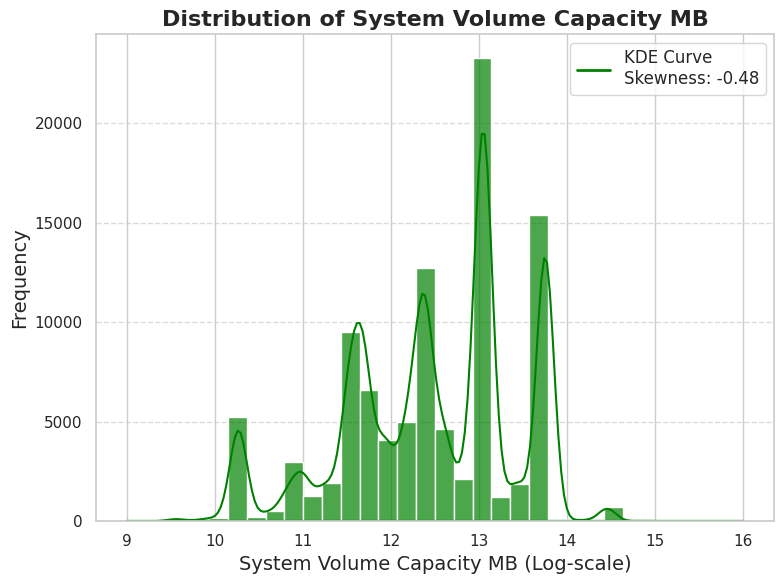

In [96]:
skew_value = skew(log['SystemVolumeCapacityMB'].dropna())

plt.figure(figsize=(8, 6))
sns.histplot(
    log['SystemVolumeCapacityMB'],
    kde=True,
    color='green',  
    bins=30,  
    alpha=0.7  
)

kde_line = sns.kdeplot(
    log['SystemVolumeCapacityMB'],
    color='green',
    linewidth=2,
    label=f'KDE Curve\nSkewness: {skew_value:.2f}'
)

plt.title("Distribution of System Volume Capacity MB", fontsize=16, fontweight='bold')
plt.xlabel("System Volume Capacity MB (Log-scale)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12, loc='upper right')
plt.tight_layout()

plt.show()

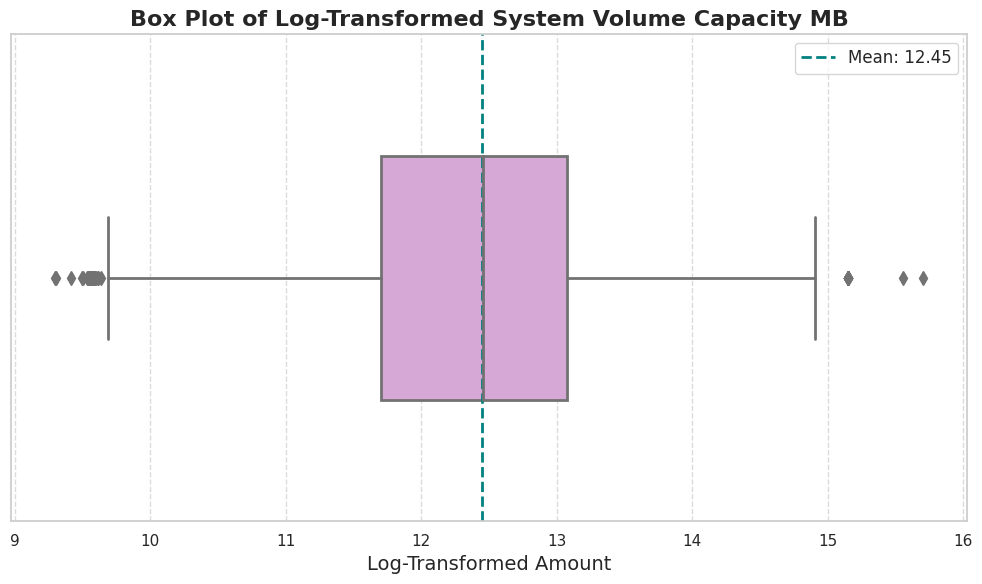

In [97]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x=log['SystemVolumeCapacityMB'],
    color='plum',
    width=0.5,  
    linewidth=2,  
    fliersize=7 
)

mean_value = np.mean(log['SystemVolumeCapacityMB'])
plt.axvline(mean_value, color='teal', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')

plt.title("Box Plot of Log-Transformed System Volume Capacity MB", fontsize=16, fontweight='bold')
plt.xlabel("Log-Transformed Amount", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(fontsize=12, loc='upper right')
plt.tight_layout()

In [98]:
df['TotalPhysicalRAMMB'].describe()

count     99849.000000
mean       6132.087442
std        4813.882548
min         512.000000
25%        4096.000000
50%        4096.000000
75%        8192.000000
max      262144.000000
Name: TotalPhysicalRAMMB, dtype: float64

In [99]:
def apply_log(x):
    return np.log(x)
log = pd.DataFrame(df['TotalPhysicalRAMMB'].apply(apply_log))
log

TotalPhysicalRAMMB
0                6.931472
1                8.317766
2                9.010913
3                9.010913
4                7.624619
...                   ...
99995            9.010913
99996            8.317766
99997            8.317766
99998            9.704061
99999            9.010913

[100000 rows x 1 columns]

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


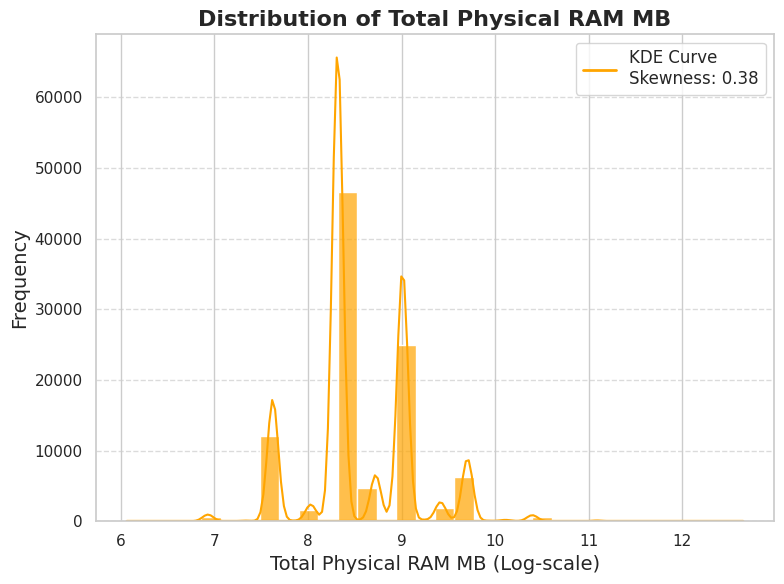

In [100]:
skew_value = skew(log['TotalPhysicalRAMMB'].dropna())

plt.figure(figsize=(8, 6))
sns.histplot(
    log['TotalPhysicalRAMMB'],
    kde=True,
    color='orange',  
    bins=30,  
    alpha=0.7  
)

kde_line = sns.kdeplot(
    log['TotalPhysicalRAMMB'],
    color='orange',
    linewidth=2,
    label=f'KDE Curve\nSkewness: {skew_value:.2f}'
)

plt.title("Distribution of Total Physical RAM MB", fontsize=16, fontweight='bold')
plt.xlabel("Total Physical RAM MB (Log-scale)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12, loc='upper right')
plt.tight_layout()

plt.show()

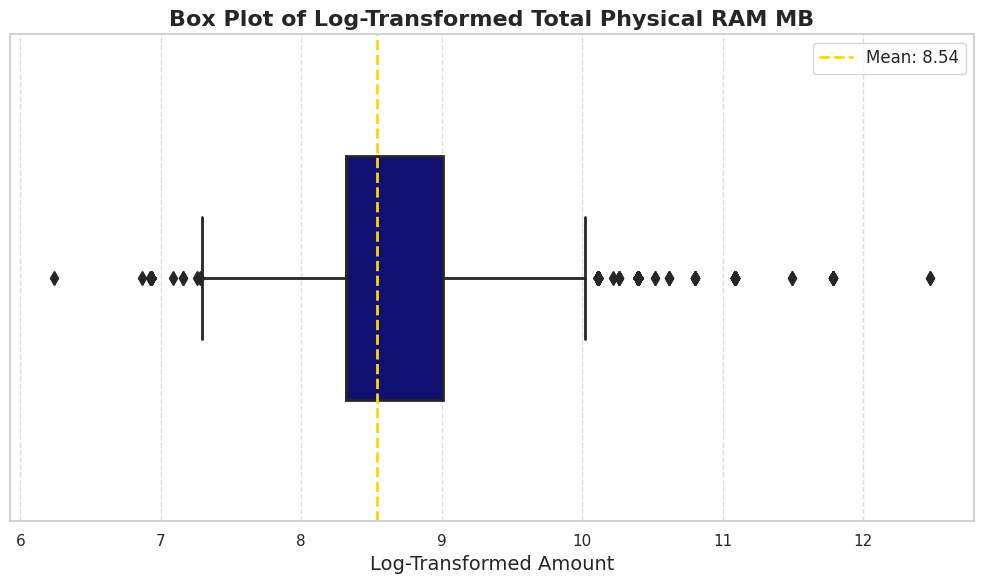

In [101]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x=log['TotalPhysicalRAMMB'],
    color='navy',
    width=0.5,  
    linewidth=2,  
    fliersize=7 
)

mean_value = np.mean(log['TotalPhysicalRAMMB'])
plt.axvline(mean_value, color='gold', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')

plt.title("Box Plot of Log-Transformed Total Physical RAM MB", fontsize=16, fontweight='bold')
plt.xlabel("Log-Transformed Amount", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(fontsize=12, loc='upper right')
plt.tight_layout()

In [102]:
df['PrimaryDisplayDiagonalInches'].describe()

count    99928.000000
mean        16.708674
std          6.031598
min          5.300000
25%         13.900000
50%         15.500000
75%         17.200000
max        142.000000
Name: PrimaryDisplayDiagonalInches, dtype: float64

In [103]:
def apply_log(x):
    return np.log(x)
log = pd.DataFrame(df['PrimaryDisplayDiagonalInches'].apply(apply_log))
log

PrimaryDisplayDiagonalInches
0                          2.079442
1                          2.965273
2                          3.178054
3                          2.740840
4                          2.995732
...                             ...
99995                      3.169686
99996                      2.580217
99997                      2.917771
99998                      2.602690
99999                      2.740840

[100000 rows x 1 columns]

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


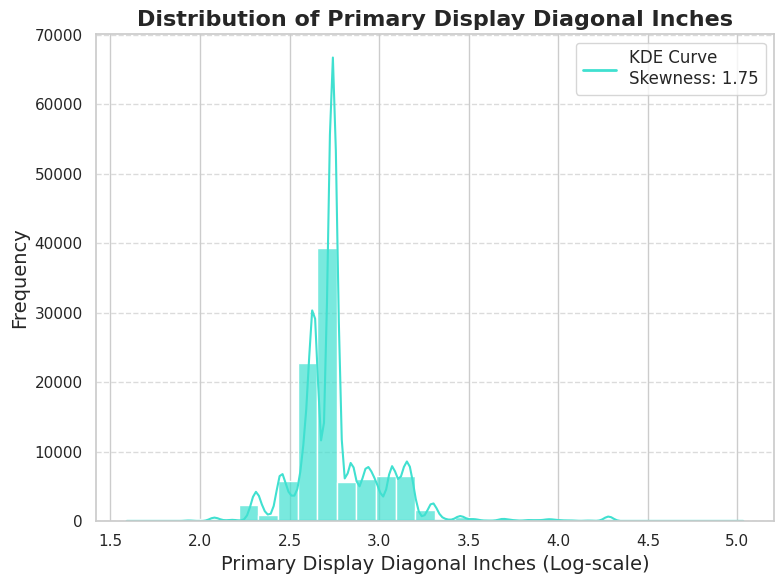

In [104]:
skew_value = skew(log['PrimaryDisplayDiagonalInches'].dropna())

plt.figure(figsize=(8, 6))
sns.histplot(
    log['PrimaryDisplayDiagonalInches'],
    kde=True,
    color='turquoise',  
    bins=30,  
    alpha=0.7  
)

kde_line = sns.kdeplot(
    log['PrimaryDisplayDiagonalInches'],
    color='turquoise',
    linewidth=2,
    label=f'KDE Curve\nSkewness: {skew_value:.2f}'
)

plt.title("Distribution of Primary Display Diagonal Inches", fontsize=16, fontweight='bold')
plt.xlabel("Primary Display Diagonal Inches (Log-scale)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12, loc='upper right')
plt.tight_layout()

plt.show()

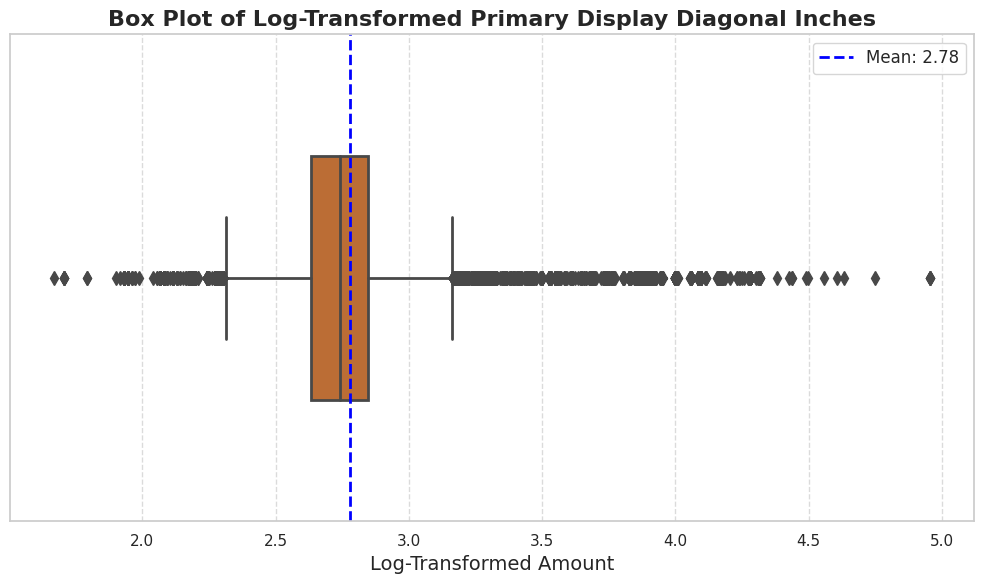

In [105]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x=log['PrimaryDisplayDiagonalInches'],
    color='chocolate',
    width=0.5,  
    linewidth=2,  
    fliersize=7 
)

mean_value = np.mean(log['PrimaryDisplayDiagonalInches'])
plt.axvline(mean_value, color='blue', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')

plt.title("Box Plot of Log-Transformed Primary Display Diagonal Inches", fontsize=16, fontweight='bold')
plt.xlabel("Log-Transformed Amount", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(fontsize=12, loc='upper right')
plt.tight_layout()

In [106]:
df['PrimaryDisplayResolutionHorizontal'].describe()

count    99928.000000
mean      1552.230416
std        363.438980
min        400.000000
25%       1366.000000
50%       1366.000000
75%       1920.000000
max       7680.000000
Name: PrimaryDisplayResolutionHorizontal, dtype: float64

In [107]:
def apply_log(x):
    return np.log(x)
log = pd.DataFrame(df['PrimaryDisplayResolutionHorizontal'].apply(apply_log))
log

PrimaryDisplayResolutionHorizontal
0                                6.684612
1                                7.377759
2                                7.560080
3                                7.219642
4                                7.377759
...                                   ...
99995                            7.560080
99996                            7.219642
99997                            7.219642
99998                            8.006368
99999                            7.219642

[100000 rows x 1 columns]

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


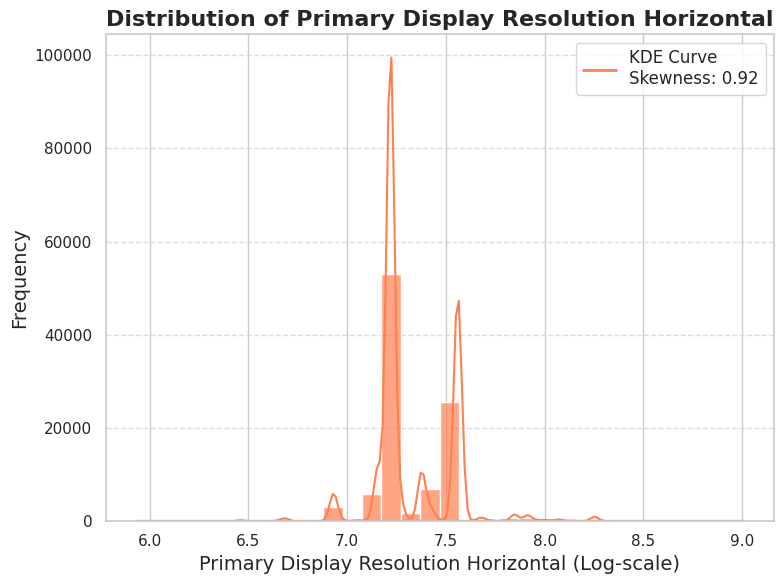

In [108]:
skew_value = skew(log['PrimaryDisplayResolutionHorizontal'].dropna())

plt.figure(figsize=(8, 6))
sns.histplot(
    log['PrimaryDisplayResolutionHorizontal'],
    kde=True,
    color='coral',  
    bins=30,  
    alpha=0.7  
)

kde_line = sns.kdeplot(
    log['PrimaryDisplayResolutionHorizontal'],
    color='coral',
    linewidth=2,
    label=f'KDE Curve\nSkewness: {skew_value:.2f}'
)

plt.title("Distribution of Primary Display Resolution Horizontal", fontsize=16, fontweight='bold')
plt.xlabel("Primary Display Resolution Horizontal (Log-scale)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12, loc='upper right')
plt.tight_layout()

plt.show()

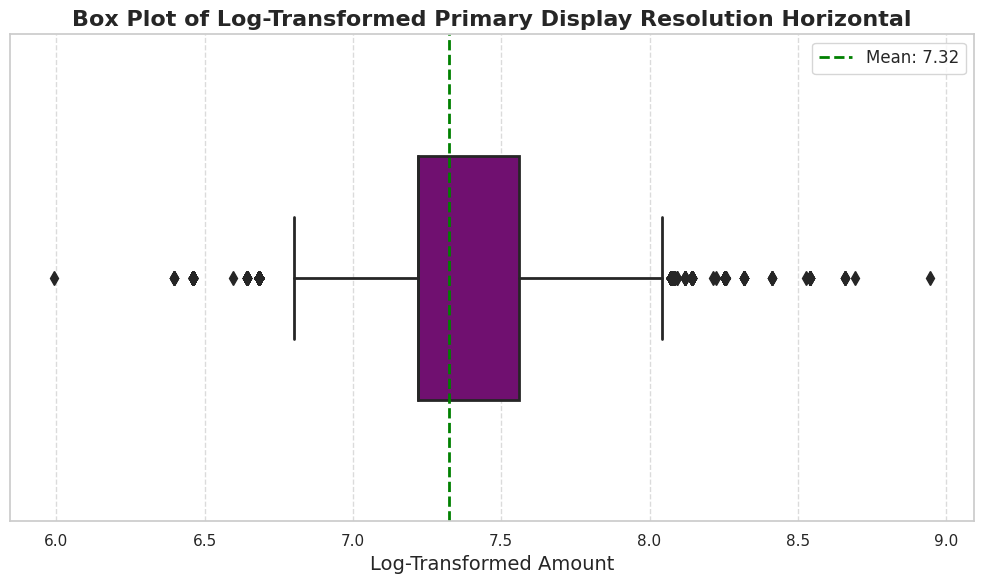

In [109]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x=log['PrimaryDisplayResolutionHorizontal'],
    color='purple',
    width=0.5,  
    linewidth=2,  
    fliersize=7 
)

mean_value = np.mean(log['PrimaryDisplayResolutionHorizontal'])
plt.axvline(mean_value, color='green', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')

plt.title("Box Plot of Log-Transformed Primary Display Resolution Horizontal", fontsize=16, fontweight='bold')
plt.xlabel("Log-Transformed Amount", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(fontsize=12, loc='upper right')
plt.tight_layout()

In [110]:
df['PrimaryDisplayResolutionVertical'].describe()

count    99928.000000
mean       898.253192
std        213.695880
min        300.000000
25%        768.000000
50%        768.000000
75%       1080.000000
max       3840.000000
Name: PrimaryDisplayResolutionVertical, dtype: float64

In [111]:
def apply_log(x):
    return np.log(x)
log = pd.DataFrame(df['PrimaryDisplayResolutionVertical'].apply(apply_log))
log

PrimaryDisplayResolutionVertical
0                              7.154615
1                              6.802395
2                              6.984716
3                              6.643790
4                              6.802395
...                                 ...
99995                          6.984716
99996                          6.643790
99997                          6.643790
99998                          7.600902
99999                          6.643790

[100000 rows x 1 columns]

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


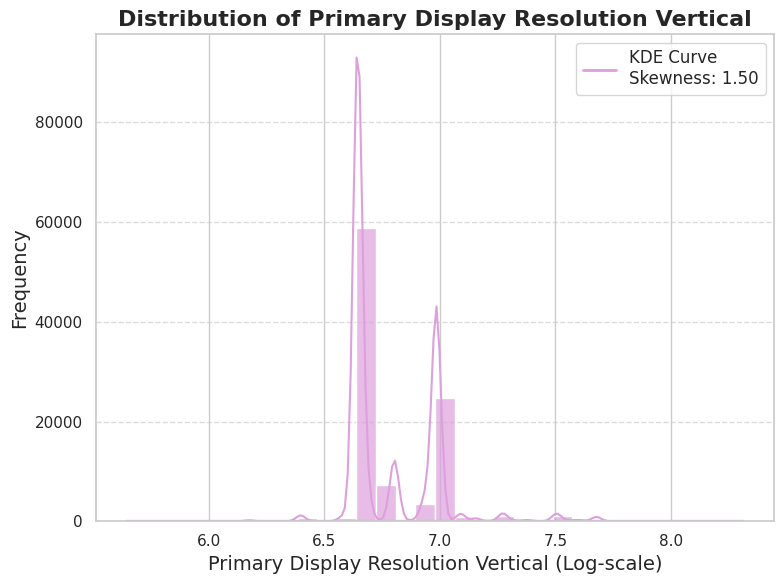

In [112]:
skew_value = skew(log['PrimaryDisplayResolutionVertical'].dropna())

plt.figure(figsize=(8, 6))
sns.histplot(
    log['PrimaryDisplayResolutionVertical'],
    kde=True,
    color='plum',  
    bins=30,  
    alpha=0.7  
)

kde_line = sns.kdeplot(
    log['PrimaryDisplayResolutionVertical'],
    color='plum',
    linewidth=2,
    label=f'KDE Curve\nSkewness: {skew_value:.2f}'
)

plt.title("Distribution of Primary Display Resolution Vertical", fontsize=16, fontweight='bold')
plt.xlabel("Primary Display Resolution Vertical (Log-scale)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend(fontsize=12, loc='upper right')
plt.tight_layout()

plt.show()

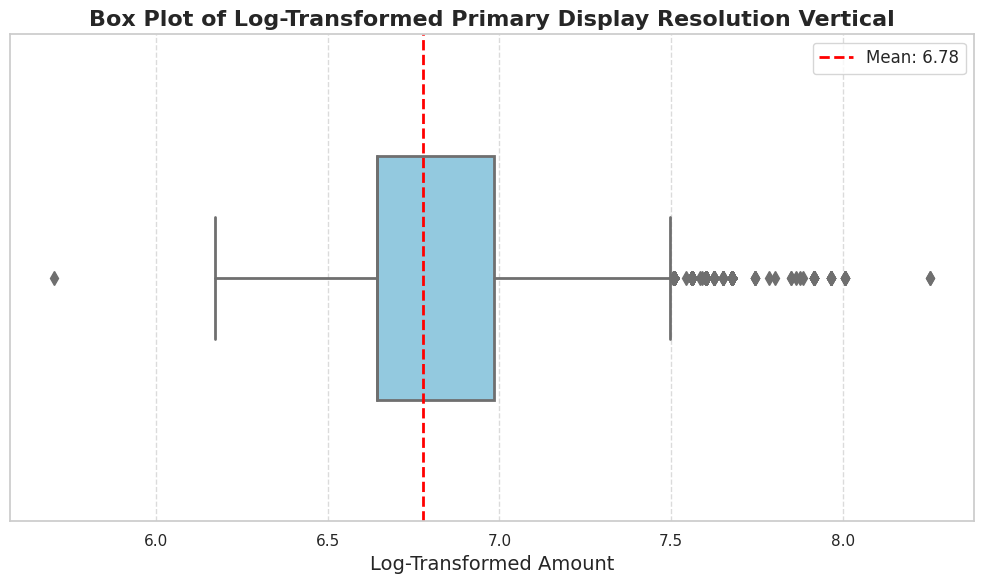

In [113]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x=log['PrimaryDisplayResolutionVertical'],
    color='skyblue',
    width=0.5,  
    linewidth=2,  
    fliersize=7 
)

mean_value = np.mean(log['PrimaryDisplayResolutionVertical'])
plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')

plt.title("Box Plot of Log-Transformed Primary Display Resolution Vertical", fontsize=16, fontweight='bold')
plt.xlabel("Log-Transformed Amount", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(fontsize=12, loc='upper right')
plt.tight_layout()

# Feature Engineering

## Version IDs

In [114]:
df[['AppVersion_X', 'AppVersion_Y', 'AppVersion_Z', 'AppVersion_W']] = df['AppVersion'].str.split('.', expand=True).astype(float)

In [115]:
df['AppVersion_X'].nunique()

1

So we drop `AppVersion_X`

In [116]:
df['AppVersion_Y'].nunique()

14

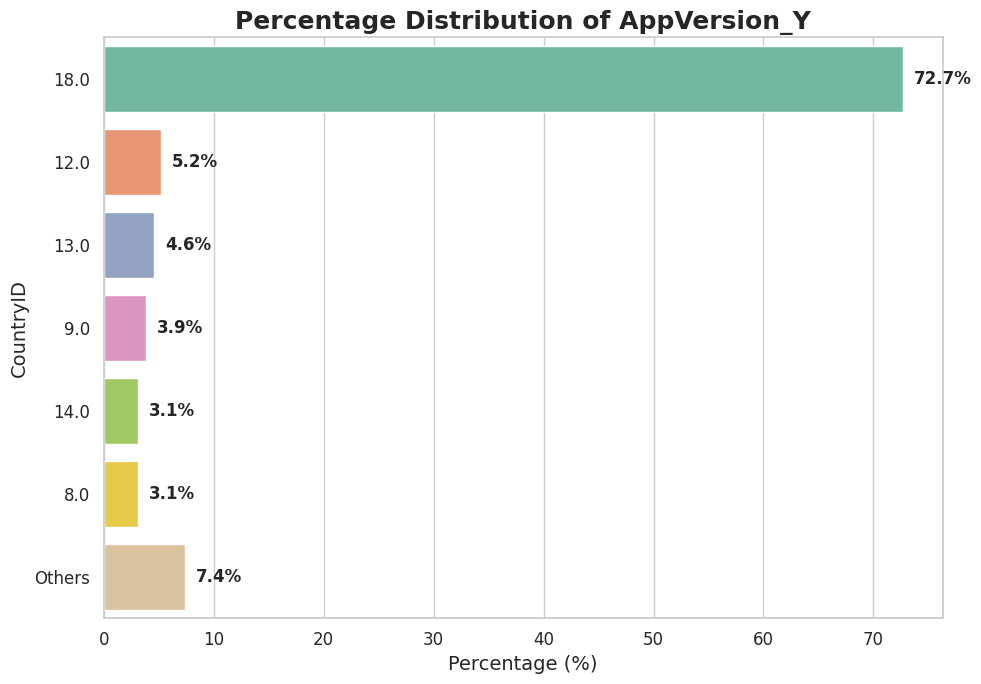

In [117]:
AppVersion_Y = df['AppVersion_Y'].value_counts(normalize=True) * 100

top_6 = AppVersion_Y.head(6)
others = AppVersion_Y.iloc[6:].sum()

AppVersion_Y = pd.concat([top_6, pd.Series({'Others': others})])

palette = sns.color_palette("Set2", len(AppVersion_Y))

plt.figure(figsize=(10, 7))
sns.barplot(x=AppVersion_Y.values, y=AppVersion_Y.index, palette=palette, orient='h')

plt.title('Percentage Distribution of AppVersion_Y', fontsize=18, fontweight='bold')
plt.xlabel('Percentage (%)', fontsize=14)
plt.ylabel('CountryID', fontsize=14)

for index, value in enumerate(AppVersion_Y.values):
    plt.text(value + 1, index, f'{value:.1f}%', va='center', fontsize=12, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

plt.show()

In [118]:
df['AppVersion_Z'].nunique()

22

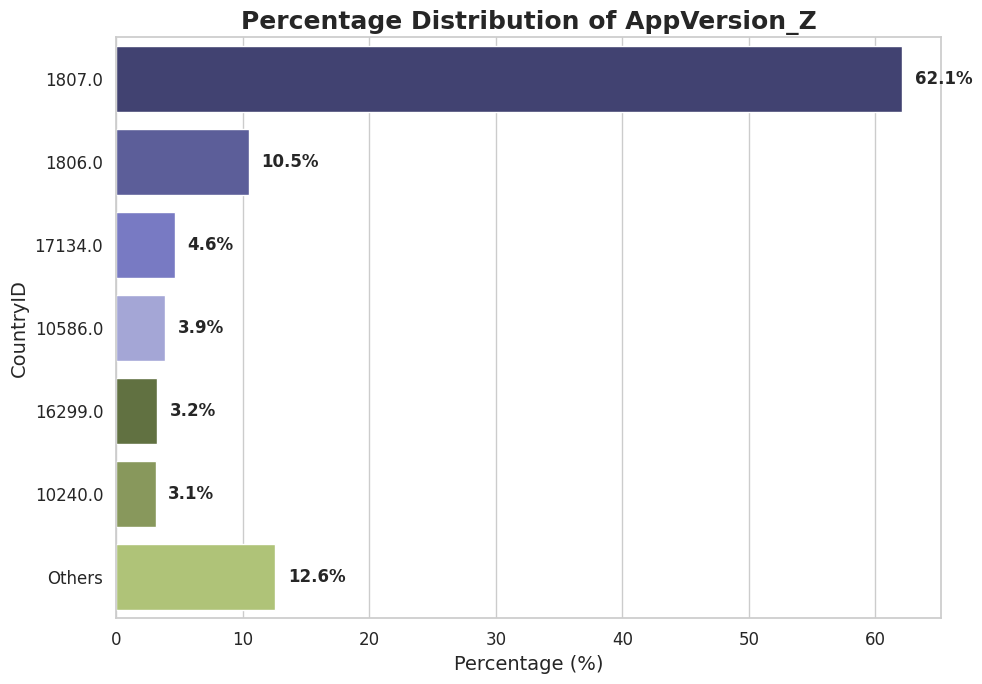

In [119]:
AppVersion_Z = df['AppVersion_Z'].value_counts(normalize=True) * 100

top_6 = AppVersion_Z.head(6)
others = AppVersion_Z.iloc[6:].sum()

AppVersion_Z = pd.concat([top_6, pd.Series({'Others': others})])

palette = sns.color_palette("tab20b", len(AppVersion_Z))

plt.figure(figsize=(10, 7))
sns.barplot(x=AppVersion_Z.values, y=AppVersion_Z.index, palette=palette, orient='h')

plt.title('Percentage Distribution of AppVersion_Z', fontsize=18, fontweight='bold')
plt.xlabel('Percentage (%)', fontsize=14)
plt.ylabel('CountryID', fontsize=14)

for index, value in enumerate(AppVersion_Z.values):
    plt.text(value + 1, index, f'{value:.1f}%', va='center', fontsize=12, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

plt.show()

In [120]:
df['AppVersion_W'].nunique()

57

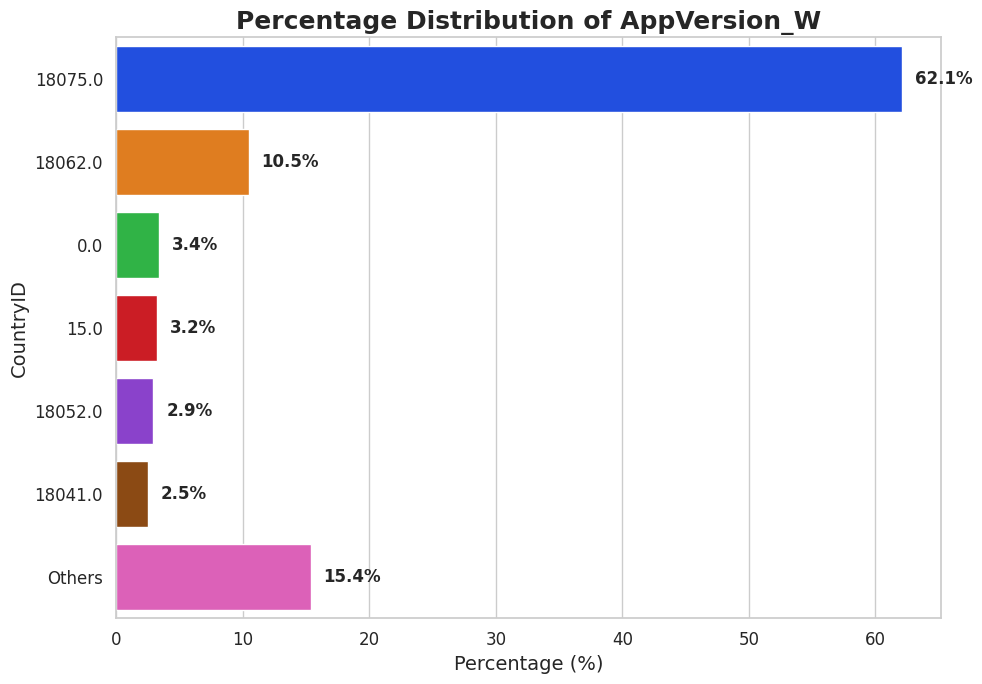

In [121]:
AppVersion_W = df['AppVersion_W'].value_counts(normalize=True) * 100

top_6 = AppVersion_W.head(6)
others = AppVersion_W.iloc[6:].sum()

AppVersion_W = pd.concat([top_6, pd.Series({'Others': others})])

palette = sns.color_palette("bright", len(AppVersion_W))

plt.figure(figsize=(10, 7))
sns.barplot(x=AppVersion_W.values, y=AppVersion_W.index, palette=palette, orient='h')

plt.title('Percentage Distribution of AppVersion_W', fontsize=18, fontweight='bold')
plt.xlabel('Percentage (%)', fontsize=14)
plt.ylabel('CountryID', fontsize=14)

for index, value in enumerate(AppVersion_W.values):
    plt.text(value + 1, index, f'{value:.1f}%', va='center', fontsize=12, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

plt.show()

In [122]:
df[['EngineVersion_X', 'EngineVersion_Y', 'EngineVersion_Z', 'EngineVersion_W']] = df['EngineVersion'].str.split('.', expand=True).astype(float)

In [123]:
df['EngineVersion_X'].nunique()

1

In [124]:
df['EngineVersion_Y'].nunique()

1

We drop both of these

In [125]:
df['EngineVersion_Z'].nunique()

30

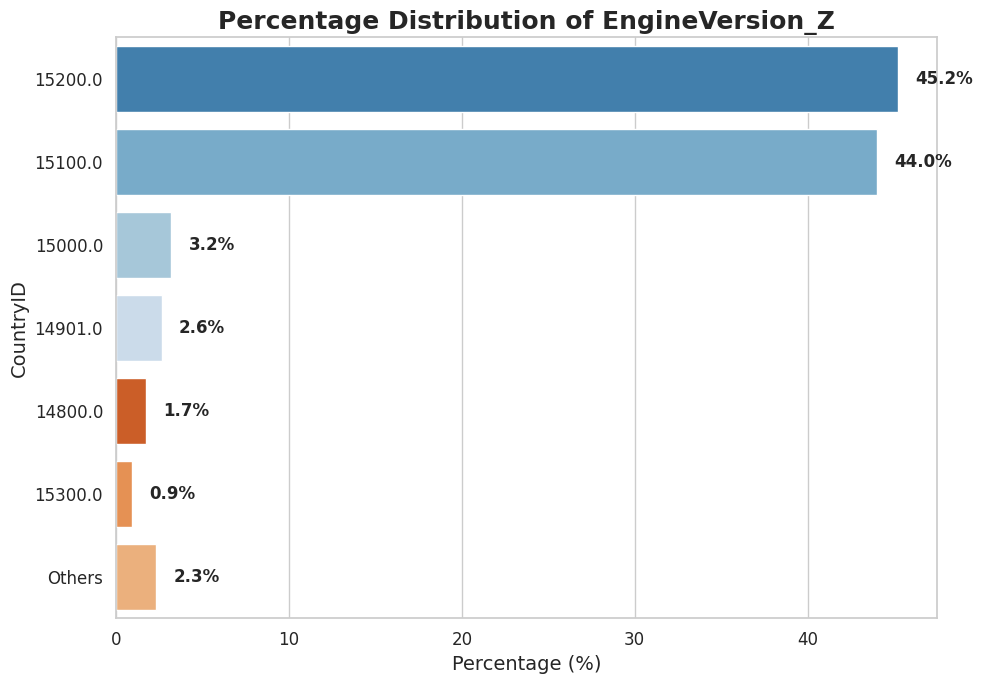

In [126]:
EngineVersion_Z = df['EngineVersion_Z'].value_counts(normalize=True) * 100

top_6 = EngineVersion_Z.head(6)
others = EngineVersion_Z.iloc[6:].sum()

EngineVersion_Z = pd.concat([top_6, pd.Series({'Others': others})])

palette = sns.color_palette("tab20c", len(EngineVersion_Z))

plt.figure(figsize=(10, 7))
sns.barplot(x=EngineVersion_Z.values, y=EngineVersion_Z.index, palette=palette, orient='h')

plt.title('Percentage Distribution of EngineVersion_Z', fontsize=18, fontweight='bold')
plt.xlabel('Percentage (%)', fontsize=14)
plt.ylabel('CountryID', fontsize=14)

for index, value in enumerate(EngineVersion_Z.values):
    plt.text(value + 1, index, f'{value:.1f}%', va='center', fontsize=12, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

plt.show()

In [127]:
df['EngineVersion_W'].nunique()

7

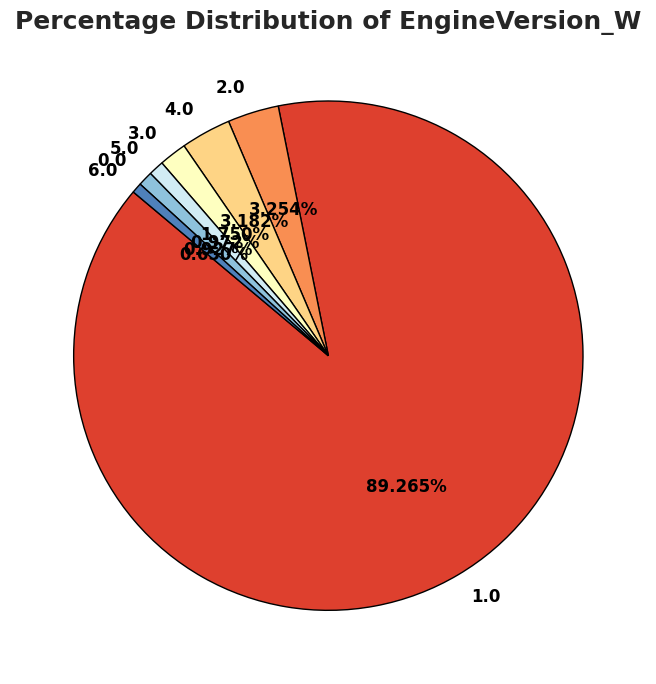

In [128]:
EngineVersion_W = df['EngineVersion_W'].value_counts(normalize=True) * 100

palette = sns.color_palette("RdYlBu", len(EngineVersion_W))

plt.figure(figsize=(10, 7))
wedges, texts, autotexts = plt.pie(
    EngineVersion_W.values, 
    labels=EngineVersion_W.index, 
    autopct=lambda p: f'{p:.3f}%' if p > 0 else '',  
    colors=palette, 
    startangle=140, 
    wedgeprops={'edgecolor': 'black'},  
    textprops={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'}
)

plt.title('Percentage Distribution of EngineVersion_W', fontsize=18, fontweight='bold')

plt.tight_layout()
plt.show()

In [129]:
df[['SignatureVersion_X', 'SignatureVersion_Y', 'SignatureVersion_Z', 'SignatureVersion_W']] = df['SignatureVersion'].str.split('.', expand=True).astype(float)

In [130]:
df['SignatureVersion_X'].nunique()

1

In [131]:
df['SignatureVersion_W'].nunique()

1

We drop both of these

In [132]:
df['SignatureVersion_Y'].nunique()

28

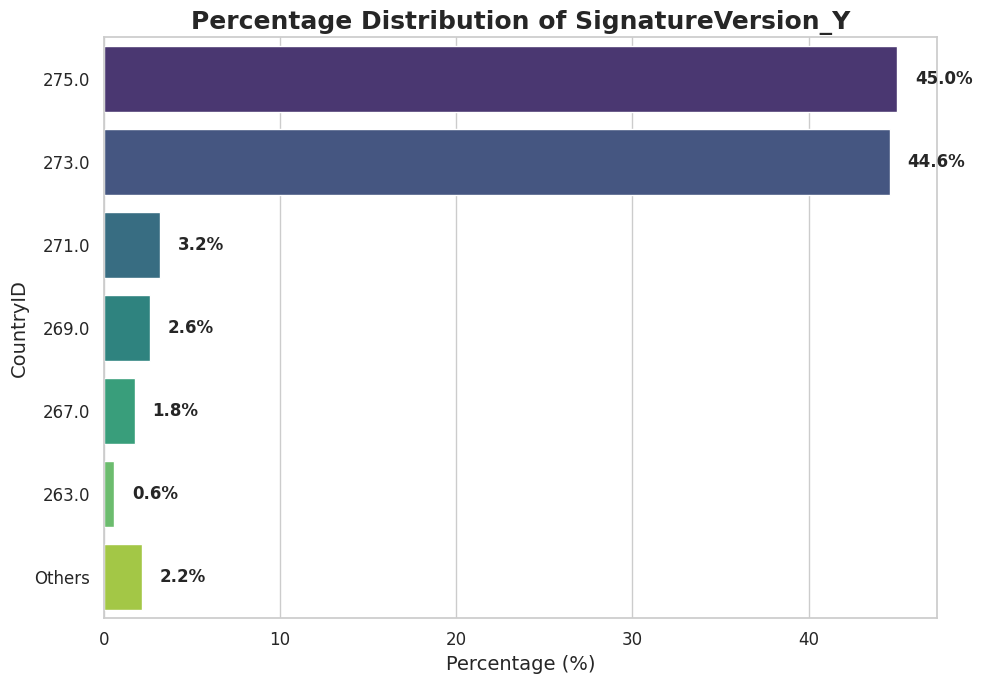

In [133]:
SignatureVersion_Y = df['SignatureVersion_Y'].value_counts(normalize=True) * 100

top_6 = SignatureVersion_Y.head(6)
others = SignatureVersion_Y.iloc[6:].sum()

SignatureVersion_Y = pd.concat([top_6, pd.Series({'Others': others})])

palette = sns.color_palette("viridis", len(SignatureVersion_Y))

plt.figure(figsize=(10, 7))
sns.barplot(x=SignatureVersion_Y.values, y=SignatureVersion_Y.index, palette=palette, orient='h')

plt.title('Percentage Distribution of SignatureVersion_Y', fontsize=18, fontweight='bold')
plt.xlabel('Percentage (%)', fontsize=14)
plt.ylabel('CountryID', fontsize=14)

for index, value in enumerate(SignatureVersion_Y.values):
    plt.text(value + 1, index, f'{value:.1f}%', va='center', fontsize=12, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

plt.show()

In [134]:
print("Number of unique values in the SignatureVersion_Z column is :",df['SignatureVersion_Z'].nunique())
print("Percentage of unique values in the SignatureVersion_Z Only column is :",df['SignatureVersion_Z'].nunique()/df.shape[0]*100)

Number of unique values in the SignatureVersion_Z column is : 1531
Percentage of unique values in the SignatureVersion_Z Only column is : 1.5310000000000001


We drop this column to avoid overfitting

## Date Columns

In [135]:
df['DateAS'] = pd.to_datetime(df['DateAS'])

In [136]:
df['DateAS_month'] = df['DateAS'].dt.month
df['DateAS_year'] = df['DateAS'].dt.year
df['DateAS_weekday'] = df['DateAS'].dt.weekday
df['DateAS_hour'] = df['DateAS'].dt.hour

Now we can drop the original column of `DateAS`

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


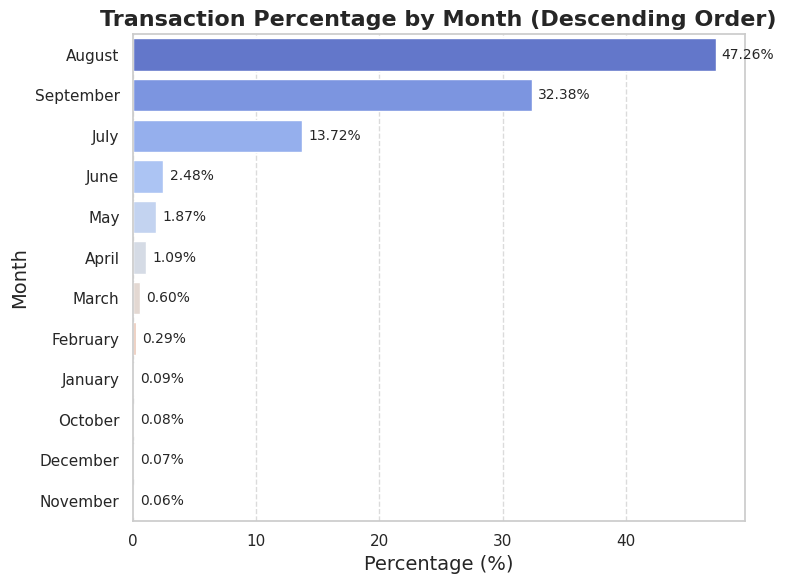

In [137]:
month_mapping = {
    1: "January", 2: "February", 3: "March", 4: "April",
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"
}

month_counts = df['DateAS_month'].value_counts(normalize=True) * 100  
month_counts = month_counts.sort_values(ascending=False)

plt.figure(figsize=(8, 6))
colors = sns.color_palette("coolwarm", len(month_counts))

sns.barplot(
    x=month_counts.values,
    y=[month_mapping[m] for m in month_counts.index],  
    palette=colors,
    orient="h"
)

for index, value in enumerate(month_counts.values):
    plt.text(value + 0.5, index, f'{value:.2f}%', va='center', ha='left', fontsize=10)  

plt.title("Transaction Percentage by Month (Descending Order)", fontsize=16, fontweight='bold')
plt.xlabel("Percentage (%)", fontsize=14)
plt.ylabel("Month", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [138]:
df['DateAS_year'] .unique()

array([2018, 2017, 2016], dtype=int32)

In [139]:
category_percentages = pd.DataFrame(df['DateAS_year'].value_counts()/df.shape[0]*100)
category_percentages = category_percentages.reset_index()
category_percentages

DateAS_year   count
0         2018  99.027
1         2017   0.893
2         2016   0.080

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


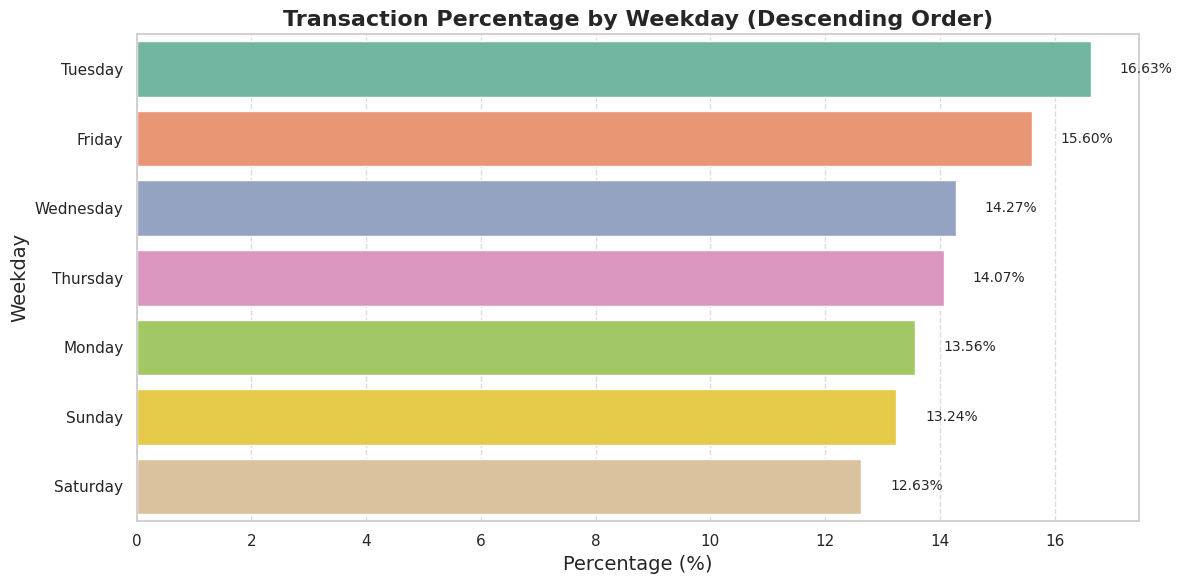

In [140]:
weekday_mapping = {
    0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday",
    4: "Friday", 5: "Saturday", 6: "Sunday"
}

weekday_counts = df['DateAS_weekday'].value_counts(normalize=True) * 100  # Convert to percentage
weekday_counts = weekday_counts.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
colors = sns.color_palette("Set2", len(weekday_counts))  

sns.barplot(
    x=weekday_counts.values,
    y=[weekday_mapping[w] for w in weekday_counts.index],  
    palette=colors,
    orient="h"
)

for index, value in enumerate(weekday_counts.values):
    plt.text(value + 0.5, index, f'{value:.2f}%', va='center', ha='left', fontsize=10)  

plt.title("Transaction Percentage by Weekday (Descending Order)", fontsize=16, fontweight='bold')
plt.xlabel("Percentage (%)", fontsize=14)
plt.ylabel("Weekday", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


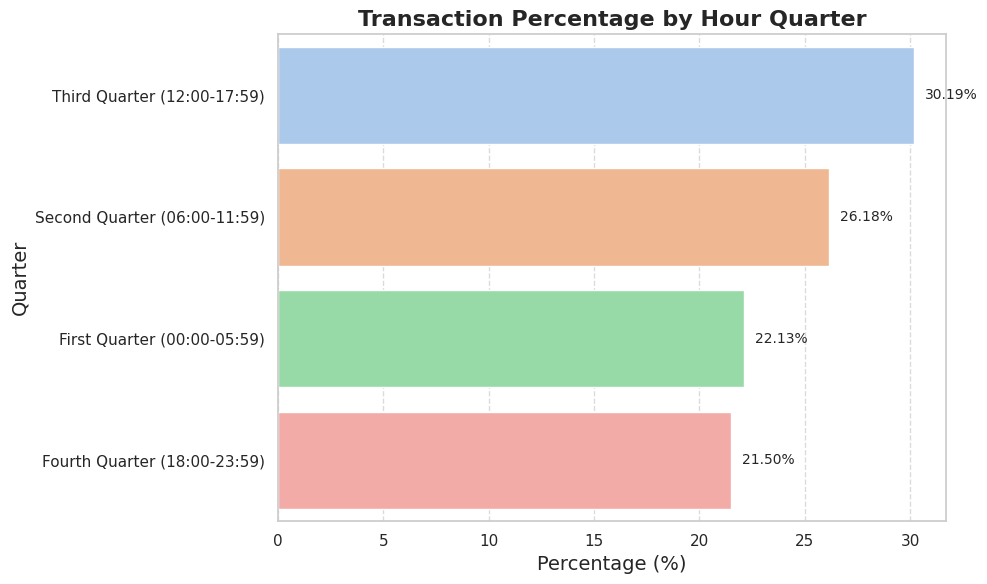

In [141]:
df['DateAS_hour'] = df['DateAS_hour'].apply(
    lambda x: (
        'First Quarter (00:00-05:59)' if x < 6 else
        'Second Quarter (06:00-11:59)' if x < 12 else
        'Third Quarter (12:00-17:59)' if x < 18 else
        'Fourth Quarter (18:00-23:59)'
    )
)

quarter_counts = df['DateAS_hour'].value_counts(normalize=True) * 100  

plt.figure(figsize=(10, 6))
colors = sns.color_palette("pastel", len(quarter_counts))  
sns.barplot(
    x=quarter_counts.values,
    y=quarter_counts.index,
    palette=colors,
    orient="h" 
)

for index, value in enumerate(quarter_counts.values):
    plt.text(value + 0.5, index, f'{value:.2f}%', va='center', ha='left', fontsize=10) 

plt.title("Transaction Percentage by Hour Quarter", fontsize=16, fontweight='bold')
plt.xlabel("Percentage (%)", fontsize=14)
plt.ylabel("Quarter", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


In [142]:
df['DateOS'] = pd.to_datetime(df['DateOS'])

In [143]:
df['DateOS_month'] = df['DateOS'].dt.month
df['DateOS_year'] = df['DateOS'].dt.year
df['DateOS_weekday'] = df['DateOS'].dt.weekday
df['DateOS_hour'] = df['DateOS'].dt.hour

Now we can drop the original column `DateOS`

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


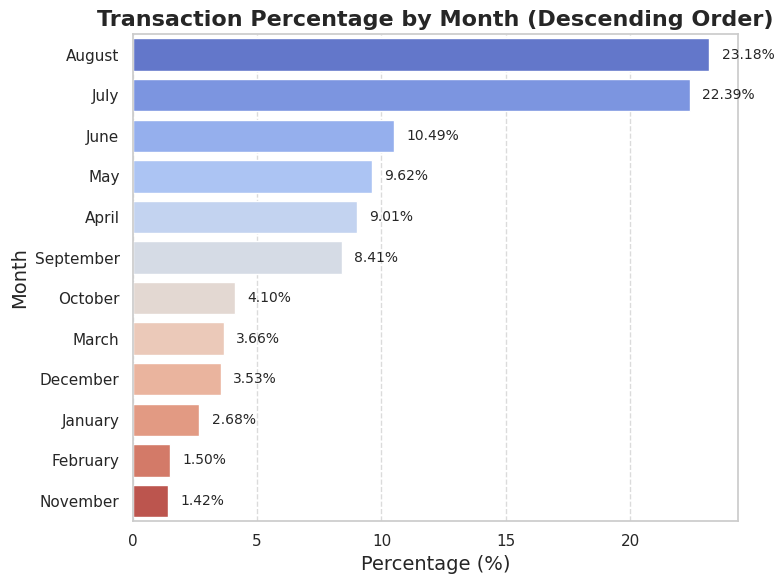

In [144]:
month_mapping = {
    1: "January", 2: "February", 3: "March", 4: "April",
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"
}

month_counts = df['DateOS_month'].value_counts(normalize=True) * 100  
month_counts = month_counts.sort_values(ascending=False)

plt.figure(figsize=(8, 6))
colors = sns.color_palette("coolwarm", len(month_counts))

sns.barplot(
    x=month_counts.values,
    y=[month_mapping[m] for m in month_counts.index],  
    palette=colors,
    orient="h"
)

for index, value in enumerate(month_counts.values):
    plt.text(value + 0.5, index, f'{value:.2f}%', va='center', ha='left', fontsize=10)  

plt.title("Transaction Percentage by Month (Descending Order)", fontsize=16, fontweight='bold')
plt.xlabel("Percentage (%)", fontsize=14)
plt.ylabel("Month", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [145]:
df['DateOS_year'] .unique()

array([2018., 2016., 2017., 2015.,   nan])

In [146]:
category_percentages = pd.DataFrame(df['DateOS_year'].value_counts()/df.shape[0]*100)
category_percentages = category_percentages.reset_index()
category_percentages

DateOS_year   count
0       2018.0  81.356
1       2017.0  15.219
2       2016.0   2.771
3       2015.0   0.630

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


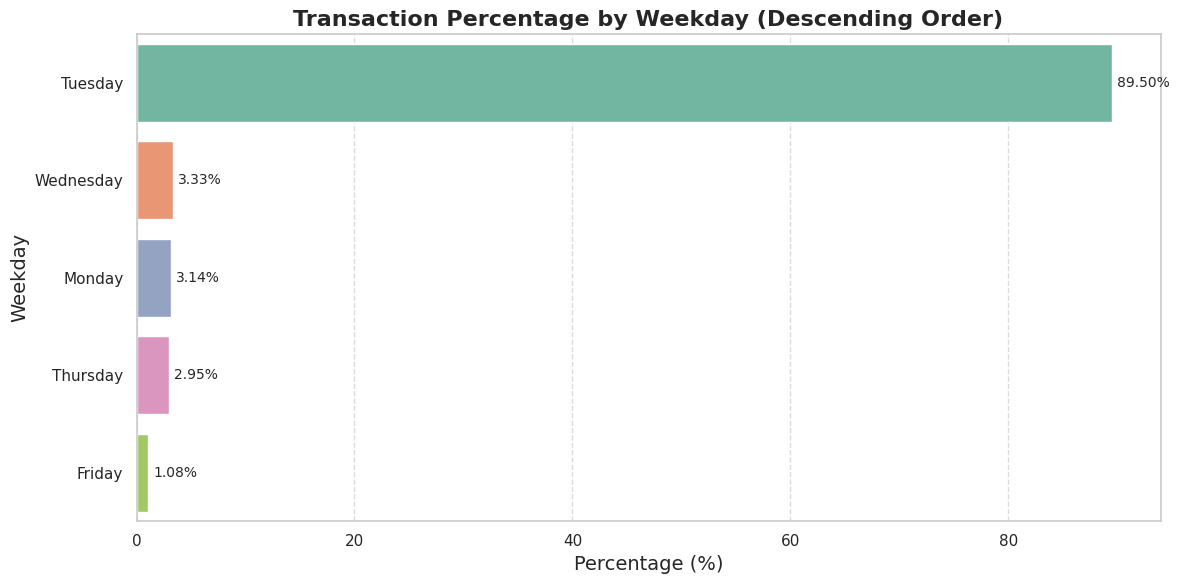

In [147]:
weekday_mapping = {
    0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday",
    4: "Friday", 5: "Saturday", 6: "Sunday"
}

weekday_counts = df['DateOS_weekday'].value_counts(normalize=True) * 100  # Convert to percentage
weekday_counts = weekday_counts.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
colors = sns.color_palette("Set2", len(weekday_counts))  

sns.barplot(
    x=weekday_counts.values,
    y=[weekday_mapping[w] for w in weekday_counts.index],  
    palette=colors,
    orient="h"
)

for index, value in enumerate(weekday_counts.values):
    plt.text(value + 0.5, index, f'{value:.2f}%', va='center', ha='left', fontsize=10)  

plt.title("Transaction Percentage by Weekday (Descending Order)", fontsize=16, fontweight='bold')
plt.xlabel("Percentage (%)", fontsize=14)
plt.ylabel("Weekday", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


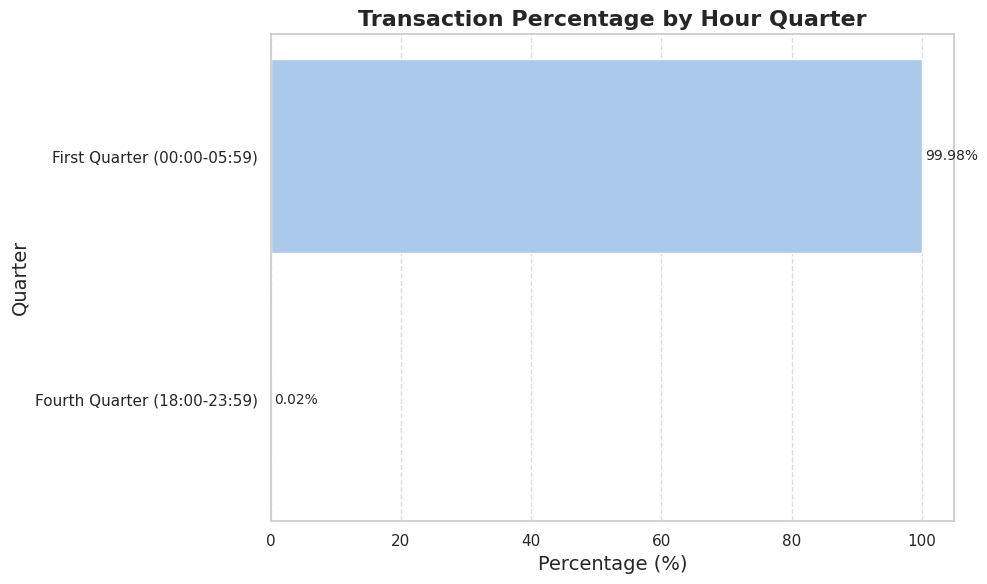

In [148]:
df['DateOS_hour'] = df['DateOS_hour'].apply(
    lambda x: (
        'First Quarter (00:00-05:59)' if x < 6 else
        'Second Quarter (06:00-11:59)' if x < 12 else
        'Third Quarter (12:00-17:59)' if x < 18 else
        'Fourth Quarter (18:00-23:59)'
    )
)

quarter_counts = df['DateOS_hour'].value_counts(normalize=True) * 100  

plt.figure(figsize=(10, 6))
colors = sns.color_palette("pastel", len(quarter_counts))  
sns.barplot(
    x=quarter_counts.values,
    y=quarter_counts.index,
    palette=colors,
    orient="h" 
)

for index, value in enumerate(quarter_counts.values):
    plt.text(value + 0.5, index, f'{value:.2f}%', va='center', ha='left', fontsize=10) 

plt.title("Transaction Percentage by Hour Quarter", fontsize=16, fontweight='bold')
plt.xlabel("Percentage (%)", fontsize=14)
plt.ylabel("Quarter", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [149]:
df

MachineID   ProductName EngineVersion  \
0      f541bae429089117c4aac39c90dd3416  win8defender   1.1.15200.1   
1      dc2b14d9ce3a0ce4050bb640190f2ca5  win8defender   1.1.15100.1   
2      fd20c5f010e9c5f91ad1c6b3e0da68a0  win8defender   1.1.15200.1   
3      38711eae85eb77a72ec5dfdf27eb2a76  win8defender   1.1.15200.1   
4      32607c9a543a9214e2c7e45800ed4849  win8defender   1.1.15200.1   
...                                 ...           ...           ...   
99995  a378b2196a7a1d8ee0d4f989ee46730e  win8defender   1.1.15200.1   
99996  7f4433ca05d24b9bbdd3932f8b05e61f  win8defender   1.1.15100.1   
99997  d6852dfff534e03d5ddfd3c7875ab072  win8defender   1.1.15200.1   
99998  70a8dc682128c9ff78a3de5aea9dac74  win8defender   1.1.14901.4   
99999  ad9c385b53f2ca788933a39603b84eda  win8defender   1.1.15000.2   

             AppVersion SignatureVersion  IsBetaUser  RealTimeProtectionState  \
0       4.18.1807.18075     1.275.1003.0           0                      7.0   
1       4.18.1807.18075     1.273.1465.0           0                      7.0   
2       4.18.1807.18075     1.275.1546.0           0                      7.0   
3      4.12.17007.18011     1.275.1141.0           0                      7.0   
4        4.13.17134.228     1.275.1283.0           0                      7.0   
...                 ...              ...         ...                      ...   
99995   4.18.1807.18075     1.275.1582.0           0                      7.0   
99996   4.18.1806.18062     1.273.1156.0           0                      7.0   
99997   4.18.1807.18075      1.275.209.0           0                      7.0   
99998  4.16.17656.18052      1.269.641.0           0                      7.0   
99999   4.18.1806.18062     1.271.1003.0           0                      7.0   

       IsPassiveModeEnabled  AntivirusConfigID  NumAntivirusProductsInstalled  \
0                         0            53447.0                            1.0   
1                         0            53447.0                            1.0   
2                         0            53447.0                            1.0   
3                         0            46413.0                            2.0   
4                         0            40466.0                            2.0   
...                     ...                ...                            ...   
99995                     0            68585.0                            2.0   
99996                     0            11280.0                            2.0   
99997                     0            53447.0                            1.0   
99998                     0            53447.0                            1.0   
99999                     0             7945.0                            2.0   

       ...  SignatureVersion_Z  SignatureVersion_W  DateAS_month  DateAS_year  \
0      ...              1003.0                 0.0             9         2018   
1      ...              1465.0                 0.0             8         2018   
2      ...              1546.0                 0.0             9         2018   
3      ...              1141.0                 0.0             9         2018   
4      ...              1283.0                 0.0             9         2018   
...    ...                 ...                 ...           ...          ...   
99995  ...              1582.0                 0.0             9         2018   
99996  ...              1156.0                 0.0             8         2018   
99997  ...               209.0                 0.0             8         2018   
99998  ...               641.0                 0.0             6         2018   
99999  ...              1003.0                 0.0             7         2018   

       DateAS_weekday                   DateAS_hour DateOS_month DateOS_year  \
0                   0  Second Quarter (06:00-11:59)          4.0      2018.0   
1                   3   First Quarter (00:00-05:59)          8.0      2018.0   
2                 

# Pre-Processing

## Handling Outliers

In [150]:
z_scores = np.abs(stats.zscore(numerical_features))
df_z = df[(z_scores < 3).all(axis=1)]

In [151]:
Q1 = numerical_features.quantile(0.25)
Q3 = numerical_features.quantile(0.75)
IQR = Q3 - Q1

df_iqr = df[~((numerical_features < (Q1 - 1.5 * IQR)) | (numerical_features > (Q3 + 1.5 * IQR))).any(axis=1)]

## Dropping Columns
As discussed and reasoned above we drop the columns which do not contribute much to get the target or has been pre-processed.

In [152]:
df.drop(columns=['MachineID', 'SignatureVersion', 'CityID', 'IsBetaUser', 
                 'AutoSampleSubmissionEnabled', 'IsFlightsDisabled', 'OEMModelID',
                 'ProcessorModelID', 'InternalBatteryNumberOfCharges',
                 'NumericOSVersion', 'OSBuildRevisionOnly', 'FirmwareVersionID', 'DateAS', 'DateOS',
                 'SignatureVersion_X', 'SignatureVersion_Z', 'SignatureVersion_W', 'AppVersion',
                 'EngineVersion', 'EngineVersion_X', 'EngineVersion_Y', 'AppVersion_X'], inplace=True)
df

ProductName  RealTimeProtectionState  IsPassiveModeEnabled  \
0      win8defender                      7.0                     0   
1      win8defender                      7.0                     0   
2      win8defender                      7.0                     0   
3      win8defender                      7.0                     0   
4      win8defender                      7.0                     0   
...             ...                      ...                   ...   
99995  win8defender                      7.0                     0   
99996  win8defender                      7.0                     0   
99997  win8defender                      7.0                     0   
99998  win8defender                      7.0                     0   
99999  win8defender                      7.0                     0   

       AntivirusConfigID  NumAntivirusProductsInstalled  \
0                53447.0                            1.0   
1                53447.0                            1.0   
2                53447.0                            1.0   
3                46413.0                            2.0   
4                40466.0                            2.0   
...                  ...                            ...   
99995            68585.0                            2.0   
99996            11280.0                            2.0   
99997            53447.0                            1.0   
99998            53447.0                            1.0   
99999             7945.0                            2.0   

       NumAntivirusProductsEnabled  HasTpm  CountryID  GeoRegionID  \
0                              1.0       1         51         98.0   
1                              1.0       1        141        167.0   
2                              1.0       1         51         98.0   
3                              1.0       1         68        276.0   
4                              1.0       1         43         53.0   
...                            ...     ...        ...          ...   
99995                          1.0       1         43         53.0   
99996                          1.0       1        137        160.0   
99997                          1.0       1        142        157.0   
99998                          1.0       1        139        158.0   
99999                          1.0       1        100        224.0   

       LocaleEnglishNameID  ... EngineVersion_W SignatureVersion_Y  \
0                      103  ...             1.0              275.0   
1                      227  ...             1.0              273.0   
2                      103  ...             1.0              275.0   
3                       74  ...             1.0              275.0   
4                       42  ...             1.0              275.0   
...                    ...  ...             ...                ...   
99995                   42  ...             1.0              275.0   
99996                   74  ...             1.0              273.0   
99997                   68  ...             1.0              275.0   
99998                   74  ...             4.0              269.0   
99999                   75  ...             2.0              271.0   

      DateAS_month  DateAS_year  DateAS_weekday                   DateAS_hour  \
0                9         2018               0  Second Quarter (06:00-11:59)   
1                8         2018               3   First Quarter (00:00-05:59)   
2                9         2018               3  Fourth Quarter (18:00-23:59)   
3                9         2018               4   First Quarter (00:00-05:59)   
4                9         2018               5  Fourth Quarter (18:00-23:59)   
...            ...          ...             ...                           ...   
99995            9         2018               4   First Quarter (00:00-05:59)   
99996            8         2018               4  Second Quarter (06:00-11:59)   
99997            8         2018               6

## Train-Test Split

In [153]:
X = df.drop(columns=['target'])
y = df['target']
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

## Pipeline

In [154]:
categorical_data = [
    'ProductName', 'RealTimeProtectionState',
    'IsPassiveModeEnabled', 'AntivirusConfigID', 'NumAntivirusProductsInstalled',
    'NumAntivirusProductsEnabled', 'HasTpm', 'CountryID', 'GeoRegionID',
    'LocaleEnglishNameID', 'PlatformType', 'Processor', 'OSVersion',
    'OSBuildNumber', 'OSProductSuite', 'OsPlatformSubRelease', 'OSBuildLab',
    'SKUEditionName', 'IsSystemProtected', 'SMode', 'IEVersionID',
    'FirewallEnabled', 'EnableLUA', 'MDC2FormFactor', 'DeviceFamily',
    'OEMNameID', 'ProcessorCoreCount', 'ProcessorManufacturerID',
    'PrimaryDiskType', 'HasOpticalDiskDrive', 'ChassisType',
    'PowerPlatformRole', 'OSArchitecture', 'OSBranch', 'OSBuildNumberOnly',
    'OSEdition', 'OSSkuFriendlyName', 'OSInstallType', 'OSInstallLanguageID',
    'OSUILocaleID', 'AutoUpdateOptionsName', 'IsPortableOS',
    'OSGenuineState', 'LicenseActivationChannel', 'FlightRing',
    'FirmwareManufacturerID', 'IsSecureBootEnabled', 'IsVirtualDevice',
    'IsTouchEnabled', 'IsPenCapable', 'IsAlwaysOnAlwaysConnectedCapable',
    'IsGamer', 'RegionIdentifier', 'DateAS_month', 'DateAS_year',
    'DateAS_weekday', 'DateAS_hour', 'DateOS_month', 'DateOS_year',
    'DateOS_weekday', 'DateOS_hour', 'SignatureVersion_Y', 'EngineVersion_W',
    'EngineVersion_Z', 'AppVersion_W', 'AppVersion_Y', 'AppVersion_Z'
]

In [155]:
categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy = "most_frequent")),
    ('encoder', OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))  
])
categorical_pipe

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=-1))])

In [156]:
numerical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    ('scaler', MinMaxScaler())
])
numerical_pipe

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', MinMaxScaler())])

In [157]:
preprocessor = ColumnTransformer([
    ('categorical', categorical_pipe, categorical_data),
    ('numerical',numerical_pipe, numerical_data)
])
preprocessor

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 ['ProductName', 'RealTimeProtectionState',
                                  'IsPassiveModeEnabled', 'AntivirusConfigID',
                                  'NumAntivirusProductsInstalled',
                                  'NumAntivirusProductsEnabled', 'HasTpm...
                                  'ProcessorManufacturerID', 'PrimaryDiskType',
                                  'HasOpticalDiskDrive', ...]),
                                ('numerical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', MinMaxScaler())]),
                                 ['PrimaryDiskCapacityMB',
                                  'SystemVolumeCapacityMB',
                                  'TotalPhysicalRAMMB',
                                  'PrimaryDisplayDiagonalInches',
                                  'PrimaryDisplayResolutionHorizontal',
                                  'PrimaryDisplayResolutionVertical'])])

In [158]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 ['ProductName', 'RealTimeProtectionState',
                                  'IsPassiveModeEnabled', 'AntivirusConfigID',
                                  'NumAntivirusProductsInstalled',
                                  'NumAntivirusProductsEnabled', 'HasTpm...
                                  'ProcessorManufacturerID', 'PrimaryDiskType',
                                  'HasOpticalDiskDrive', ...]),
                                ('numerical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', MinMaxScaler())]),
                                 ['PrimaryDiskCapacityMB',
                                  'SystemVolumeCapacityMB',
                                  'TotalPhysicalRAMMB',
                                  'PrimaryDisplayDiagonalInches',
                                  'PrimaryDisplayResolutionHorizontal',
                                  'PrimaryDisplayResolutionVertical'])])

In [159]:
X_train_processed = preprocessor.transform(X_train)
X_val_processed = preprocessor.transform(X_val)

# Feature Selection

In [160]:
print("Original Shape of X train:", X_train_processed.shape)
print("Original Shape of X validation:", X_val_processed.shape)

Original Shape of X train: (80000, 73)
Original Shape of X validation: (20000, 73)


## Variance Thresholding

In [161]:
feature_selector0 = VarianceThreshold(threshold=0.1)

X_train_var = feature_selector0.fit_transform(X_train_processed)
print("New Shape of X train after VarianceThreshold:", X_train_var.shape)

X_val_var = feature_selector0.transform(X_val_processed)
print("New Shape of X test after VarianceThreshold:", X_val_var.shape)

New Shape of X train after VarianceThreshold: (80000, 50)
New Shape of X test after VarianceThreshold: (20000, 50)


## Select K-Best

In [162]:
feature_selector1 = SelectKBest(f_classif,k=70)

X_train_skb_f = feature_selector1.fit_transform(X_train_processed,y_train)
X_val_skb_f = feature_selector1.transform(X_val_processed)

In [163]:
feature_selector2 = SelectKBest(lambda X, y: mutual_info_classif(X, y, random_state=42), k=70)

X_train_skb_m = feature_selector2.fit_transform(X_train_processed,y_train)
X_val_skb_m = feature_selector2.transform(X_val_processed)

# Model Training

In [164]:
X_train_df = X_train_skb_m
X_val_df = X_val_skb_m

In [165]:
accuracy_dict = {}
auc_dict = {}

## Logistic Regression

In [166]:
model1 = LogisticRegression(random_state = 42)
model1.fit(X_train_df,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

Best threshold found: 0.50268


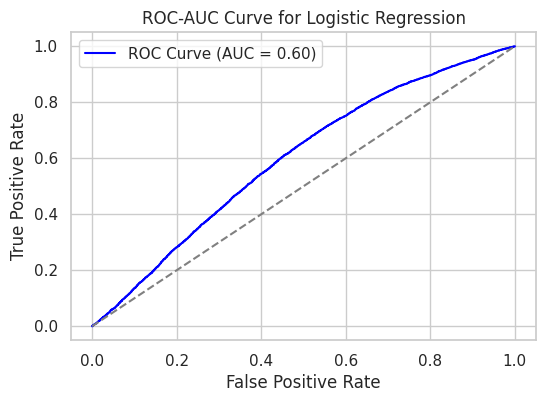

In [167]:
model1_probs = model1.predict_proba(X_val_df)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, model1_probs)
roc_auc1 = auc(fpr, tpr)
auc_dict['Logistic Regression'] = roc_auc1

j_scores = tpr - fpr  # Youden's J statistic
best_threshold = thresholds[np.argmax(j_scores)]

print(f"Best threshold found: {best_threshold:.5f}")

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc1:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for Logistic Regression')
plt.legend()
plt.show()

In [168]:
model1_pred = (model1_probs >= best_threshold).astype(int)

In [169]:
score1 = accuracy_score(y_val,model1_pred)
accuracy_dict['Logistic Regression'] = score1
score1

0.5814

In [170]:
report1 = classification_report(y_val,model1_pred)
print(report1)

              precision    recall  f1-score   support

           0       0.60      0.45      0.51      9895
           1       0.57      0.71      0.63     10105

    accuracy                           0.58     20000
   macro avg       0.59      0.58      0.57     20000
weighted avg       0.59      0.58      0.57     20000



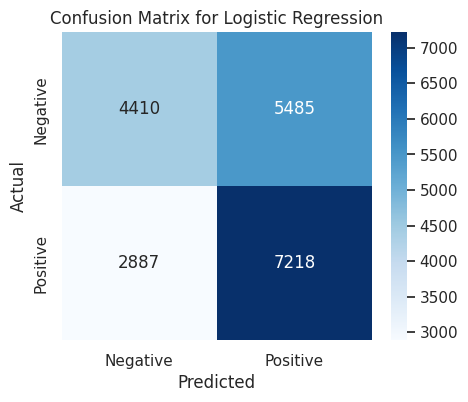

In [171]:
cm = confusion_matrix(y_val, model1_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

## Naive Bayes

In [172]:
model7 = GaussianNB()
model7.fit(X_train_df, y_train)

GaussianNB()

Best threshold found: 0.98425


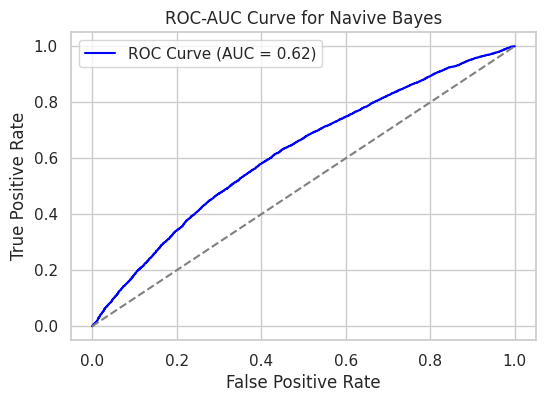

In [173]:
model7_probs = model7.predict_proba(X_val_df)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, model7_probs)
roc_auc7 = auc(fpr, tpr)
auc_dict['Naive Bayes'] = roc_auc7

j_scores = tpr - fpr  # Youden's J statistic
best_threshold = thresholds[np.argmax(j_scores)]

print(f"Best threshold found: {best_threshold:.5f}")

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc7:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for Navive Bayes')
plt.legend()
plt.show()

In [174]:
model7_pred = (model7_probs >= best_threshold).astype(int)

In [175]:
score7 = accuracy_score(y_val,model7_pred)
accuracy_dict['Naive Bayes'] = score7
score7

0.5915

In [176]:
report7 = classification_report(y_val,model7_pred)
print(report7)

              precision    recall  f1-score   support

           0       0.59      0.57      0.58      9895
           1       0.59      0.61      0.60     10105

    accuracy                           0.59     20000
   macro avg       0.59      0.59      0.59     20000
weighted avg       0.59      0.59      0.59     20000



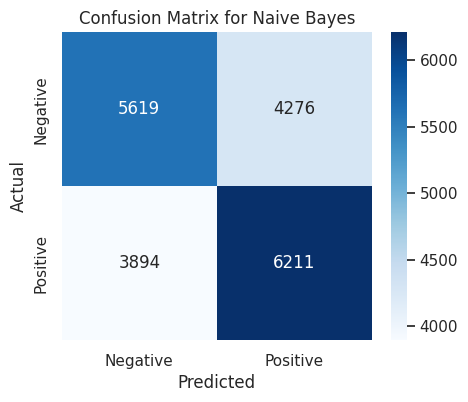

In [177]:
cm = confusion_matrix(y_val, model7_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Naive Bayes")
plt.show()

## K-Nearest Neighbors

In [178]:
model3 = KNeighborsClassifier()
model3.fit(X_train_df,y_train)

KNeighborsClassifier()

Best threshold found: 0.60000


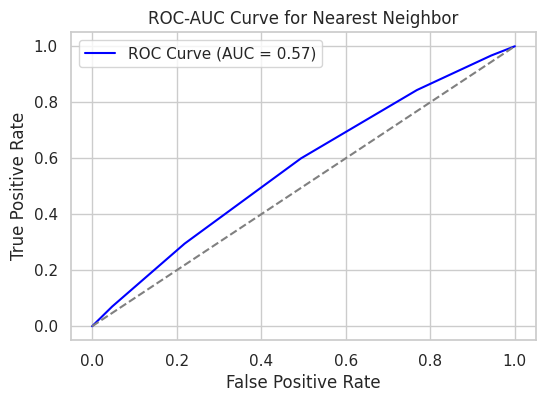

In [179]:
model3_probs = model3.predict_proba(X_val_df)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, model3_probs)
roc_auc3 = auc(fpr, tpr)
auc_dict['Nearest Neighbor'] = roc_auc3

j_scores = tpr - fpr  # Youden's J statistic
best_threshold = thresholds[np.argmax(j_scores)]

print(f"Best threshold found: {best_threshold:.5f}")

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc3:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for Nearest Neighbor')
plt.legend()
plt.show()

In [180]:
model3_pred = (model3_probs >= best_threshold).astype(int)

In [181]:
score3 = accuracy_score(y_val,model3_pred)
accuracy_dict['Nearest Neighbor'] = score3
score3

0.55325

In [182]:
report3 = classification_report(y_val,model3_pred)
print(report3)

              precision    recall  f1-score   support

           0       0.55      0.51      0.53      9895
           1       0.55      0.60      0.58     10105

    accuracy                           0.55     20000
   macro avg       0.55      0.55      0.55     20000
weighted avg       0.55      0.55      0.55     20000



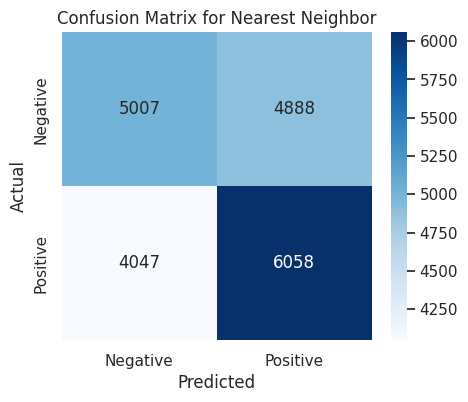

In [183]:
cm = confusion_matrix(y_val, model3_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Nearest Neighbor")
plt.show()

## Stochastic Gradient Descent

In [184]:
model9 = SGDClassifier(loss="log_loss", random_state=42, max_iter=1000, tol=1e-3)
model9.fit(X_train_df, y_train)

SGDClassifier(loss='log_loss', random_state=42)

Best threshold found: -30.28917


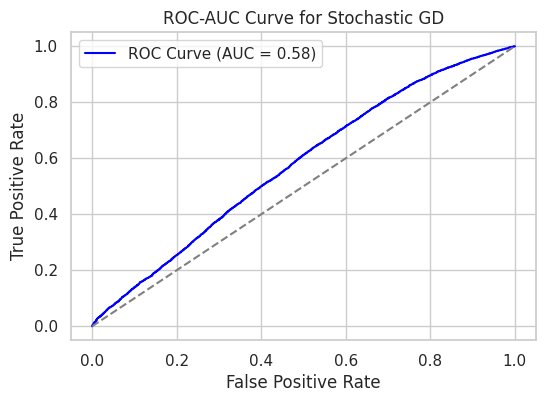

In [185]:
model9_scores = model9.decision_function(X_val_df)

fpr, tpr, thresholds = roc_curve(y_val, model9_scores)
roc_auc9 = auc(fpr, tpr)
auc_dict['Stochastic GD'] = roc_auc9

j_scores = tpr - fpr  # Youden's J statistic
best_threshold = thresholds[np.argmax(j_scores)]

print(f"Best threshold found: {best_threshold:.5f}")

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc9:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for Stochastic GD')
plt.legend()
plt.show()

In [186]:
model9_pred = (model9_scores >= best_threshold).astype(int)

In [187]:
score9 = accuracy_score(y_val,model9_pred)
accuracy_dict['Stochastic GD'] = score9
score9

0.5604

In [188]:
report9 = classification_report(y_val,model9_pred)
print(report9)

              precision    recall  f1-score   support

           0       0.60      0.34      0.43      9895
           1       0.55      0.78      0.64     10105

    accuracy                           0.56     20000
   macro avg       0.57      0.56      0.54     20000
weighted avg       0.57      0.56      0.54     20000



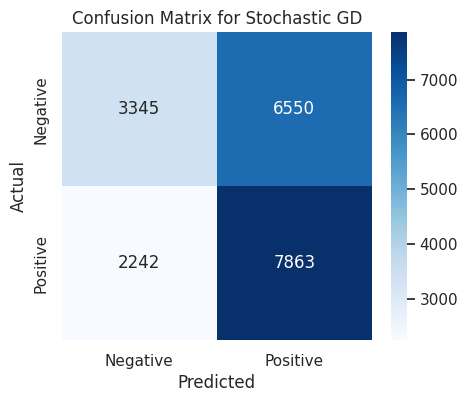

In [189]:
cm = confusion_matrix(y_val, model9_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Stochastic GD")
plt.show()

## Decision Tree

In [190]:
model2 = DecisionTreeClassifier(random_state = 42)
model2.fit(X_train_df,y_train)

DecisionTreeClassifier(random_state=42)

Best threshold found: 1.00000


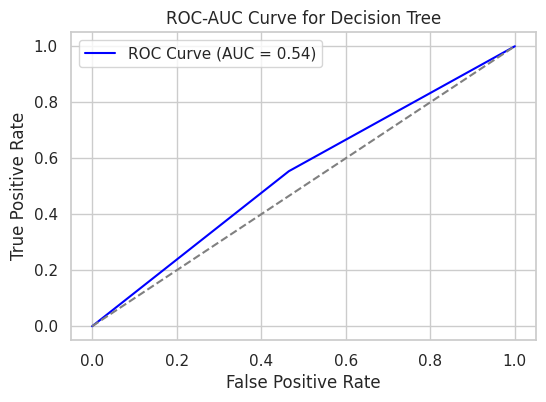

In [191]:
model2_probs = model2.predict_proba(X_val_df)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, model2_probs)
roc_auc2 = auc(fpr, tpr)
auc_dict['Decision Tree'] = roc_auc2

j_scores = tpr - fpr  # Youden's J statistic
best_threshold = thresholds[np.argmax(j_scores)]

print(f"Best threshold found: {best_threshold:.5f}")

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc2:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for Decision Tree')
plt.legend()
plt.show()

In [192]:
model2_pred = (model2_probs >= best_threshold).astype(int)

In [193]:
score2 = accuracy_score(y_val,model2_pred)
accuracy_dict['Decision Tree'] = score2
score2

0.5443

In [194]:
report2 = classification_report(y_val,model2_pred)
print(report2)

              precision    recall  f1-score   support

           0       0.54      0.53      0.54      9895
           1       0.55      0.55      0.55     10105

    accuracy                           0.54     20000
   macro avg       0.54      0.54      0.54     20000
weighted avg       0.54      0.54      0.54     20000



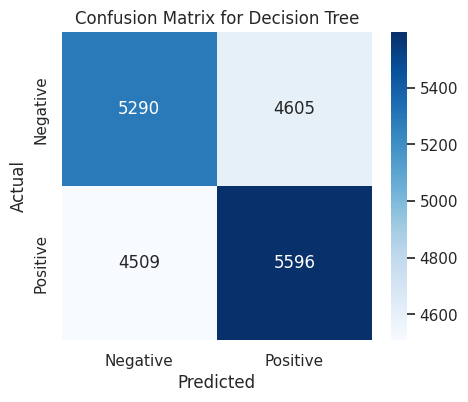

In [195]:
cm = confusion_matrix(y_val, model2_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Decision Tree")
plt.show()

## Random Forest

In [196]:
model4 = RandomForestClassifier(random_state = 42)
model4.fit(X_train_df,y_train)

RandomForestClassifier(random_state=42)

Best threshold found: 0.51000


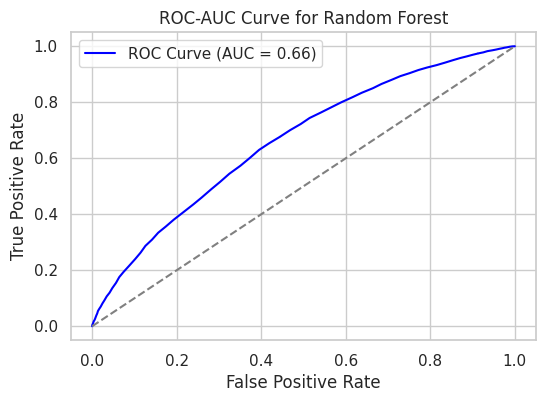

In [197]:
model4_probs = model4.predict_proba(X_val_df)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, model4_probs)
roc_auc4 = auc(fpr, tpr)
auc_dict['Random Forest'] = roc_auc4

j_scores = tpr - fpr  # Youden's J statistic
best_threshold = thresholds[np.argmax(j_scores)]

print(f"Best threshold found: {best_threshold:.5f}")

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc4:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for Random Forest')
plt.legend()
plt.show()

In [198]:
model4_pred = (model4_probs >= best_threshold).astype(int)

In [199]:
score4 = accuracy_score(y_val,model4_pred)
accuracy_dict['Random Forest'] = score4
score4

0.6176

In [200]:
report4 = classification_report(y_val,model4_pred)
print(report4)

              precision    recall  f1-score   support

           0       0.62      0.61      0.61      9895
           1       0.62      0.63      0.62     10105

    accuracy                           0.62     20000
   macro avg       0.62      0.62      0.62     20000
weighted avg       0.62      0.62      0.62     20000



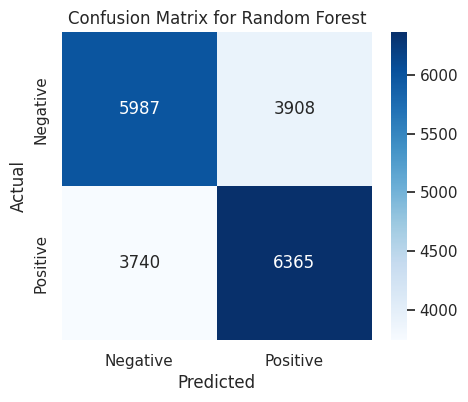

In [201]:
cm = confusion_matrix(y_val, model4_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest")
plt.show()

## XGBoost Classifier

In [202]:
model5 = XGBClassifier(random_state = 42)
model5.fit(X_train_df,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Best threshold found: 0.48909


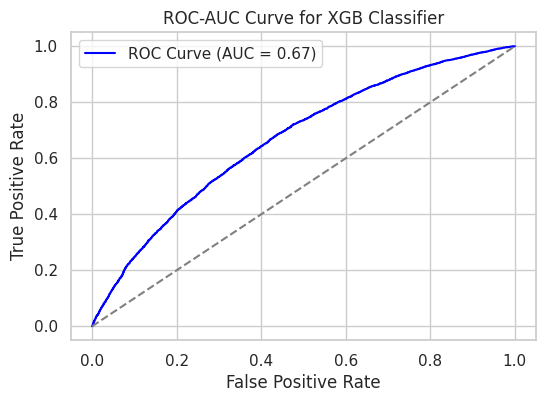

In [203]:
model5_probs = model5.predict_proba(X_val_df)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, model5_probs)
roc_auc5 = auc(fpr, tpr)
auc_dict['XGB Classifier'] = roc_auc5

j_scores = tpr - fpr  # Youden's J statistic
best_threshold = thresholds[np.argmax(j_scores)]

print(f"Best threshold found: {best_threshold:.5f}")

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc5:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for XGB Classifier')
plt.legend()
plt.show()

In [204]:
model5_pred = (model5_probs >= best_threshold).astype(int)

In [205]:
score5 = accuracy_score(y_val,model5_pred)
accuracy_dict['XGB Classifier'] = score5
score5

0.62405

In [206]:
report5 = classification_report(y_val,model5_pred)
print(report5)

              precision    recall  f1-score   support

           0       0.64      0.56      0.60      9895
           1       0.61      0.68      0.65     10105

    accuracy                           0.62     20000
   macro avg       0.63      0.62      0.62     20000
weighted avg       0.63      0.62      0.62     20000



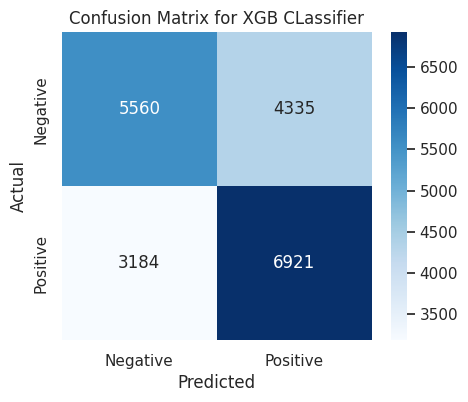

In [207]:
cm = confusion_matrix(y_val, model5_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for XGB CLassifier")
plt.show()

## LightGBM Classifier

In [208]:
model6 = LGBMClassifier(random_state = 42)
model6.fit(X_train_df,y_train)

[LightGBM] [Info] Number of positive: 40420, number of negative: 39580
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024418 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2622
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505250 -> initscore=0.021001
[LightGBM] [Info] Start training from score 0.021001


LGBMClassifier(random_state=42)

Best threshold found: 0.50887


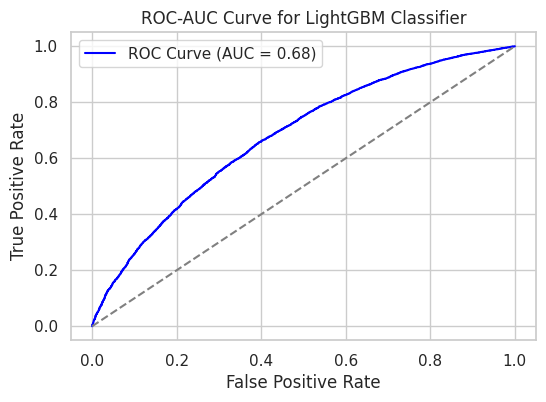

In [209]:
model6_probs = model6.predict_proba(X_val_df)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, model6_probs)
roc_auc6 = auc(fpr, tpr)
auc_dict['LightGBM Classifier'] = roc_auc6

j_scores = tpr - fpr  # Youden's J statistic
best_threshold = thresholds[np.argmax(j_scores)]

print(f"Best threshold found: {best_threshold:.5f}")

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc6:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for LightGBM Classifier')
plt.legend()
plt.show()

In [210]:
model6_pred = (model6_probs >= best_threshold).astype(int)

In [211]:
score6 = accuracy_score(y_val,model6_pred)
accuracy_dict['LightGBM Classifier'] = score6
score6

0.63135

In [212]:
report6 = classification_report(y_val,model6_pred)
print(report6)

              precision    recall  f1-score   support

           0       0.63      0.61      0.62      9895
           1       0.63      0.66      0.64     10105

    accuracy                           0.63     20000
   macro avg       0.63      0.63      0.63     20000
weighted avg       0.63      0.63      0.63     20000



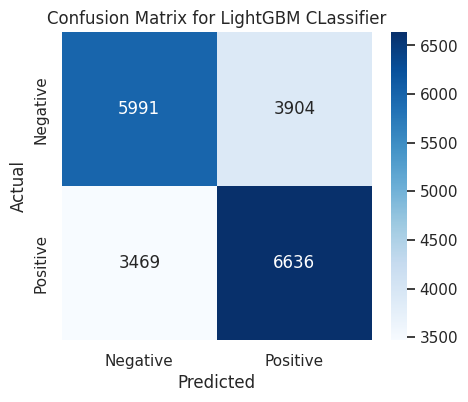

In [213]:
cm = confusion_matrix(y_val, model6_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for LightGBM CLassifier")
plt.show()

## Stacking Classifier (Logistic + LightGBM)

In [214]:
base_learners = [
    ('logreg', LogisticRegression(random_state=42)),
    ('lgbm', LGBMClassifier(random_state=42))
]

model8 = StackingClassifier(
    estimators=base_learners,
    final_estimator=LogisticRegression(random_state=42)
)

model8.fit(X_train_df, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Number of positive: 40420, number of negative: 39580
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020505 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2622
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505250 -> initscore=0.021001
[LightGBM] [Info] Start training from score 0.021001


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[LightGBM] [Info] Number of positive: 32336, number of negative: 31664
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016096 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2562
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 68
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505250 -> initscore=0.021001
[LightGBM] [Info] Start training from score 0.021001
[LightGBM] [Info] Number of positive: 32336, number of negative: 31664
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016662 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2560
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 68
[LightGBM] [Info] [b

StackingClassifier(estimators=[('logreg', LogisticRegression(random_state=42)),
                               ('lgbm', LGBMClassifier(random_state=42))],
                   final_estimator=LogisticRegression(random_state=42))

Best threshold found: 0.50497


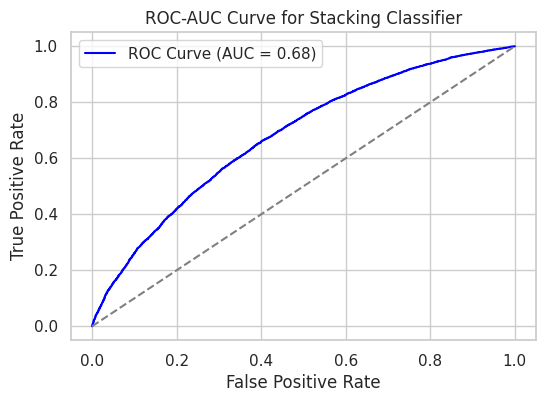

In [215]:
model8_probs = model8.predict_proba(X_val_df)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, model8_probs)
roc_auc8 = auc(fpr, tpr)
auc_dict['Stacking Classifier'] = roc_auc8

j_scores = tpr - fpr  # Youden's J statistic
best_threshold = thresholds[np.argmax(j_scores)]

print(f"Best threshold found: {best_threshold:.5f}")

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc8:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for Stacking Classifier')
plt.legend()
plt.show()

In [216]:
model8_pred = (model8_probs >= best_threshold).astype(int)

In [217]:
score8 = accuracy_score(y_val,model8_pred)
accuracy_dict['Stacking Classifier'] = score8
score8

0.63055

In [218]:
report8 = classification_report(y_val,model8_pred)
print(report8)

              precision    recall  f1-score   support

           0       0.63      0.60      0.62      9895
           1       0.63      0.66      0.64     10105

    accuracy                           0.63     20000
   macro avg       0.63      0.63      0.63     20000
weighted avg       0.63      0.63      0.63     20000



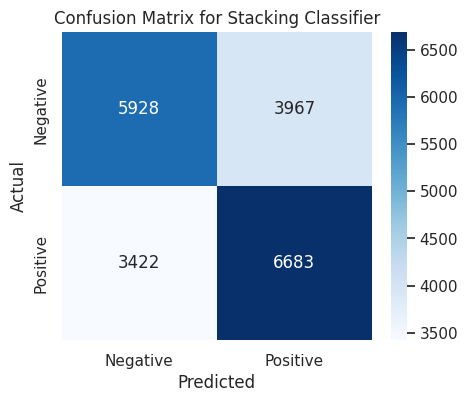

In [219]:
cm = confusion_matrix(y_val, model8_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Stacking Classifier")
plt.show()

## Model Comparison

In [220]:
precision_dict = {}
recall_dict = {}
f1_dict = {}

classifiers = ["Logistic Regression", "Decision Tree", "Nearest Neighbor", 
               "Random Forest", "XGB Classifier", "LightGBM Classifier", 
               "Naive Bayes", "Stacking Classifier", "Stochastic GD"]

for i, clf in enumerate(classifiers, start=1):
    report = classification_report(y_val, globals()[f"model{i}_pred"], output_dict=True)
    
    precision_dict[clf] = report['weighted avg']['precision']
    recall_dict[clf] = report['weighted avg']['recall']
    f1_dict[clf] = report['weighted avg']['f1-score']

In [221]:
def plot_metric(metric_dict, metric_name, color):
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(x=list(metric_dict.values()), y=list(metric_dict.keys()), palette=color)
    
    for i, v in enumerate(metric_dict.values()):
        plt.text(v + 0.005, i, f"{v:.5f}", va='center', fontsize=11)

    plt.xlabel(metric_name, fontsize=12)
    plt.ylabel("Model", fontsize=12)
    plt.title(f"Model Comparison - {metric_name}", fontsize=14)
    plt.xlim(0.5, max(metric_dict.values()) + 0.05)
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


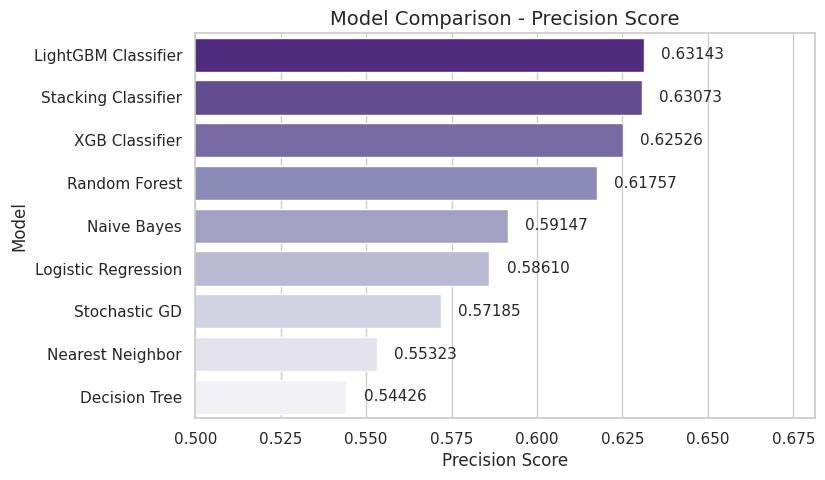

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


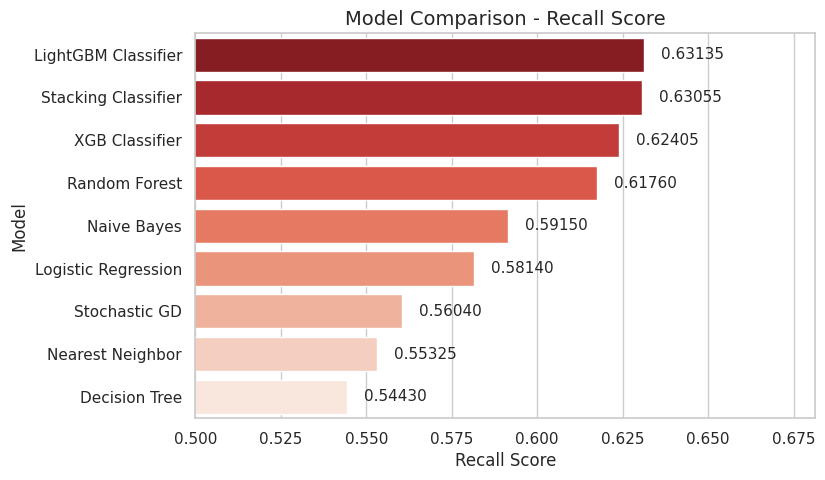

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


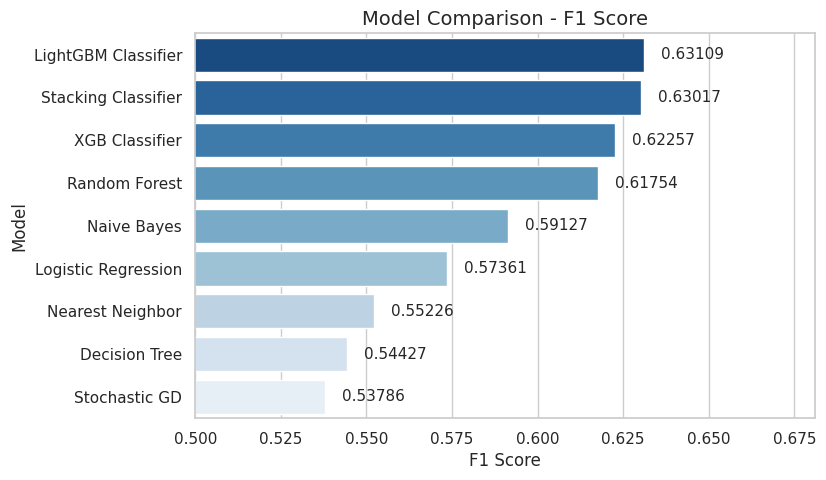

In [222]:
sns.set_style("whitegrid")

precision_sorted = dict(sorted(precision_dict.items(), key=lambda x: x[1], reverse=True))
recall_sorted = dict(sorted(recall_dict.items(), key=lambda x: x[1], reverse=True))
f1_sorted = dict(sorted(f1_dict.items(), key=lambda x: x[1], reverse=True))

plot_metric(precision_sorted, "Precision Score", "Purples_r")
plot_metric(recall_sorted, "Recall Score", "Reds_r")
plot_metric(f1_sorted, "F1 Score", "Blues_r")

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


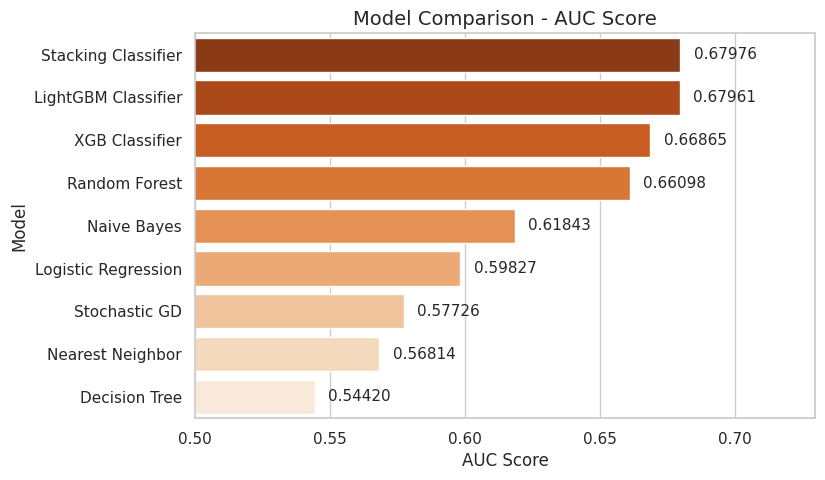

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


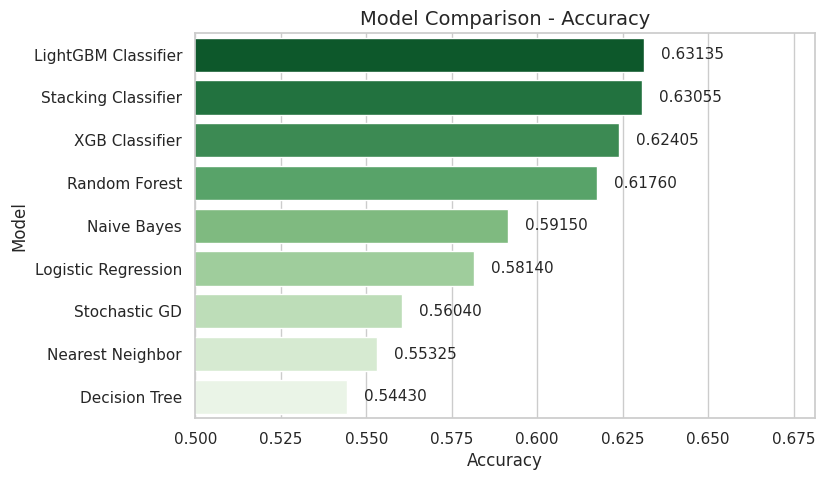

In [223]:
sns.set_style("whitegrid")

auc_sorted = dict(sorted(auc_dict.items(), key=lambda x: x[1], reverse=True))
accuracy_sorted = dict(sorted(accuracy_dict.items(), key=lambda x: x[1], reverse=True))

plot_metric(auc_sorted, "AUC Score", "Oranges_r")
plot_metric(accuracy_sorted, "Accuracy", "Greens_r")

# Hyper-parameter Tuning

In [224]:
param_dist = {
    'num_leaves': [20, 31, 40, 50, 60],
    'max_depth': [-1, 5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200, 500],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

In [225]:
random_search = RandomizedSearchCV(model6, param_distributions=param_dist,
                                   n_iter=20, cv=3, scoring='accuracy',
                                   random_state=42, n_jobs=-1, verbose=1)

In [226]:
random_search.fit(X_train_df, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[LightGBM] [Info] Number of positive: 40420, number of negative: 39580
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022601 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2622
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505250 -> initscore=0.021001
[LightGBM] [Info] Start training from score 0.021001


RandomizedSearchCV(cv=3, estimator=LGBMClassifier(random_state=42), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [-1, 5, 10, 15],
                                        'n_estimators': [50, 100, 200, 500],
                                        'num_leaves': [20, 31, 40, 50, 60],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=1)

In [227]:
best_model = random_search.best_estimator_

Best threshold found: 0.50239


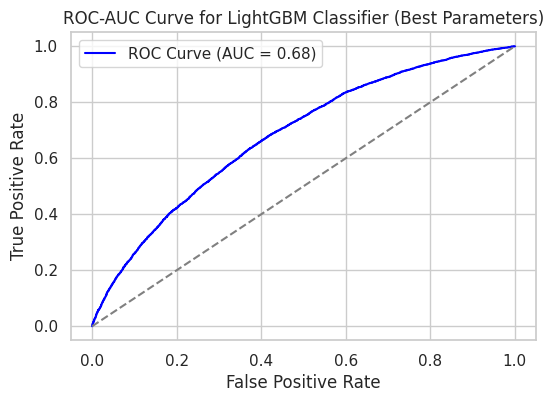

In [228]:
best_model_probs = best_model.predict_proba(X_val_df)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, best_model_probs)
roc_auc = auc(fpr, tpr)

j_scores = tpr - fpr  # Youden's J statistic
best_threshold = thresholds[np.argmax(j_scores)]

print(f"Best threshold found: {best_threshold:.5f}")

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for LightGBM Classifier (Best Parameters)')
plt.legend()
plt.show()

In [229]:
best_model_pred = (best_model_probs >= best_threshold).astype(int) 

score = accuracy_score(y_val, best_model_pred)

print("Best parameters:", random_search.best_params_)
print("Improved Accuracy:", score)

Best parameters: {'subsample': 0.8, 'num_leaves': 20, 'n_estimators': 500, 'max_depth': 15, 'learning_rate': 0.05, 'colsample_bytree': 0.6}
Improved Accuracy: 0.63165


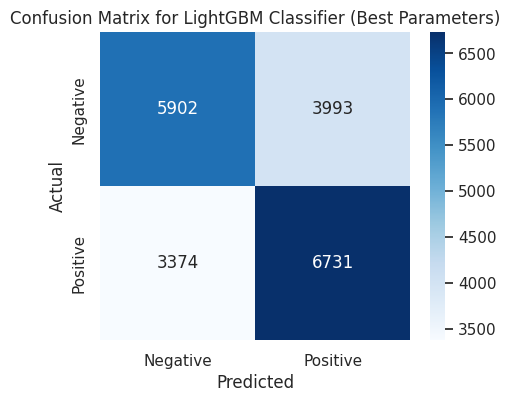

In [230]:
cm = confusion_matrix(y_val, best_model_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for LightGBM Classifier (Best Parameters)")
plt.show()

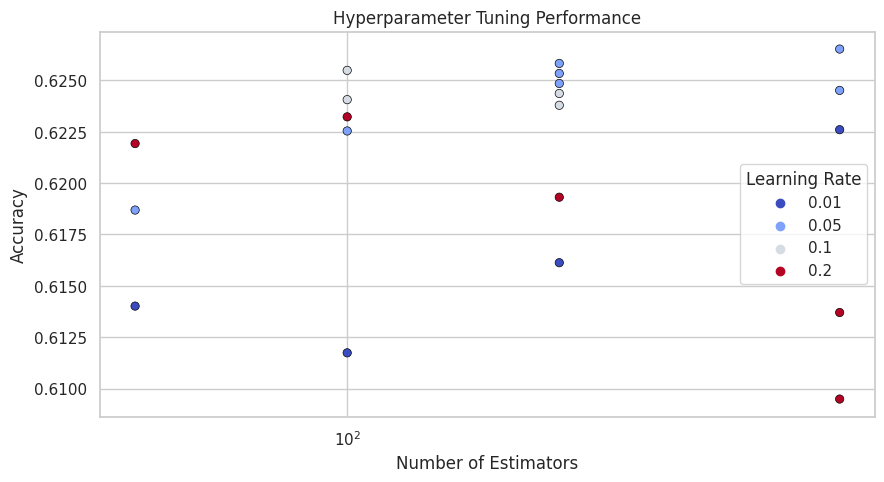

In [231]:
results_df = pd.DataFrame(random_search.cv_results_)

plt.figure(figsize=(10, 5))
sns.scatterplot(x=results_df['param_n_estimators'], y=results_df['mean_test_score'], hue=results_df['param_learning_rate'], palette='coolwarm', edgecolor='black')
plt.xscale("log")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("Hyperparameter Tuning Performance")
plt.legend(title="Learning Rate")
plt.show()

# Final Submission

In [232]:
data = np.concatenate([X_train_df, X_val_df], axis=0)
target = np.concatenate([y_train, y_val], axis=0)

In [233]:
best_model.fit(data,target)

[LightGBM] [Info] Number of positive: 50525, number of negative: 49475
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022306 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2682
[LightGBM] [Info] Number of data points in the train set: 100000, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505250 -> initscore=0.021001
[LightGBM] [Info] Start training from score 0.021001


LGBMClassifier(colsample_bytree=0.6, learning_rate=0.05, max_depth=15,
               n_estimators=500, num_leaves=20, random_state=42, subsample=0.8)

In [234]:
X_test_df = pd.read_csv("/kaggle/input/System-Threat-Forecaster/test.csv")

In [235]:
X_test_df['DateAS'] = pd.to_datetime(X_test_df['DateAS'])
X_test_df['DateAS_month'] = X_test_df['DateAS'].dt.month
X_test_df['DateAS_year'] = X_test_df['DateAS'].dt.year
X_test_df['DateAS_weekday'] = X_test_df['DateAS'].dt.weekday
X_test_df['DateAS_hour'] = X_test_df['DateAS'].dt.hour

X_test_df['DateOS'] = pd.to_datetime(X_test_df['DateOS'])
X_test_df['DateOS_month'] = X_test_df['DateOS'].dt.month
X_test_df['DateOS_year'] = X_test_df['DateOS'].dt.year
X_test_df['DateOS_weekday'] = X_test_df['DateOS'].dt.weekday
X_test_df['DateOS_hour'] = X_test_df['DateOS'].dt.hour

X_test_df[['AppVersion_X', 'AppVersion_Y', 'AppVersion_Z', 'AppVersion_W']] = X_test_df['AppVersion'].str.split('.', expand=True).astype(float)
X_test_df[['SignatureVersion_X', 'SignatureVersion_Y', 'SignatureVersion_Z', 'SignatureVersion_W']] = X_test_df['SignatureVersion'].str.split('.', expand=True).astype(float)
X_test_df[['EngineVersion_X', 'EngineVersion_Y', 'EngineVersion_Z', 'EngineVersion_W']] = X_test_df['EngineVersion'].str.split('.', expand=True).astype(float)

In [236]:
X_test_df.drop(columns=['MachineID', 'SignatureVersion', 'CityID', 'IsBetaUser', 
                 'AutoSampleSubmissionEnabled', 'IsFlightsDisabled', 'OEMModelID',
                 'ProcessorModelID', 'InternalBatteryNumberOfCharges',
                 'NumericOSVersion', 'OSBuildRevisionOnly', 'FirmwareVersionID', 'DateAS', 'DateOS',
                 'SignatureVersion_X', 'SignatureVersion_Z', 'SignatureVersion_W', 'AppVersion',
                 'EngineVersion', 'EngineVersion_X', 'EngineVersion_Y', 'AppVersion_X'], inplace=True)

In [237]:
X_test_df = preprocessor.transform(X_test_df)

X_test_df = feature_selector2.transform(X_test_df)

In [238]:
y_test_scores = best_model.predict_proba(X_test_df)[:, 1]
prediction = (y_test_scores >= best_threshold).astype(int)

In [239]:
X_test_df = pd.DataFrame(X_test_df)  

submission = pd.DataFrame(
    {"id" : X_test_df.index,
    "target" : prediction}
)

In [240]:
submission.to_csv('submission.csv', index = False)